## Connectivity Magnitude Analysis
#### This script is designed to quantify similarities and differences between two aspects of the visual pathways in object perception.

INDEPENDENT NETWORK VISUALIZATION
Loading thresholded group maps...
✓ All 4 thresholded maps loaded successfully

Averaging hemispheres...

Voxel Statistics:
  Dorsal-specific (pIPS only): 30,357 voxels
  Ventral-specific (LO only): 15,771 voxels
  Overlap: 7,226 voxels
  Total dorsal: 37,583 voxels
  Total ventral: 22,997 voxels
  Overlap as % of dorsal: 19.2%
  Overlap as % of ventral: 31.4%

CREATING VISUALIZATIONS

Figure 1: Complete Independent Networks


/tmp/ipykernel_348755/2182007557.py:139: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


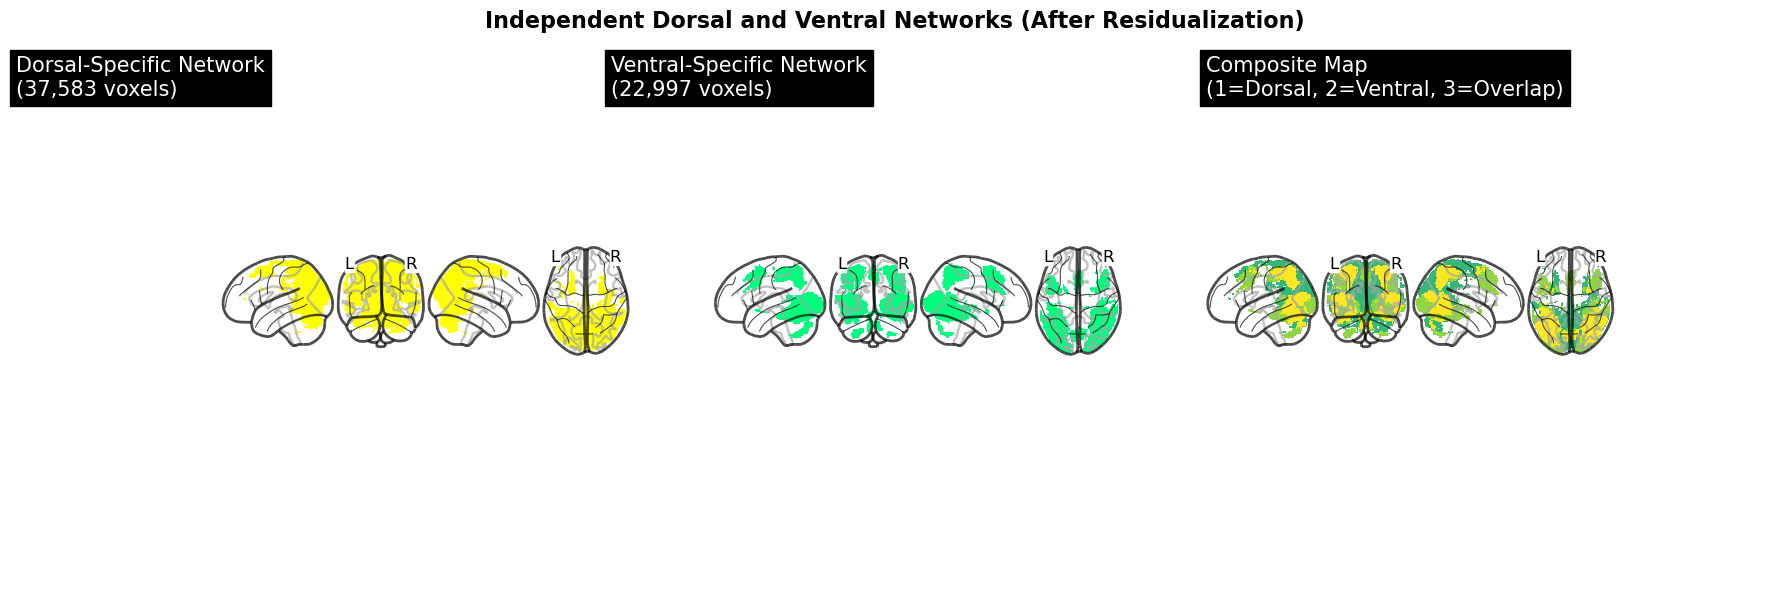


Figure 2: Network Components


/tmp/ipykernel_348755/2182007557.py:169: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


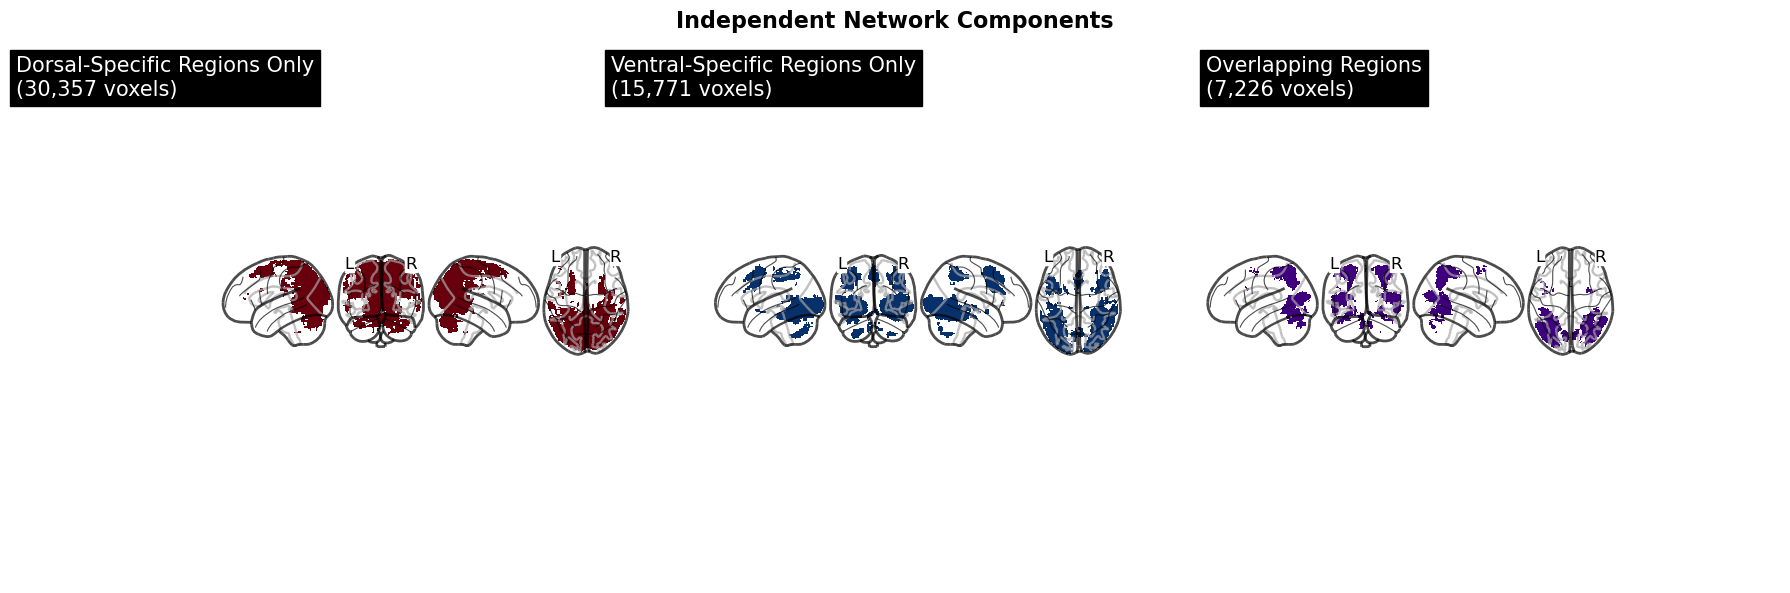


Figure 3: Detailed Multi-View


/tmp/ipykernel_348755/2182007557.py:230: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


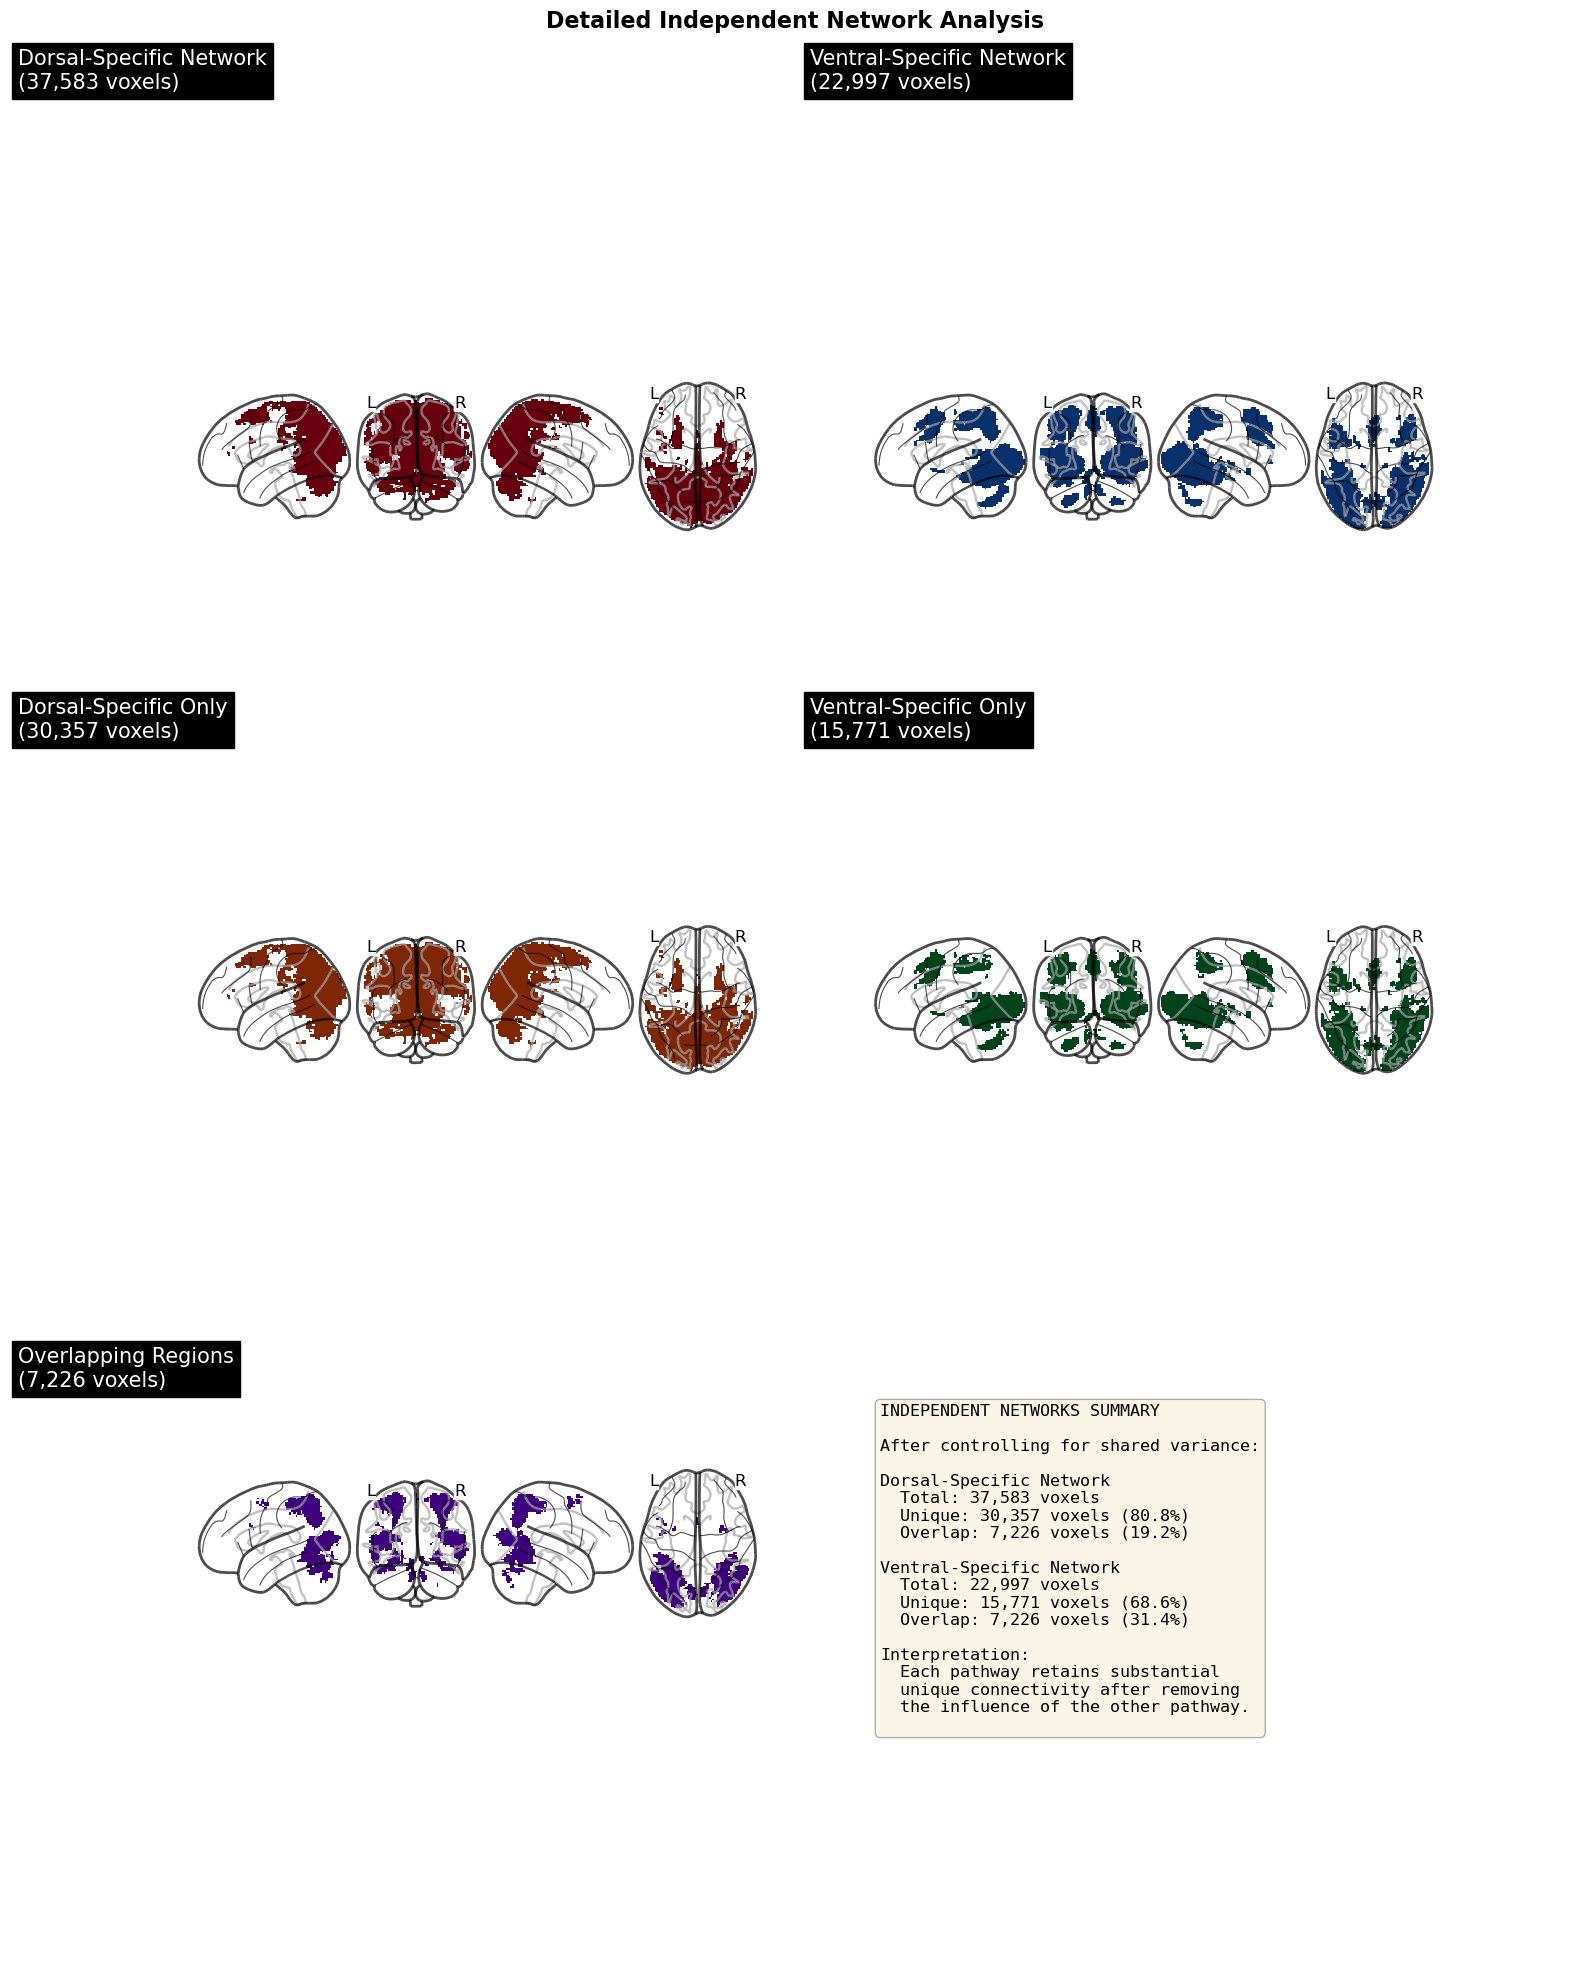


SAVING FILES FOR PYCORTEX VISUALIZATION
✓ Saved: dorsal_specific_only.nii.gz
✓ Saved: ventral_specific_only.nii.gz
✓ Saved: overlap_both_networks.nii.gz
✓ Saved: dorsal_full_network.nii.gz
✓ Saved: ventral_full_network.nii.gz
✓ Saved: composite_map_all_three.nii.gz

All files saved to: /user_data/csimmon2/git_repos/ptoc/results/partial_correlation_pycortex

Visualization complete!

Visualization complete!


In [ ]:
# Cell: Visualization of Independent Dorsal and Ventral Networks
# Shows uniquely dorsal, uniquely ventral, and overlapping regions

import os
import numpy as np
import nibabel as nib
from nilearn import plotting
import matplotlib.pyplot as plt

# Define directories
results_dir = '/user_data/csimmon2/git_repos/ptoc/results'
pips_thresh_dir = f'{results_dir}/partial_correlation_thresh'
lo_thresh_dir = f'{results_dir}/partial_correlation_thresh_LO'

print("INDEPENDENT NETWORK VISUALIZATION")
print("="*70)

# Load thresholded group maps
print("Loading thresholded group maps...")

# pIPS cleaned maps
pips_left_file = f'{pips_thresh_dir}/pIPS_left_cleaned_thresh.nii.gz'
pips_right_file = f'{pips_thresh_dir}/pIPS_right_cleaned_thresh.nii.gz'

# LO cleaned maps
lo_left_file = f'{lo_thresh_dir}/LO_left_cleaned_thresh.nii.gz'
lo_right_file = f'{lo_thresh_dir}/LO_right_cleaned_thresh.nii.gz'

# Check files exist
required_files = [pips_left_file, pips_right_file, lo_left_file, lo_right_file]
missing_files = [f for f in required_files if not os.path.exists(f)]

if missing_files:
    print("\nERROR: Missing required thresholded files:")
    for f in missing_files:
        print(f"  - {f}")
    print("\nPlease run the thresholding scripts first:")
    print("  1. threshold_results.py (for pIPS)")
    print("  2. threshold_results_LO.py (for LO)")
    exit(1)

# Load images
pips_left_img = nib.load(pips_left_file)
pips_right_img = nib.load(pips_right_file)
lo_left_img = nib.load(lo_left_file)
lo_right_img = nib.load(lo_right_file)

print("✓ All 4 thresholded maps loaded successfully")

# Average hemispheres (following your established methodology)
print("\nAveraging hemispheres...")
pips_avg_data = (pips_left_img.get_fdata() + pips_right_img.get_fdata()) / 2
lo_avg_data = (lo_left_img.get_fdata() + lo_right_img.get_fdata()) / 2

# Create binary masks
pips_binary = (pips_avg_data > 0).astype(int)
lo_binary = (lo_avg_data > 0).astype(int)

# Calculate voxel counts
pips_only_voxels = np.sum((pips_binary == 1) & (lo_binary == 0))
lo_only_voxels = np.sum((lo_binary == 1) & (pips_binary == 0))
overlap_voxels = np.sum((pips_binary == 1) & (lo_binary == 1))
total_pips = np.sum(pips_binary)
total_lo = np.sum(lo_binary)

print("\nVoxel Statistics:")
print(f"  Dorsal-specific (pIPS only): {pips_only_voxels:,} voxels")
print(f"  Ventral-specific (LO only): {lo_only_voxels:,} voxels")
print(f"  Overlap: {overlap_voxels:,} voxels")
print(f"  Total dorsal: {total_pips:,} voxels")
print(f"  Total ventral: {total_lo:,} voxels")

# Calculate overlap percentages
if total_pips > 0:
    pips_overlap_pct = (overlap_voxels / total_pips) * 100
    print(f"  Overlap as % of dorsal: {pips_overlap_pct:.1f}%")

if total_lo > 0:
    lo_overlap_pct = (overlap_voxels / total_lo) * 100
    print(f"  Overlap as % of ventral: {lo_overlap_pct:.1f}%")

# Create composite overlap map
# 1 = dorsal-specific, 2 = ventral-specific, 3 = overlap
overlap_map = np.zeros_like(pips_binary)
overlap_map[(pips_binary == 1) & (lo_binary == 0)] = 1  # Dorsal only
overlap_map[(lo_binary == 1) & (pips_binary == 0)] = 2  # Ventral only
overlap_map[(pips_binary == 1) & (lo_binary == 1)] = 3  # Overlap

# Create NIfTI images for visualization using BINARY masks
affine = pips_left_img.affine
pips_avg_img = nib.Nifti1Image(pips_binary.astype(float), affine)
lo_avg_img = nib.Nifti1Image(lo_binary.astype(float), affine)
overlap_map_img = nib.Nifti1Image(overlap_map.astype(float), affine)

# Create individual component images (also binary)
dorsal_only_data = np.zeros_like(pips_binary, dtype=float)
dorsal_only_data[(pips_binary == 1) & (lo_binary == 0)] = 1
dorsal_only_img = nib.Nifti1Image(dorsal_only_data, affine)

ventral_only_data = np.zeros_like(lo_binary, dtype=float)
ventral_only_data[(lo_binary == 1) & (pips_binary == 0)] = 1
ventral_only_img = nib.Nifti1Image(ventral_only_data, affine)

overlap_only_data = np.zeros_like(pips_binary, dtype=float)
overlap_only_data[(pips_binary == 1) & (lo_binary == 1)] = 1
overlap_only_img = nib.Nifti1Image(overlap_only_data, affine)

print("\n" + "="*70)
print("CREATING VISUALIZATIONS")
print("="*70)

# ============================================================================
# Figure 1: Overview - Complete Networks
# ============================================================================
print("\nFigure 1: Complete Independent Networks")

fig = plt.figure(figsize=(18, 6))

# Dorsal network
ax1 = plt.subplot(1, 3, 1)
plotting.plot_glass_brain(pips_avg_img, axes=ax1, 
                         title=f'Dorsal-Specific Network\n({total_pips:,} voxels)',
                         display_mode='lyrz', cmap='autumn')

# Ventral network
ax2 = plt.subplot(1, 3, 2)
plotting.plot_glass_brain(lo_avg_img, axes=ax2,
                         title=f'Ventral-Specific Network\n({total_lo:,} voxels)',
                         display_mode='lyrz', cmap='winter')

# Composite map
ax3 = plt.subplot(1, 3, 3)
plotting.plot_glass_brain(overlap_map_img, axes=ax3,
                         title='Composite Map\n(1=Dorsal, 2=Ventral, 3=Overlap)',
                         display_mode='lyrz', cmap='viridis', vmin=0, vmax=3)

plt.suptitle('Independent Dorsal and Ventral Networks (After Residualization)', 
             fontsize=16, fontweight='bold', y=0.98)
plt.tight_layout()
plt.show()

# ============================================================================
# Figure 2: Network Components (Dorsal-specific, Ventral-specific, Overlap)
# ============================================================================
print("\nFigure 2: Network Components")

fig = plt.figure(figsize=(18, 6))

# Dorsal-specific only
ax1 = plt.subplot(1, 3, 1)
plotting.plot_glass_brain(dorsal_only_img, axes=ax1,
                         title=f'Dorsal-Specific Regions Only\n({pips_only_voxels:,} voxels)',
                         display_mode='lyrz', cmap='Reds')

# Ventral-specific only
ax2 = plt.subplot(1, 3, 2)
plotting.plot_glass_brain(ventral_only_img, axes=ax2,
                         title=f'Ventral-Specific Regions Only\n({lo_only_voxels:,} voxels)',
                         display_mode='lyrz', cmap='Blues')

# Overlap only
ax3 = plt.subplot(1, 3, 3)
plotting.plot_glass_brain(overlap_only_img, axes=ax3,
                         title=f'Overlapping Regions\n({overlap_voxels:,} voxels)',
                         display_mode='lyrz', cmap='Purples')

plt.suptitle('Independent Network Components', 
             fontsize=20, fontweight='bold', y=0.98)
plt.tight_layout()
plt.show()

# ============================================================================
# Figure 3: Detailed Multi-View
# ============================================================================
print("\nFigure 3: Detailed Multi-View")

fig, axes = plt.subplots(3, 2, figsize=(16, 20))

# Row 1: Complete networks
plotting.plot_glass_brain(pips_avg_img, axes=axes[0, 0],
                         title=f'Dorsal-Specific Network\n({total_pips:,} voxels)',
                         display_mode='lyrz', cmap='Reds')

plotting.plot_glass_brain(lo_avg_img, axes=axes[0, 1],
                         title=f'Ventral-Specific Network\n({total_lo:,} voxels)',
                         display_mode='lyrz', cmap='Blues')

# Row 2: Unique components
plotting.plot_glass_brain(dorsal_only_img, axes=axes[1, 0],
                         title=f'Dorsal-Specific Only\n({pips_only_voxels:,} voxels)',
                         display_mode='lyrz', cmap='Oranges')

plotting.plot_glass_brain(ventral_only_img, axes=axes[1, 1],
                         title=f'Ventral-Specific Only\n({lo_only_voxels:,} voxels)',
                         display_mode='lyrz', cmap='Greens')

# Row 3: Overlap and composite
plotting.plot_glass_brain(overlap_only_img, axes=axes[2, 0],
                         title=f'Overlapping Regions\n({overlap_voxels:,} voxels)',
                         display_mode='lyrz', cmap='Purples')

# Summary text
axes[2, 1].axis('off')
summary_text = f"""INDEPENDENT NETWORKS SUMMARY

After controlling for shared variance:

Dorsal-Specific Network
  Total: {total_pips:,} voxels
  Unique: {pips_only_voxels:,} voxels ({(pips_only_voxels/total_pips*100):.1f}%)
  Overlap: {overlap_voxels:,} voxels ({(overlap_voxels/total_pips*100):.1f}%)

Ventral-Specific Network
  Total: {total_lo:,} voxels
  Unique: {lo_only_voxels:,} voxels ({(lo_only_voxels/total_lo*100):.1f}%)
  Overlap: {overlap_voxels:,} voxels ({(overlap_voxels/total_lo*100):.1f}%)

Interpretation:
  Each pathway retains substantial
  unique connectivity after removing
  the influence of the other pathway.
"""

axes[2, 1].text(0.1, 0.9, summary_text, transform=axes[2, 1].transAxes,
               fontsize=12, verticalalignment='top', fontfamily='monospace',
               bbox=dict(boxstyle='round', facecolor='wheat', alpha=0.3))

plt.suptitle('Detailed Independent Network Analysis', 
             fontsize=20, fontweight='bold', y=0.99)
plt.tight_layout()
plt.show()

# ============================================================================
# SAVE FILES FOR PYCORTEX VISUALIZATION
# ============================================================================
print("\n" + "="*70)
print("SAVING FILES FOR PYCORTEX VISUALIZATION")
print("="*70)

output_viz_dir = f'{results_dir}/partial_correlation_pycortex'
os.makedirs(output_viz_dir, exist_ok=True)

# Save the three key component images
dorsal_only_img.to_filename(f'{output_viz_dir}/dorsal_specific_only.nii.gz')
print(f"✓ Saved: dorsal_specific_only.nii.gz")

ventral_only_img.to_filename(f'{output_viz_dir}/ventral_specific_only.nii.gz')
print(f"✓ Saved: ventral_specific_only.nii.gz")

overlap_only_img.to_filename(f'{output_viz_dir}/overlap_both_networks.nii.gz')
print(f"✓ Saved: overlap_both_networks.nii.gz")

# Also save the full networks
pips_avg_img.to_filename(f'{output_viz_dir}/dorsal_full_network.nii.gz')
print(f"✓ Saved: dorsal_full_network.nii.gz")

lo_avg_img.to_filename(f'{output_viz_dir}/ventral_full_network.nii.gz')
print(f"✓ Saved: ventral_full_network.nii.gz")

# Save the composite map
overlap_map_img.to_filename(f'{output_viz_dir}/composite_map_all_three.nii.gz')
print(f"✓ Saved: composite_map_all_three.nii.gz")

print(f"\nAll files saved to: {output_viz_dir}")

print("\nVisualization complete!")

print("\nVisualization complete!")

In [1]:
# Cell: Partial Correlation Connectivity Magnitude Analysis
# Adapted from standard FC connectivity analysis for partial correlation (residualized) data

import os
import numpy as np
import pandas as pd
import nibabel as nib
from nilearn.maskers import NiftiLabelsMasker
from sklearn.utils import resample

# Define study paths
study_dir = "/lab_data/behrmannlab/vlad/ptoc"
residual_dir = "/user_data/csimmon2/ptoc_residuals"  # Partial correlation maps location
sub_info_path = '/user_data/csimmon2/git_repos/ptoc/sub_info.csv'
results_dir = '/user_data/csimmon2/git_repos/ptoc/results'
output_dir = f'{results_dir}/partial_correlation_magnitude'
os.makedirs(output_dir, exist_ok=True)

print(f"\n{'='*80}")
print(f"PARTIAL CORRELATION CONNECTIVITY MAGNITUDE ANALYSIS")
print(f"{'='*80}")

# Load merged atlas
merged_atlas_file = f'{results_dir}/schaefer_wang_merged.nii.gz'
merged_labels_file = f'{results_dir}/merged_atlas_labels.npy'

if not os.path.exists(merged_atlas_file) or not os.path.exists(merged_labels_file):
    print("Error: Merged atlas files not found. Please run merge_atlas.py first.")
else:
    atlas_img = nib.load(merged_atlas_file)
    atlas_labels = np.load(merged_labels_file, allow_pickle=True)
    
    print(f"Loaded merged atlas with {len(atlas_labels)} parcels")
    
    # Load subject info
    sub_info = pd.read_csv(sub_info_path)
    subjects = sub_info[sub_info['group'] == 'control']['sub'].tolist()
    
    # Exclude sub-084 as specified
    if 'sub-084' in subjects:
        subjects.remove('sub-084')
        print("Excluded sub-084 from analysis")
        
    print(f"Found {len(subjects)} control subjects")
    
    # Define ROIs and hemispheres
    rois = ['pIPS_clean', 'LO_clean']
    hemispheres = ['left', 'right']
    
    # Setup atlas masker
    masker = NiftiLabelsMasker(labels_img=atlas_img, standardize=False)
    
    # Load and process subject data
    subject_data = []
    for sub in subjects:
        sub_conn = {}
        
        for roi in rois:
            # Initialize arrays to hold combined data
            combined_data = None
            hemi_count = 0
            
            for hemisphere in hemispheres:
                # Load partial correlation maps
                fc_file = f'{residual_dir}/{sub}/ses-01/derivatives/fc_mni/{sub}_{roi}_{hemisphere}_loc_fc_mni.nii.gz'
                
                if os.path.exists(fc_file):
                    try:
                        # Load the FC map
                        fc_img = nib.load(fc_file)
                        
                        # Extract ROI values using atlas
                        fc_values = masker.fit_transform(fc_img)[0]
                        
                        # Add to combined data
                        if combined_data is None:
                            combined_data = fc_values
                        else:
                            combined_data += fc_values
                        
                        hemi_count += 1
                    except Exception as e:
                        print(f"Error processing {fc_file}: {e}")
            
            # Average the data if we have at least one hemisphere
            if hemi_count > 0:
                sub_conn[roi] = combined_data / hemi_count
        
        # Only include subjects with both ROIs
        if len(sub_conn) == len(rois):
            subject_data.append(sub_conn)
    
    n_valid_subjects = len(subject_data)
    print(f"Successfully loaded data for {n_valid_subjects} subjects")
    
    if n_valid_subjects < 3:
        print("Not enough valid subjects. Analysis cannot proceed.")
    else:
        # Initialize arrays for analysis
        n_rois = len(atlas_labels)
        pips_clean_fc = np.zeros((n_valid_subjects, n_rois))
        lo_clean_fc = np.zeros((n_valid_subjects, n_rois))
        
        # Fill arrays with connectivity data
        for i, subj_data in enumerate(subject_data):
            pips_clean_fc[i, :] = subj_data['pIPS_clean']
            lo_clean_fc[i, :] = subj_data['LO_clean']
        
        # Calculate connectivity vector correlation for each subject
        vector_correlations = np.zeros(n_valid_subjects)
        for i in range(n_valid_subjects):
            vector_correlations[i] = np.corrcoef(pips_clean_fc[i, :], lo_clean_fc[i, :])[0, 1]
        
        print(f"Mean connectivity vector correlation: {np.mean(vector_correlations):.3f} ± {np.std(vector_correlations):.3f}")
        
        # Calculate mean connectivity profiles
        mean_pips_clean = np.mean(pips_clean_fc, axis=0)
        mean_lo_clean = np.mean(lo_clean_fc, axis=0)
        
        # Remove self-connectivity
        wang_pips_idx = next((i for i, label in enumerate(atlas_labels) if 'Wang_pIPS' in str(label)), None)
        wang_lo_idx = next((i for i, label in enumerate(atlas_labels) if 'Wang_LO' in str(label)), None)
        
        if wang_pips_idx is not None:
            print(f"Excluding Wang_pIPS (index {wang_pips_idx}) from connectivity analysis")
        if wang_lo_idx is not None:
            print(f"Excluding Wang_LO (index {wang_lo_idx}) from connectivity analysis")
        
        # Create mask for non-self connections
        mask = np.ones(len(atlas_labels), dtype=bool)
        if wang_pips_idx is not None:
            mask[wang_pips_idx] = False
        if wang_lo_idx is not None:
            mask[wang_lo_idx] = False
        
        # Apply mask to connectivity data
        pips_clean_fc_masked = pips_clean_fc[:, mask]
        lo_clean_fc_masked = lo_clean_fc[:, mask]
        
        # Get the masked atlas labels
        atlas_labels_masked = [label for i, label in enumerate(atlas_labels) if mask[i]]
        
        # Update mean connectivity with masked data
        mean_pips_clean_masked = np.mean(pips_clean_fc_masked, axis=0)
        mean_lo_clean_masked = np.mean(lo_clean_fc_masked, axis=0)
        
        # Get the new number of ROIs after masking
        n_masked_rois = np.sum(mask)
        print(f"Analyzing {n_masked_rois} ROIs after excluding Wang ROIs")
        
        # Calculate difference profile with masked data
        diff_profile = mean_pips_clean_masked - mean_lo_clean_masked
        abs_diff_profile = np.abs(diff_profile)
        
        # Run bootstrap analysis with masked data
        print("Performing bootstrap analysis...")
        n_boots = 10000
        boot_diffs = np.zeros((n_boots, n_masked_rois))
        
        for i in range(n_boots):
            # Resample subjects with replacement
            boot_idx = resample(range(n_valid_subjects), replace=True, n_samples=n_valid_subjects)
            
            # Calculate mean difference for this bootstrap sample
            boot_pips = np.mean(pips_clean_fc_masked[boot_idx, :], axis=0)
            boot_lo = np.mean(lo_clean_fc_masked[boot_idx, :], axis=0)
            boot_diffs[i, :] = boot_pips - boot_lo
        
        # Calculate confidence intervals
        ci_lower = np.percentile(boot_diffs, 2.5, axis=0)
        ci_upper = np.percentile(boot_diffs, 97.5, axis=0)
        
        # Identify significant differences (95% CI doesn't cross zero)
        sig_boot = (ci_lower > 0) | (ci_upper < 0)
        sig_boot_count = np.sum(sig_boot)
        print(f"Found {sig_boot_count} ROIs with significant differences via bootstrap")
        
        # Leave-One-Out Cross-Validation for reliability
        print("Performing Leave-One-Out Cross-Validation...")
        loo_reliability = np.zeros(n_masked_rois)
        
        for left_out in range(n_valid_subjects):
            # Create the training set (all subjects except the left out one)
            train_idx = list(range(n_valid_subjects))
            train_idx.remove(left_out)
            
            # Calculate mean training differences
            train_diff = np.mean(pips_clean_fc_masked[train_idx, :] - lo_clean_fc_masked[train_idx, :], axis=0)
            
            # Test on left out subject
            test_diff = pips_clean_fc_masked[left_out, :] - lo_clean_fc_masked[left_out, :]
            
            # Calculate consistency of signs between training and test
            loo_reliability += (np.sign(train_diff) == np.sign(test_diff)).astype(float)
        
        # Convert to proportion of consistent predictions
        loo_reliability = loo_reliability / n_valid_subjects
        
        # Set threshold at 75% consistency
        loo_threshold = 0.75
        sig_loo = loo_reliability >= loo_threshold
        sig_loo_count = np.sum(sig_loo)
        
        print(f"LOO reliability threshold: {loo_threshold:.3f}")
        print(f"Found {sig_loo_count} ROIs with high reliability via LOO")
        
        # Combine significance
        sig_combined = sig_boot & sig_loo
        sig_combined_count = np.sum(sig_combined)
        print(f"Found {sig_combined_count} ROIs significant with combined criteria")
        
        # Helper function to get ROI name
        def get_roi_name(roi_id):
            try:
                idx = int(roi_id) - 1
                if 0 <= idx < len(atlas_labels):
                    label = atlas_labels[idx]
                    if isinstance(label, bytes):
                        label = label.decode('utf-8')
                    return label
            except:
                pass
            return f"ROI_{roi_id}"
        
        # Create a map from masked indices to original atlas indices
        original_indices = np.where(mask)[0]
        
        # Create results DataFrame
        results_df = pd.DataFrame({
            'ROI_ID': original_indices + 1,  # Convert to 1-based indexing
            'ROI_Name': [get_roi_name(i+1) for i in original_indices],
            'pIPS_clean_Connectivity': mean_pips_clean_masked,
            'LO_clean_Connectivity': mean_lo_clean_masked,
            'Difference': diff_profile,
            'Abs_Difference': abs_diff_profile,
            'CI_Lower': ci_lower,
            'CI_Upper': ci_upper,
            'LOO_Reliability': loo_reliability,
            'Bootstrap_Significant': sig_boot,
            'LOO_Significant': sig_loo,
            'Combined_Significant': sig_combined,
            'Direction': np.where(diff_profile > 0, 'pIPS_clean > LO_clean', 'LO_clean > pIPS_clean')
        })
        
        # Save results to CSV
        csv_path = f'{output_dir}/bilateral_partial_correlation_connectivity_fingerprint_results.csv'
        results_df.to_csv(csv_path, index=False)
        print(f"Results saved to {csv_path}")
        
        # Create roi_data dictionary for visualization
        roi_data = {
            'mean_pips': mean_pips_clean_masked,
            'mean_lo': mean_lo_clean_masked,
            'diff_profile': diff_profile,
            'ci_lower': ci_lower,
            'ci_upper': ci_upper,
            'sig_combined': sig_combined
        }
        
        print("\nAnalysis complete!")


PARTIAL CORRELATION CONNECTIVITY MAGNITUDE ANALYSIS
Loaded merged atlas with 202 parcels
Excluded sub-084 from analysis
Found 18 control subjects
Successfully loaded data for 18 subjects
Mean connectivity vector correlation: -0.223 ± 0.221
Excluding Wang_pIPS (index 200) from connectivity analysis
Excluding Wang_LO (index 201) from connectivity analysis
Analyzing 200 ROIs after excluding Wang ROIs
Performing bootstrap analysis...
Found 95 ROIs with significant differences via bootstrap
Performing Leave-One-Out Cross-Validation...
LOO reliability threshold: 0.750
Found 74 ROIs with high reliability via LOO
Found 69 ROIs significant with combined criteria
Results saved to /user_data/csimmon2/git_repos/ptoc/results/partial_correlation_magnitude/bilateral_partial_correlation_connectivity_fingerprint_results.csv

Analysis complete!


Loaded partial correlation data with 200 ROIs

Creating anatomical organization visualization...


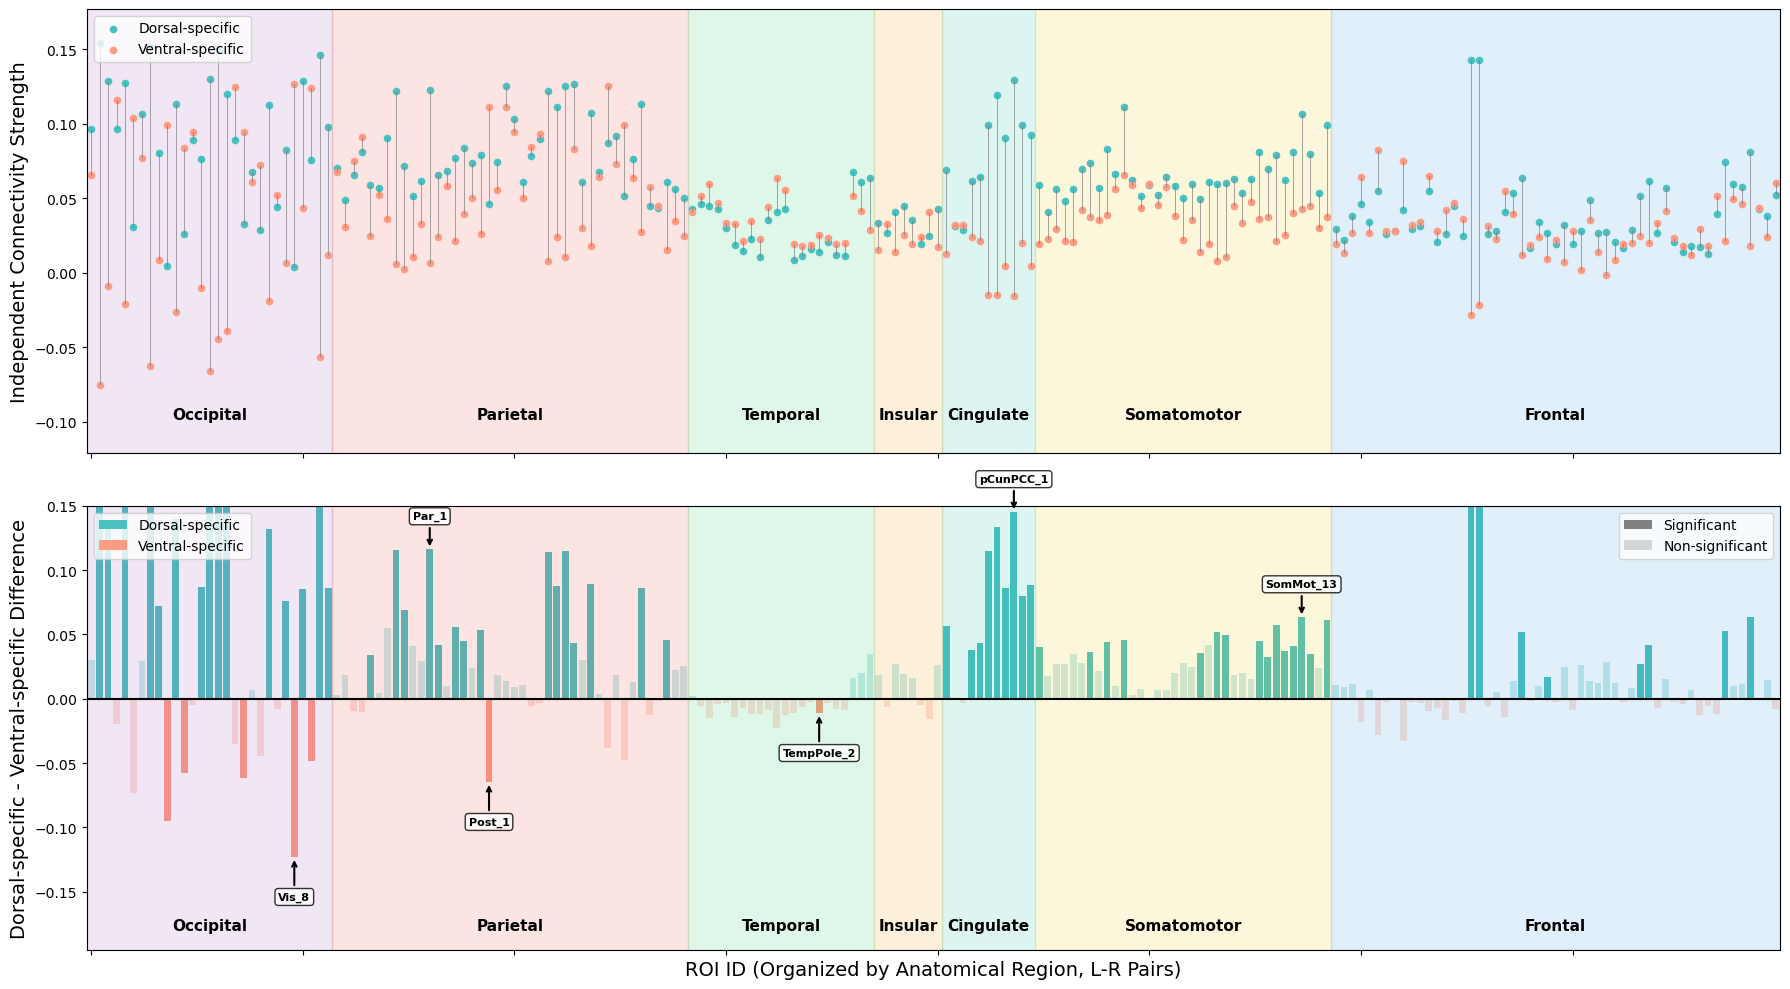


Partial Correlation significant peak and bottom ROIs by anatomical lobe:

Occipital Lobe:
  Peak (Dorsal-specific > Ventral-specific): Vis_13, Diff = 0.229
  Bottom (Ventral-specific > Dorsal-specific): Vis_8, Diff = -0.123

Parietal Lobe:
  Peak (Dorsal-specific > Ventral-specific): Par_1, Diff = 0.116
  Bottom (Ventral-specific > Dorsal-specific): Post_1, Diff = -0.065

Temporal Lobe:
  No significant dorsal-specific ROIs in this lobe
  Bottom (Ventral-specific > Dorsal-specific): TempPole_2, Diff = -0.011

Cingulate Lobe:
  Peak (Dorsal-specific > Ventral-specific): pCunPCC_1, Diff = 0.145
  No significant ventral-specific ROIs in this lobe

Somatomotor Lobe:
  Peak (Dorsal-specific > Ventral-specific): SomMot_13, Diff = 0.063
  No significant ventral-specific ROIs in this lobe

Frontal Lobe:
  Peak (Dorsal-specific > Ventral-specific): pCun_1, Diff = 0.171
  No significant ventral-specific ROIs in this lobe

Visualization complete!


In [2]:
# Cell: Partial Correlation Anatomical Organization Visualization (Figures E & F)
# Adapted from standard FC visualization for partial correlation data

import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import re
from matplotlib.patches import Patch

# Define paths
results_dir = '/user_data/csimmon2/git_repos/ptoc/results'
output_dir = f'{results_dir}/partial_correlation_magnitude'

# Load the CSV results from the magnitude analysis
csv_path = f'{output_dir}/bilateral_partial_correlation_connectivity_fingerprint_results.csv'

if not os.path.exists(csv_path):
    print(f"Error: Results file not found at {csv_path}")
    print("Please run the connectivity magnitude analysis first.")
else:
    results_df = pd.read_csv(csv_path)
    print(f"Loaded partial correlation data with {len(results_df)} ROIs")
    
    # Prepare ROI data for visualization
    roi_data = {
        'mean_pips': results_df['pIPS_clean_Connectivity'].values,
        'mean_lo': results_df['LO_clean_Connectivity'].values,
        'diff_profile': results_df['Difference'].values,
        'ci_lower': results_df['CI_Lower'].values,
        'ci_upper': results_df['CI_Upper'].values,
        'sig_combined': results_df['Combined_Significant'].values
    }
    
    # ============================================================================
    # Helper Functions
    # ============================================================================
    
    def map_to_anatomical_lobe(roi_name):
        """Map ROI names to anatomical lobes"""
        if isinstance(roi_name, bytes):
            roi_name = roi_name.decode('utf-8')
        
        if 'Wang_pIPS' in roi_name:
            return 'Parietal'
        elif 'Wang_LO' in roi_name:
            return 'Temporal'
        
        if 'Vis' in roi_name:
            return 'Occipital'
        elif 'SomMot' in roi_name:
            return 'Somatomotor'
        elif 'DorsAttn' in roi_name:
            if 'Par' in roi_name or 'IPL' in roi_name or 'IPS' in roi_name:
                return 'Parietal'
            elif 'Temp' in roi_name or 'MT' in roi_name:
                return 'Temporal'
            else:
                return 'Parietal'
        elif 'SalVentAttn' in roi_name:
            if 'Ins' in roi_name:
                return 'Insular'
            elif 'Cing' in roi_name or 'ACC' in roi_name:
                return 'Cingulate'
            elif 'Temp' in roi_name:
                return 'Temporal'
            elif 'Par' in roi_name:
                return 'Parietal'
            else:
                return 'Frontal'
        elif 'Limbic' in roi_name:
            if 'Temp' in roi_name:
                return 'Temporal'
            else:
                return 'Frontal'
        elif 'Cont' in roi_name:
            if 'Par' in roi_name or 'IPL' in roi_name or 'IPS' in roi_name:
                return 'Parietal'
            elif 'Temp' in roi_name or 'MT' in roi_name:
                return 'Temporal'
            elif 'Cing' in roi_name:
                return 'Cingulate'
            else:
                return 'Frontal'
        elif 'Default' in roi_name:
            if 'Par' in roi_name:
                return 'Parietal'
            elif 'Temp' in roi_name:
                return 'Temporal'
            elif 'PCC' in roi_name or 'Cing' in roi_name:
                return 'Cingulate'
            else:
                return 'Frontal'
        else:
            return 'Other'
    
    def clean_roi_name(roi_name):
        """Clean up ROI names for better labeling"""
        if isinstance(roi_name, bytes):
            roi_name = roi_name.decode('utf-8')
        
        if 'Wang_' in roi_name:
            return roi_name.replace('Wang_', '')
        
        cleaned = roi_name.replace('7Networks_', '')
        
        parts = cleaned.split('_')
        if len(parts) > 2:
            return parts[-2] + '_' + parts[-1]
        elif len(parts) > 1:
            return parts[-1]
        else:
            return cleaned
    
    def get_hemisphere_and_region(roi_name):
        """Determine hemisphere and base region for organizing pairs"""
        if isinstance(roi_name, bytes):
            roi_name = roi_name.decode('utf-8')
        
        if 'LH' in roi_name:
            hemisphere = 'L'
        elif 'RH' in roi_name:
            hemisphere = 'R'
        else:
            if 'Wang_pIPS' in roi_name or 'Wang_LO' in roi_name:
                hemisphere = 'X'
            else:
                hemisphere = 'X'
        
        cleaned = roi_name.replace('7Networks_', '')
        cleaned = cleaned.replace('LH_', '').replace('RH_', '')
        
        if 'Wang_' in cleaned:
            base_region = cleaned.replace('Wang_', '')
        else:
            base_region = re.sub(r'_\d+$', '', cleaned)
        
        return hemisphere, base_region
    
    # ============================================================================
    # Main Visualization
    # ============================================================================
    
    print("\nCreating anatomical organization visualization...")
    
    # Add anatomical lobe and hemisphere information
    results_df['Anatomical_Lobe'] = results_df['ROI_Name'].apply(map_to_anatomical_lobe)
    results_df['Clean_Name'] = results_df['ROI_Name'].apply(clean_roi_name)
    
    hemisphere_region = results_df['ROI_Name'].apply(get_hemisphere_and_region)
    results_df['Hemisphere'] = [h for h, r in hemisphere_region]
    results_df['Base_Region'] = [r for h, r in hemisphere_region]
    
    # Define lobe order - posterior to anterior
    lobe_order = [
        'Occipital',
        'Parietal',
        'Temporal',
        'Insular',
        'Cingulate',
        'Somatomotor',
        'Frontal',
        'Other'
    ]
    
    # Create categorical sorting
    lobe_cat = pd.Categorical(results_df['Anatomical_Lobe'], categories=lobe_order, ordered=True)
    results_df['Lobe_Sorted'] = lobe_cat
    
    # Define color palette
    lobe_colors = {
        'Frontal': '#3498db',
        'Somatomotor': '#f1c40f',
        'Parietal': '#e74c3c',
        'Temporal': '#2ecc71',
        'Occipital': '#9b59b6',
        'Insular': '#f39c12',
        'Cingulate': '#1abc9c',
        'Other': '#7f8c8d'
    }
    
    # Custom sorting function
    def custom_sort(row):
        lobe_idx = lobe_order.index(row['Anatomical_Lobe']) if row['Anatomical_Lobe'] in lobe_order else 999
        hemi_idx = 0 if row['Hemisphere'] == 'L' else 1 if row['Hemisphere'] == 'R' else 2
        return (lobe_idx, row['Base_Region'], hemi_idx)
    
    # Sort using the custom function
    results_df['sort_key'] = results_df.apply(custom_sort, axis=1)
    results_df_sorted = results_df.sort_values('sort_key')
    
    # Get the new order
    sorted_indices = results_df_sorted.index.values
    
    # Extract reordered data
    mean_pips_clean_sorted = results_df_sorted['pIPS_clean_Connectivity'].values
    mean_lo_clean_sorted = results_df_sorted['LO_clean_Connectivity'].values
    diff_profile_sorted = results_df_sorted['Difference'].values
    sig_sorted = results_df_sorted['Combined_Significant'].values
    
    # Find extreme ROIs in each lobe
    significant_roi_positions = []
    lobe_sections = []
    
    # Identify sections for each lobe
    current_lobe = None
    start_idx = 0
    
    for i, idx in enumerate(sorted_indices):
        lobe = results_df_sorted.iloc[i]['Anatomical_Lobe']
        if lobe != current_lobe:
            if current_lobe is not None:
                lobe_sections.append((current_lobe, start_idx, i-1))
            current_lobe = lobe
            start_idx = i
    
    # Add the last section
    if current_lobe is not None:
        lobe_sections.append((current_lobe, start_idx, len(sorted_indices)-1))
    
    # Find max and min in each section
    for lobe, start, end in lobe_sections:
        section_indices = sorted_indices[start:end+1]
        section_diff = diff_profile_sorted[start:end+1]
        section_sig = sig_sorted[start:end+1]
        
        sig_positions = np.where(section_sig)[0]
        if len(sig_positions) > 0:
            sig_diffs = section_diff[sig_positions]
            
            # Label positive max (dorsal-specific > ventral-specific)
            if np.max(sig_diffs) > 0:
                max_sig_idx = sig_positions[np.argmax(sig_diffs)]
                significant_roi_positions.append(start + max_sig_idx)
            
            # Label negative min (ventral-specific > dorsal-specific)
            if np.min(sig_diffs) < 0:
                min_sig_idx = sig_positions[np.argmin(sig_diffs)]
                significant_roi_positions.append(start + min_sig_idx)
    
    # Create the visualization
    plt.figure(figsize=(18, 10))
    
    # Top subplot - connectivity profiles with lollipop plot
    ax1 = plt.subplot(2, 1, 1)
    x = np.arange(len(mean_pips_clean_sorted))
    
    # Get y-limits for label positioning
    y_min = min(min(mean_pips_clean_sorted), min(mean_lo_clean_sorted))
    y_max = max(max(mean_pips_clean_sorted), max(mean_lo_clean_sorted))
    y_range = y_max - y_min
    
    # Plot background colors for lobes
    for lobe, start, end in lobe_sections:
        plt.axvspan(start - 0.5, end + 0.5, alpha=0.15, color=lobe_colors[lobe])
        label_y = y_min - 0.1 * y_range
        plt.text((start + end) / 2, label_y, lobe, ha='center', fontsize=11, fontweight='bold')
    
    # Lollipop plot - vertical lines
    for i in range(len(x)):
        plt.plot([x[i], x[i]], [mean_pips_clean_sorted[i], mean_lo_clean_sorted[i]], 
                color='gray', linestyle='-', linewidth=0.5)
    
    # Plot the points
    plt.scatter(x, mean_pips_clean_sorted, color='#4ac0c0', s=20, label='Dorsal-specific')
    plt.scatter(x, mean_lo_clean_sorted, color='#ff9b83', s=20, label='Ventral-specific')
    
    # Set y-axis limits
    plt.ylim(y_min - 0.2 * y_range, y_max + 0.1 * y_range)
    
    # Remove x-axis tick labels
    plt.tick_params(axis='x', which='both', bottom=True, top=False, labelbottom=False)
    plt.ylabel('Independent Connectivity Strength', fontsize=14)
    plt.legend(loc='upper left')
    plt.xlim(-0.5, len(mean_pips_clean_sorted) - 0.5)
    
    # Bottom subplot - difference
    ax2 = plt.subplot(2, 1, 2)
    
    # Get y-limits
    diff_min, diff_max = min(diff_profile_sorted), max(diff_profile_sorted)
    diff_range = diff_max - diff_min
    
    # Create bar plot
    base_colors = ['#4ac0c0' if val > 0 else '#ff9b83' for val in diff_profile_sorted]
    bars = plt.bar(x, diff_profile_sorted, color=base_colors)
    
    # Apply transparency to non-significant bars
    for i, (bar, is_sig) in enumerate(zip(bars, sig_sorted)):
        if not is_sig:
            bar.set_alpha(0.3)
    
    plt.axhline(y=0, color='black', linestyle='-')
    
    # Create two legends
    sig_legend_elements = [
        Patch(facecolor='gray', alpha=1.0, label='Significant'),
        Patch(facecolor='gray', alpha=0.3, label='Non-significant')
    ]
    sig_legend = plt.legend(handles=sig_legend_elements, loc='upper right')
    plt.gca().add_artist(sig_legend)
    
    pref_legend_elements = [
        Patch(facecolor='#4ac0c0', label='Dorsal-specific'),
        Patch(facecolor='#ff9b83', label='Ventral-specific')
    ]
    plt.legend(handles=pref_legend_elements, loc='upper left')
    
    # Add background colors for lobes
    for lobe, start, end in lobe_sections:
        plt.axvspan(start - 0.5, end + 0.5, alpha=0.15, color=lobe_colors[lobe])
    
    # Remove x-axis tick labels
    plt.tick_params(axis='x', which='both', bottom=True, top=False, labelbottom=False)
    
    # Label significant peak ROIs
    for position in significant_roi_positions:
        orig_idx = sorted_indices[position]
        roi_name = results_df.loc[orig_idx, 'Clean_Name']
        diff_value = diff_profile_sorted[position]
        
        plt.annotate(f'{roi_name}',
                    xy=(position, diff_value),
                    xytext=(0, 20 if diff_value >= 0 else -25),
                    textcoords='offset points',
                    ha='center',
                    va='bottom' if diff_value >= 0 else 'top',
                    fontsize=8,
                    fontweight='bold',
                    bbox=dict(boxstyle='round,pad=0.3', fc='white', alpha=0.8),
                    arrowprops=dict(arrowstyle='->', lw=1.5))
    
    plt.ylabel('Dorsal-specific - Ventral-specific Difference', fontsize=14)
    plt.xlabel('ROI ID (Organized by Anatomical Region, L-R Pairs)', fontsize=14)
    plt.xlim(-0.5, len(mean_pips_clean_sorted) - 0.5)
    
    # Set y-axis limits (adjust based on your data range)
    plt.ylim(-0.15, 0.15)
    
    # Get current y-limits for proper label positioning
    current_ylim = plt.ylim()
    y_range_bottom = current_ylim[1] - current_ylim[0]
    
    # Add lobe labels at the bottom
    for lobe, start, end in lobe_sections:
        label_y = current_ylim[0] - 0.1 * y_range_bottom
        plt.text((start + end) / 2, label_y, lobe, ha='center', fontsize=11, fontweight='bold')
    
    # Adjust y-limits to accommodate labels
    plt.ylim(current_ylim[0] - 0.15 * y_range_bottom, current_ylim[1])
    
    plt.tight_layout()
    plt.show()
    
    # Print peak and bottom ROIs by lobe
    print(f"\nPartial Correlation significant peak and bottom ROIs by anatomical lobe:")
    for lobe, start, end in lobe_sections:
        section_indices = sorted_indices[start:end+1]
        section_df = results_df.loc[section_indices]
        
        sig_group = section_df[section_df['Combined_Significant']]
        
        if len(sig_group) > 0:
            print(f"\n{lobe} Lobe:")
            
            # Most positive (dorsal-specific)
            dorsal_group = sig_group[sig_group['Difference'] > 0]
            if len(dorsal_group) > 0:
                peak_row = dorsal_group.loc[dorsal_group['Difference'].idxmax()]
                print(f"  Peak (Dorsal-specific > Ventral-specific): {peak_row['Clean_Name']}, " +
                      f"Diff = {peak_row['Difference']:.3f}")
            else:
                print("  No significant dorsal-specific ROIs in this lobe")
            
            # Most negative (ventral-specific)
            ventral_group = sig_group[sig_group['Difference'] < 0]
            if len(ventral_group) > 0:
                bottom_row = ventral_group.loc[ventral_group['Difference'].idxmin()]
                print(f"  Bottom (Ventral-specific > Dorsal-specific): {bottom_row['Clean_Name']}, " +
                      f"Diff = {bottom_row['Difference']:.3f}")
            else:
                print("  No significant ventral-specific ROIs in this lobe")
    
    print("\nVisualization complete!")

Loaded partial correlation data with 200 ROIs

Creating anatomical organization visualization...


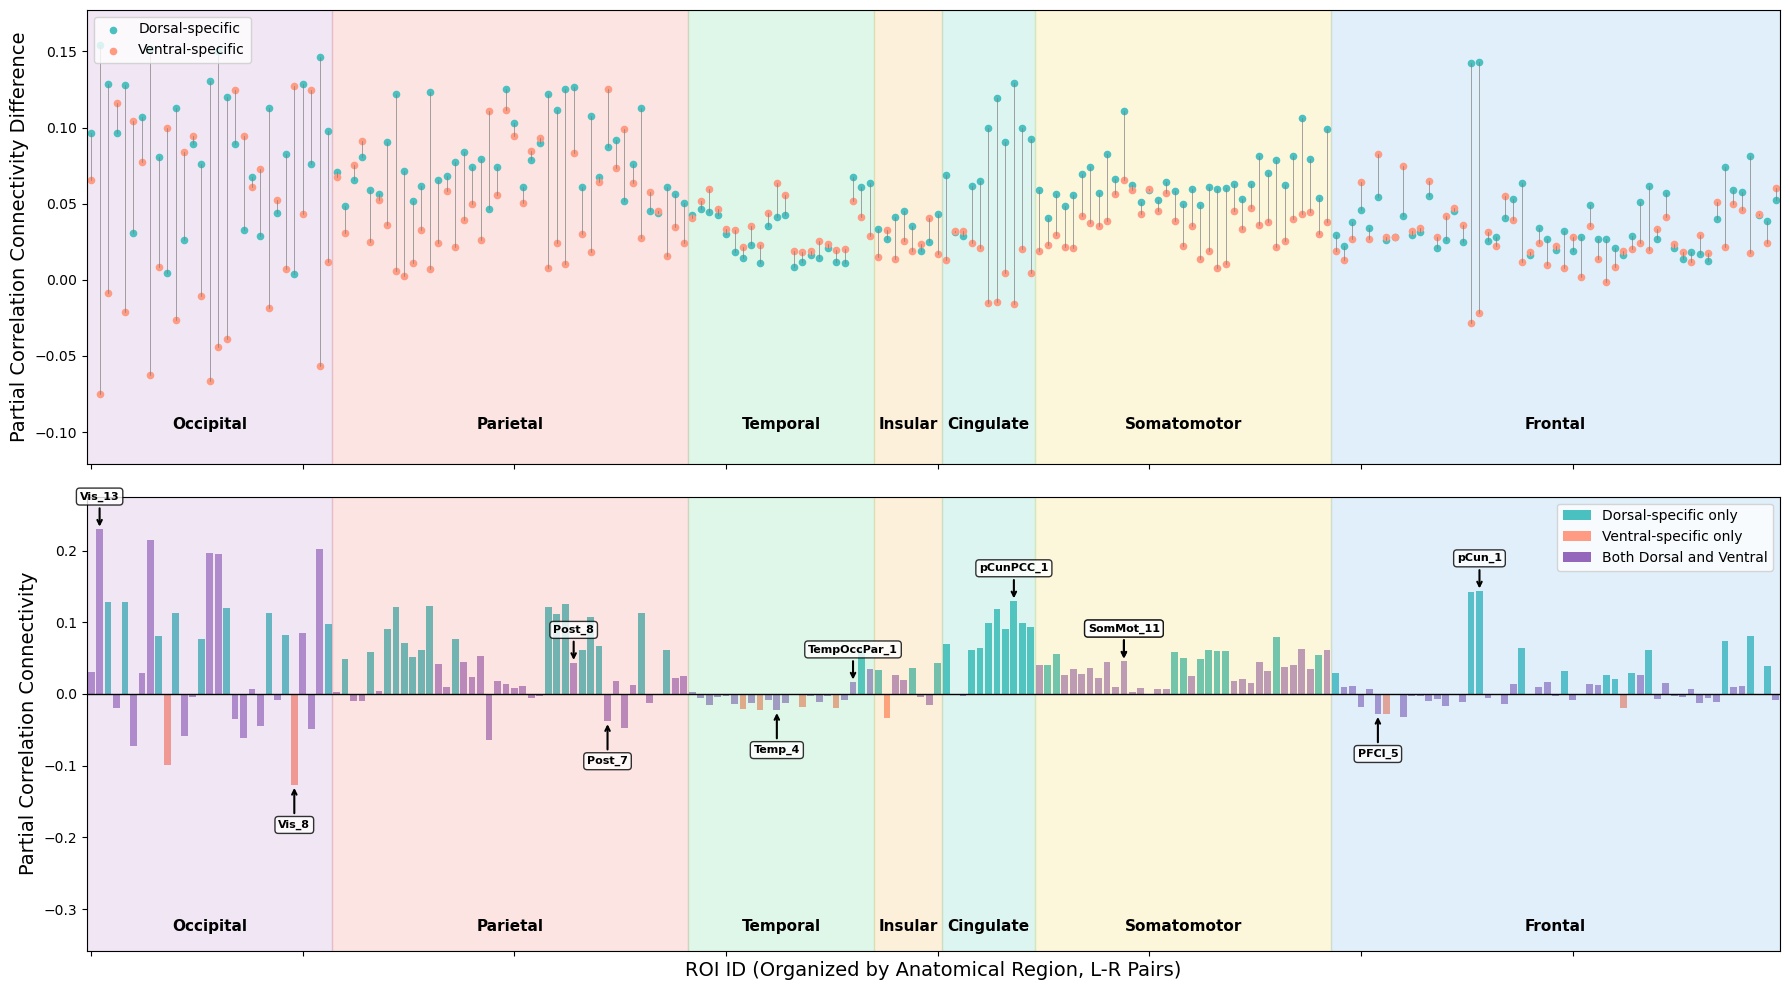


Partial Correlation significant ROIs by anatomical lobe:

Occipital Lobe:
  Strongest Dorsal-specific: Vis_13, Connectivity = 0.154
  Strongest Ventral-specific: Vis_8, Connectivity = 0.127
  ROIs significant in both networks: 18

Parietal Lobe:
  Strongest Dorsal-specific: Post_8, Connectivity = 0.127
  Strongest Ventral-specific: Post_7, Connectivity = 0.126
  ROIs significant in both networks: 25

Temporal Lobe:
  Strongest Dorsal-specific: TempOccPar_1, Connectivity = 0.068
  Strongest Ventral-specific: Temp_4, Connectivity = 0.064
  ROIs significant in both networks: 16

Insular Lobe:
  Strongest Dorsal-specific: FrOperIns_4, Connectivity = 0.045
  Strongest Ventral-specific: FrOperIns_3, Connectivity = 0.041
  ROIs significant in both networks: 4

Cingulate Lobe:
  Strongest Dorsal-specific: pCunPCC_1, Connectivity = 0.129
  Strongest Ventral-specific: Cing_2, Connectivity = 0.032
  ROIs significant in both networks: 2

Somatomotor Lobe:
  Strongest Dorsal-specific: SomMot_11, C

In [2]:
# Cell: Partial Correlation Anatomical Organization Visualization (Figures E & F)
# Adapted from standard FC visualization for partial correlation data

import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import re
from matplotlib.patches import Patch

# Define paths
results_dir = '/user_data/csimmon2/git_repos/ptoc/results'
output_dir = f'{results_dir}/partial_correlation_magnitude'

# Load the CSV results from the magnitude analysis
csv_path = f'{output_dir}/bilateral_partial_correlation_separate_networks_results.csv'

if not os.path.exists(csv_path):
    print(f"Error: Results file not found at {csv_path}")
    print("Please run the connectivity magnitude analysis first.")
else:
    results_df = pd.read_csv(csv_path)
    print(f"Loaded partial correlation data with {len(results_df)} ROIs")
    
    # Prepare ROI data for visualization
    roi_data = {
        'mean_pips': results_df['pIPS_clean_Connectivity'].values,
        'mean_lo': results_df['LO_clean_Connectivity'].values,
        'sig_pips_combined': results_df['pIPS_Combined_Significant'].values,
        'sig_lo_combined': results_df['LO_Combined_Significant'].values,
        'sig_both_combined': results_df['Both_Networks_Significant'].values
    }
    
    # ============================================================================
    # Helper Functions
    # ============================================================================
    
    def map_to_anatomical_lobe(roi_name):
        """Map ROI names to anatomical lobes"""
        if isinstance(roi_name, bytes):
            roi_name = roi_name.decode('utf-8')
        
        if 'Wang_pIPS' in roi_name:
            return 'Parietal'
        elif 'Wang_LO' in roi_name:
            return 'Temporal'
        
        if 'Vis' in roi_name:
            return 'Occipital'
        elif 'SomMot' in roi_name:
            return 'Somatomotor'
        elif 'DorsAttn' in roi_name:
            if 'Par' in roi_name or 'IPL' in roi_name or 'IPS' in roi_name:
                return 'Parietal'
            elif 'Temp' in roi_name or 'MT' in roi_name:
                return 'Temporal'
            else:
                return 'Parietal'
        elif 'SalVentAttn' in roi_name:
            if 'Ins' in roi_name:
                return 'Insular'
            elif 'Cing' in roi_name or 'ACC' in roi_name:
                return 'Cingulate'
            elif 'Temp' in roi_name:
                return 'Temporal'
            elif 'Par' in roi_name:
                return 'Parietal'
            else:
                return 'Frontal'
        elif 'Limbic' in roi_name:
            if 'Temp' in roi_name:
                return 'Temporal'
            else:
                return 'Frontal'
        elif 'Cont' in roi_name:
            if 'Par' in roi_name or 'IPL' in roi_name or 'IPS' in roi_name:
                return 'Parietal'
            elif 'Temp' in roi_name or 'MT' in roi_name:
                return 'Temporal'
            elif 'Cing' in roi_name:
                return 'Cingulate'
            else:
                return 'Frontal'
        elif 'Default' in roi_name:
            if 'Par' in roi_name:
                return 'Parietal'
            elif 'Temp' in roi_name:
                return 'Temporal'
            elif 'PCC' in roi_name or 'Cing' in roi_name:
                return 'Cingulate'
            else:
                return 'Frontal'
        else:
            return 'Other'
    
    def clean_roi_name(roi_name):
        """Clean up ROI names for better labeling"""
        if isinstance(roi_name, bytes):
            roi_name = roi_name.decode('utf-8')
        
        if 'Wang_' in roi_name:
            return roi_name.replace('Wang_', '')
        
        cleaned = roi_name.replace('7Networks_', '')
        
        parts = cleaned.split('_')
        if len(parts) > 2:
            return parts[-2] + '_' + parts[-1]
        elif len(parts) > 1:
            return parts[-1]
        else:
            return cleaned
    
    def get_hemisphere_and_region(roi_name):
        """Determine hemisphere and base region for organizing pairs"""
        if isinstance(roi_name, bytes):
            roi_name = roi_name.decode('utf-8')
        
        if 'LH' in roi_name:
            hemisphere = 'L'
        elif 'RH' in roi_name:
            hemisphere = 'R'
        else:
            if 'Wang_pIPS' in roi_name or 'Wang_LO' in roi_name:
                hemisphere = 'X'
            else:
                hemisphere = 'X'
        
        cleaned = roi_name.replace('7Networks_', '')
        cleaned = cleaned.replace('LH_', '').replace('RH_', '')
        
        if 'Wang_' in cleaned:
            base_region = cleaned.replace('Wang_', '')
        else:
            base_region = re.sub(r'_\d+$', '', cleaned)
        
        return hemisphere, base_region
    
    # ============================================================================
    # Main Visualization
    # ============================================================================
    
    print("\nCreating anatomical organization visualization...")
    
    # Add anatomical lobe and hemisphere information
    results_df['Anatomical_Lobe'] = results_df['ROI_Name'].apply(map_to_anatomical_lobe)
    results_df['Clean_Name'] = results_df['ROI_Name'].apply(clean_roi_name)
    
    hemisphere_region = results_df['ROI_Name'].apply(get_hemisphere_and_region)
    results_df['Hemisphere'] = [h for h, r in hemisphere_region]
    results_df['Base_Region'] = [r for h, r in hemisphere_region]
    
    # Define lobe order - posterior to anterior
    lobe_order = [
        'Occipital',
        'Parietal',
        'Temporal',
        'Insular',
        'Cingulate',
        'Somatomotor',
        'Frontal',
        'Other'
    ]
    
    # Create categorical sorting
    lobe_cat = pd.Categorical(results_df['Anatomical_Lobe'], categories=lobe_order, ordered=True)
    results_df['Lobe_Sorted'] = lobe_cat
    
    # Define color palette
    lobe_colors = {
        'Frontal': '#3498db',
        'Somatomotor': '#f1c40f',
        'Parietal': '#e74c3c',
        'Temporal': '#2ecc71',
        'Occipital': '#9b59b6',
        'Insular': '#f39c12',
        'Cingulate': '#1abc9c',
        'Other': '#7f8c8d'
    }
    
    # Custom sorting function
    def custom_sort(row):
        lobe_idx = lobe_order.index(row['Anatomical_Lobe']) if row['Anatomical_Lobe'] in lobe_order else 999
        hemi_idx = 0 if row['Hemisphere'] == 'L' else 1 if row['Hemisphere'] == 'R' else 2
        return (lobe_idx, row['Base_Region'], hemi_idx)
    
    # Sort using the custom function
    results_df['sort_key'] = results_df.apply(custom_sort, axis=1)
    results_df_sorted = results_df.sort_values('sort_key')
    
    # Get the new order
    sorted_indices = results_df_sorted.index.values
    
    # Extract reordered data
    mean_pips_clean_sorted = results_df_sorted['pIPS_clean_Connectivity'].values
    mean_lo_clean_sorted = results_df_sorted['LO_clean_Connectivity'].values
    sig_pips_sorted = results_df_sorted['pIPS_Combined_Significant'].values
    sig_lo_sorted = results_df_sorted['LO_Combined_Significant'].values
    sig_both_sorted = results_df_sorted['Both_Networks_Significant'].values
    
    # Find strongest connections in each lobe for each network
    significant_roi_positions = []
    lobe_sections = []
    
    # Identify sections for each lobe
    current_lobe = None
    start_idx = 0
    
    for i, idx in enumerate(sorted_indices):
        lobe = results_df_sorted.iloc[i]['Anatomical_Lobe']
        if lobe != current_lobe:
            if current_lobe is not None:
                lobe_sections.append((current_lobe, start_idx, i-1))
            current_lobe = lobe
            start_idx = i
    
    # Add the last section
    if current_lobe is not None:
        lobe_sections.append((current_lobe, start_idx, len(sorted_indices)-1))
    
    # Find strongest significant connections in each section
    for lobe, start, end in lobe_sections:
        section_indices = sorted_indices[start:end+1]
        section_pips = mean_pips_clean_sorted[start:end+1]
        section_lo = mean_lo_clean_sorted[start:end+1]
        section_sig_pips = sig_pips_sorted[start:end+1]
        section_sig_lo = sig_lo_sorted[start:end+1]
        
        # Find strongest dorsal-specific connection
        sig_pips_positions = np.where(section_sig_pips)[0]
        if len(sig_pips_positions) > 0:
            max_pips_idx = sig_pips_positions[np.argmax(section_pips[sig_pips_positions])]
            significant_roi_positions.append(('pips', start + max_pips_idx))
        
        # Find strongest ventral-specific connection
        sig_lo_positions = np.where(section_sig_lo)[0]
        if len(sig_lo_positions) > 0:
            max_lo_idx = sig_lo_positions[np.argmax(section_lo[sig_lo_positions])]
            significant_roi_positions.append(('lo', start + max_lo_idx))
    
    # Create the visualization
    plt.figure(figsize=(18, 10))
    
    # Top subplot - connectivity profiles with lollipop plot
    ax1 = plt.subplot(2, 1, 1)
    x = np.arange(len(mean_pips_clean_sorted))
    
    # Get y-limits for label positioning
    y_min = min(min(mean_pips_clean_sorted), min(mean_lo_clean_sorted))
    y_max = max(max(mean_pips_clean_sorted), max(mean_lo_clean_sorted))
    y_range = y_max - y_min
    
    # Plot background colors for lobes
    for lobe, start, end in lobe_sections:
        plt.axvspan(start - 0.5, end + 0.5, alpha=0.15, color=lobe_colors[lobe])
        label_y = y_min - 0.1 * y_range
        plt.text((start + end) / 2, label_y, lobe, ha='center', fontsize=11, fontweight='bold')
    
    # Lollipop plot - vertical lines
    for i in range(len(x)):
        plt.plot([x[i], x[i]], [mean_pips_clean_sorted[i], mean_lo_clean_sorted[i]], 
                color='gray', linestyle='-', linewidth=0.5)
    
    # Plot the points
    plt.scatter(x, mean_pips_clean_sorted, color='#4ac0c0', s=20, label='Dorsal-specific')
    plt.scatter(x, mean_lo_clean_sorted, color='#ff9b83', s=20, label='Ventral-specific')
    
    # Set y-axis limits
    plt.ylim(y_min - 0.2 * y_range, y_max + 0.1 * y_range)
    
    # Remove x-axis tick labels
    plt.tick_params(axis='x', which='both', bottom=True, top=False, labelbottom=False)
    plt.ylabel('Partial Correlation Connectivity Difference', fontsize=14)
    plt.legend(loc='upper left')
    plt.xlim(-0.5, len(mean_pips_clean_sorted) - 0.5)
    
    # Bottom subplot - network-specific connectivity
    ax2 = plt.subplot(2, 1, 2)
    
    # Create bar heights and colors based on significance patterns
    bar_heights = np.zeros(len(sorted_indices))
    bar_colors = []
    
    for i in range(len(sorted_indices)):
        if sig_both_sorted[i]:
            # Both networks significant → show difference, color purple
            bar_heights[i] = mean_pips_clean_sorted[i] - mean_lo_clean_sorted[i]
            bar_colors.append('#9467bd')  # Purple for overlap
        elif sig_pips_sorted[i]:
            # Only dorsal significant → show dorsal strength as positive
            bar_heights[i] = mean_pips_clean_sorted[i]
            bar_colors.append('#4ac0c0')  # Teal for dorsal-only
        elif sig_lo_sorted[i]:
            # Only ventral significant → show ventral strength as negative
            bar_heights[i] = -mean_lo_clean_sorted[i]
            bar_colors.append('#ff9b83')  # Peach for ventral-only
        else:
            # Non-significant
            bar_heights[i] = 0
            bar_colors.append('lightgray')
    
    # Create bars with slight transparency
    bars = plt.bar(x, bar_heights, color=bar_colors)

    # Apply different transparency levels
    for i, bar in enumerate(bars):
        if bar_colors[i] == '#9467bd':  # Purple
            bar.set_alpha(0.7)
        elif bar_colors[i] in ['#4ac0c0', '#ff9b83']:  # Teal or Peach
            bar.set_alpha(0.9)  # Less transparent (more opaque)
        else:  # lightgray
            bar.set_alpha(0.7)
    
    plt.axhline(y=0, color='black', linestyle='-', linewidth=1)
    
    # Create legend
    legend_elements = [
        Patch(facecolor='#4ac0c0', label='Dorsal-specific only'),
        Patch(facecolor='#ff9b83', label='Ventral-specific only'),
        Patch(facecolor='#9467bd', label='Both Dorsal and Ventral')
        #Patch(facecolor='lightgray', label='Non-significant')
    ]
    plt.legend(handles=legend_elements, loc='upper right')
    
    # Add background colors for lobes
    for lobe, start, end in lobe_sections:
        plt.axvspan(start - 0.5, end + 0.5, alpha=0.15, color=lobe_colors[lobe])
    
    # Remove x-axis tick labels
    plt.tick_params(axis='x', which='both', bottom=True, top=False, labelbottom=False)
    
    # Label strongest significant ROIs in each lobe (except Insular)
    for network_type, position in significant_roi_positions:
        orig_idx = sorted_indices[position]
        roi_name = results_df.loc[orig_idx, 'Clean_Name']
        roi_lobe = results_df.loc[orig_idx, 'Anatomical_Lobe']
        bar_height = bar_heights[position]
        
        # Only label if has meaningful height and not in Insular lobe
        if abs(bar_height) > 0.01 and roi_lobe != 'Insular':
            plt.annotate(f'{roi_name}',
                        xy=(position, bar_height),
                        xytext=(0, 20 if bar_height >= 0 else -25),
                        textcoords='offset points',
                        ha='center',
                        va='bottom' if bar_height >= 0 else 'top',
                        fontsize=8,
                        fontweight='bold',
                        bbox=dict(boxstyle='round,pad=0.3', fc='white', alpha=0.8),
                        arrowprops=dict(arrowstyle='->', lw=1.5))
    
    plt.ylabel('Partial Correlation Connectivity', fontsize=14)
    plt.xlabel('ROI ID (Organized by Anatomical Region, L-R Pairs)', fontsize=14)
    plt.xlim(-0.5, len(mean_pips_clean_sorted) - 0.5)
    
    # Set y-axis limits based on data range
    y_max = max(abs(np.min(bar_heights)), abs(np.max(bar_heights)))
    plt.ylim(-y_max * 1.2, y_max * 1.2)
    
    # Get current y-limits for proper label positioning
    current_ylim = plt.ylim()
    y_range_bottom = current_ylim[1] - current_ylim[0]
    
    # Add lobe labels at the bottom
    for lobe, start, end in lobe_sections:
        label_y = current_ylim[0] - 0.1 * y_range_bottom
        plt.text((start + end) / 2, label_y, lobe, ha='center', fontsize=11, fontweight='bold')
    
    # Adjust y-limits to accommodate labels
    plt.ylim(current_ylim[0] - 0.15 * y_range_bottom, current_ylim[1])
    
    plt.tight_layout()
    plt.show()
    
    # Print significant ROIs by lobe
    print(f"\nPartial Correlation significant ROIs by anatomical lobe:")
    for lobe, start, end in lobe_sections:
        section_indices = sorted_indices[start:end+1]
        section_df = results_df.loc[section_indices]
        
        sig_pips_group = section_df[section_df['pIPS_Combined_Significant']]
        sig_lo_group = section_df[section_df['LO_Combined_Significant']]
        sig_both_group = section_df[section_df['Both_Networks_Significant']]
        
        if len(sig_pips_group) > 0 or len(sig_lo_group) > 0:
            print(f"\n{lobe} Lobe:")
            
            # Strongest dorsal-specific connection
            if len(sig_pips_group) > 0:
                peak_row = sig_pips_group.loc[sig_pips_group['pIPS_clean_Connectivity'].idxmax()]
                print(f"  Strongest Dorsal-specific: {peak_row['Clean_Name']}, " +
                      f"Connectivity = {peak_row['pIPS_clean_Connectivity']:.3f}")
            else:
                print("  No significant dorsal-specific ROIs in this lobe")
            
            # Strongest ventral-specific connection
            if len(sig_lo_group) > 0:
                peak_row = sig_lo_group.loc[sig_lo_group['LO_clean_Connectivity'].idxmax()]
                print(f"  Strongest Ventral-specific: {peak_row['Clean_Name']}, " +
                      f"Connectivity = {peak_row['LO_clean_Connectivity']:.3f}")
            else:
                print("  No significant ventral-specific ROIs in this lobe")
            
            # ROIs significant in both
            if len(sig_both_group) > 0:
                print(f"  ROIs significant in both networks: {len(sig_both_group)}")
    
    print("\nVisualization complete!")

Loaded partial correlation data with 200 ROIs

Creating anatomical organization visualization...
Non-significant ROIs: 4


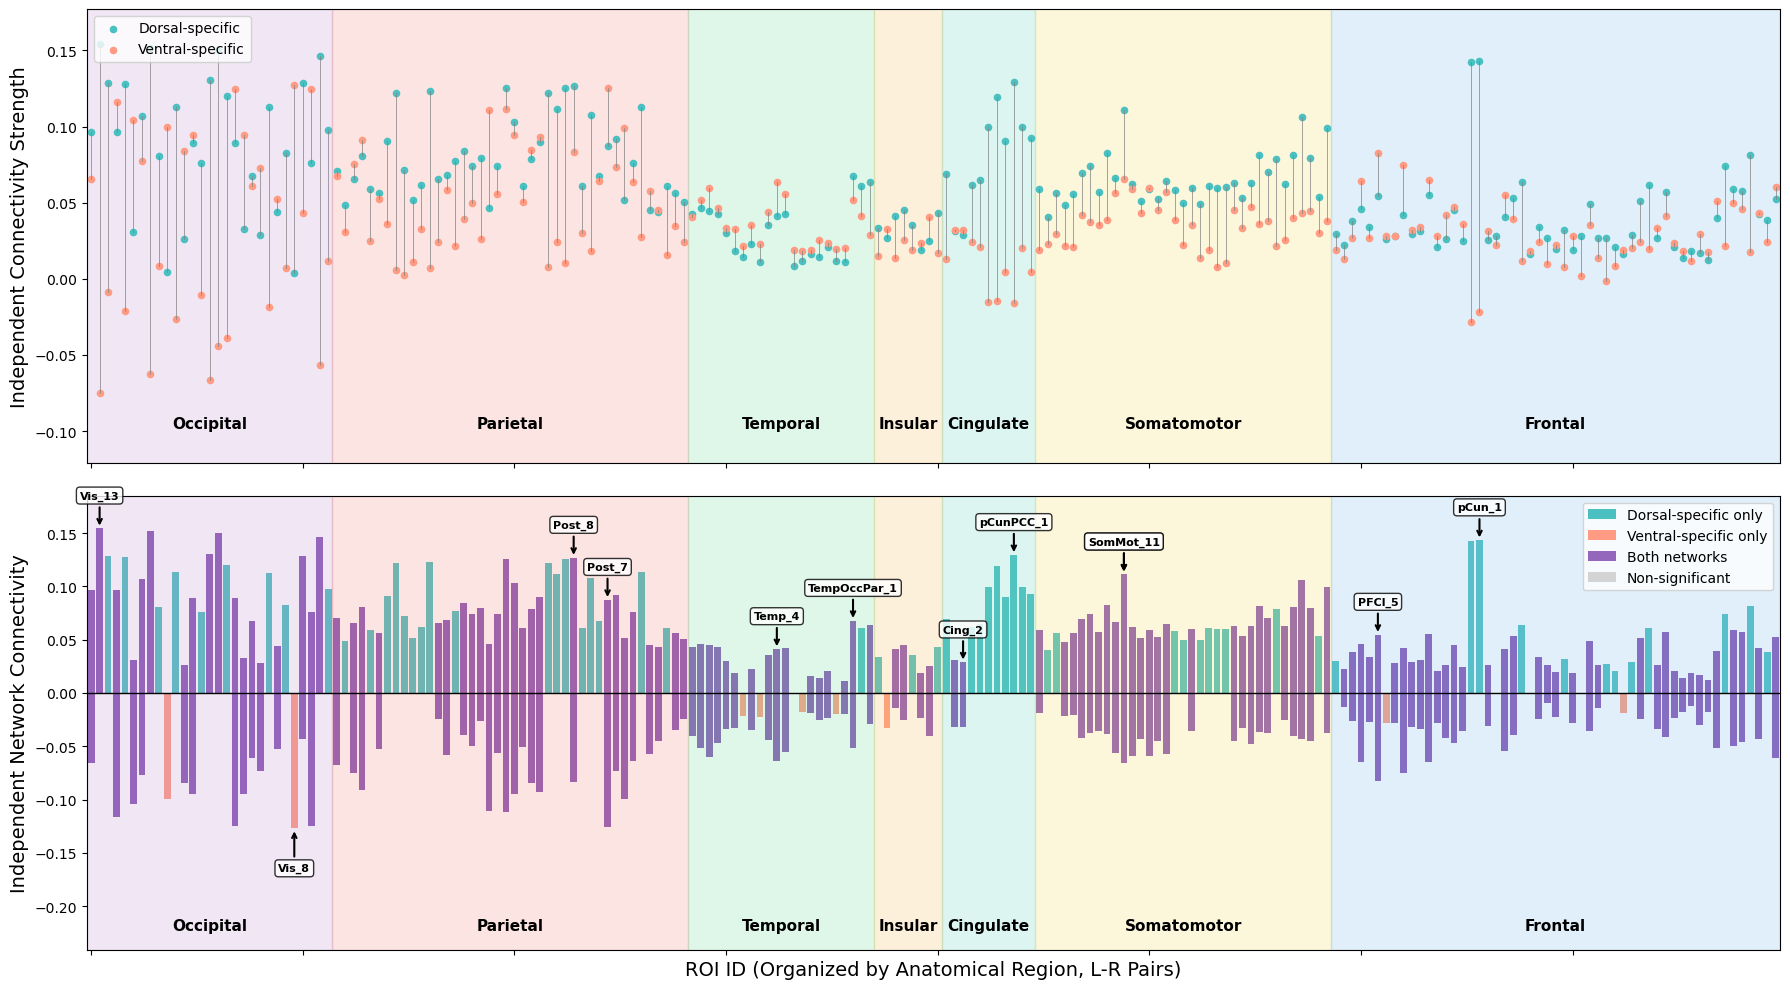


Partial Correlation significant ROIs by anatomical lobe:

Occipital Lobe:
  Strongest Dorsal-specific: Vis_13, Connectivity = 0.154
  Strongest Ventral-specific: Vis_8, Connectivity = 0.127
  ROIs significant in both networks: 18

Parietal Lobe:
  Strongest Dorsal-specific: Post_8, Connectivity = 0.127
  Strongest Ventral-specific: Post_7, Connectivity = 0.126
  ROIs significant in both networks: 25

Temporal Lobe:
  Strongest Dorsal-specific: TempOccPar_1, Connectivity = 0.068
  Strongest Ventral-specific: Temp_4, Connectivity = 0.064
  ROIs significant in both networks: 16

Insular Lobe:
  Strongest Dorsal-specific: FrOperIns_4, Connectivity = 0.045
  Strongest Ventral-specific: FrOperIns_3, Connectivity = 0.041
  ROIs significant in both networks: 4

Cingulate Lobe:
  Strongest Dorsal-specific: pCunPCC_1, Connectivity = 0.129
  Strongest Ventral-specific: Cing_2, Connectivity = 0.032
  ROIs significant in both networks: 2

Somatomotor Lobe:
  Strongest Dorsal-specific: SomMot_11, C

In [3]:
# Cell: Partial Correlation Anatomical Organization Visualization (Figures E & F)
# Adapted from standard FC visualization for partial correlation data

import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import re
from matplotlib.patches import Patch

# Define paths
results_dir = '/user_data/csimmon2/git_repos/ptoc/results'
output_dir = f'{results_dir}/partial_correlation_magnitude'

# Load the CSV results from the magnitude analysis
csv_path = f'{output_dir}/bilateral_partial_correlation_separate_networks_results.csv'

if not os.path.exists(csv_path):
    print(f"Error: Results file not found at {csv_path}")
    print("Please run the connectivity magnitude analysis first.")
else:
    results_df = pd.read_csv(csv_path)
    print(f"Loaded partial correlation data with {len(results_df)} ROIs")
    
    # Prepare ROI data for visualization
    roi_data = {
        'mean_pips': results_df['pIPS_clean_Connectivity'].values,
        'mean_lo': results_df['LO_clean_Connectivity'].values,
        'sig_pips_combined': results_df['pIPS_Combined_Significant'].values,
        'sig_lo_combined': results_df['LO_Combined_Significant'].values,
        'sig_both_combined': results_df['Both_Networks_Significant'].values
    }
    
    # ============================================================================
    # Helper Functions
    # ============================================================================
    
    def map_to_anatomical_lobe(roi_name):
        """Map ROI names to anatomical lobes"""
        if isinstance(roi_name, bytes):
            roi_name = roi_name.decode('utf-8')
        
        if 'Wang_pIPS' in roi_name:
            return 'Parietal'
        elif 'Wang_LO' in roi_name:
            return 'Temporal'
        
        if 'Vis' in roi_name:
            return 'Occipital'
        elif 'SomMot' in roi_name:
            return 'Somatomotor'
        elif 'DorsAttn' in roi_name:
            if 'Par' in roi_name or 'IPL' in roi_name or 'IPS' in roi_name:
                return 'Parietal'
            elif 'Temp' in roi_name or 'MT' in roi_name:
                return 'Temporal'
            else:
                return 'Parietal'
        elif 'SalVentAttn' in roi_name:
            if 'Ins' in roi_name:
                return 'Insular'
            elif 'Cing' in roi_name or 'ACC' in roi_name:
                return 'Cingulate'
            elif 'Temp' in roi_name:
                return 'Temporal'
            elif 'Par' in roi_name:
                return 'Parietal'
            else:
                return 'Frontal'
        elif 'Limbic' in roi_name:
            if 'Temp' in roi_name:
                return 'Temporal'
            else:
                return 'Frontal'
        elif 'Cont' in roi_name:
            if 'Par' in roi_name or 'IPL' in roi_name or 'IPS' in roi_name:
                return 'Parietal'
            elif 'Temp' in roi_name or 'MT' in roi_name:
                return 'Temporal'
            elif 'Cing' in roi_name:
                return 'Cingulate'
            else:
                return 'Frontal'
        elif 'Default' in roi_name:
            if 'Par' in roi_name:
                return 'Parietal'
            elif 'Temp' in roi_name:
                return 'Temporal'
            elif 'PCC' in roi_name or 'Cing' in roi_name:
                return 'Cingulate'
            else:
                return 'Frontal'
        else:
            return 'Other'
    
    def clean_roi_name(roi_name):
        """Clean up ROI names for better labeling"""
        if isinstance(roi_name, bytes):
            roi_name = roi_name.decode('utf-8')
        
        if 'Wang_' in roi_name:
            return roi_name.replace('Wang_', '')
        
        cleaned = roi_name.replace('7Networks_', '')
        
        parts = cleaned.split('_')
        if len(parts) > 2:
            return parts[-2] + '_' + parts[-1]
        elif len(parts) > 1:
            return parts[-1]
        else:
            return cleaned
    
    def get_hemisphere_and_region(roi_name):
        """Determine hemisphere and base region for organizing pairs"""
        if isinstance(roi_name, bytes):
            roi_name = roi_name.decode('utf-8')
        
        if 'LH' in roi_name:
            hemisphere = 'L'
        elif 'RH' in roi_name:
            hemisphere = 'R'
        else:
            if 'Wang_pIPS' in roi_name or 'Wang_LO' in roi_name:
                hemisphere = 'X'
            else:
                hemisphere = 'X'
        
        cleaned = roi_name.replace('7Networks_', '')
        cleaned = cleaned.replace('LH_', '').replace('RH_', '')
        
        if 'Wang_' in cleaned:
            base_region = cleaned.replace('Wang_', '')
        else:
            base_region = re.sub(r'_\d+$', '', cleaned)
        
        return hemisphere, base_region
    
    # ============================================================================
    # Main Visualization
    # ============================================================================
    
    print("\nCreating anatomical organization visualization...")
    
    # Add anatomical lobe and hemisphere information
    results_df['Anatomical_Lobe'] = results_df['ROI_Name'].apply(map_to_anatomical_lobe)
    results_df['Clean_Name'] = results_df['ROI_Name'].apply(clean_roi_name)
    
    hemisphere_region = results_df['ROI_Name'].apply(get_hemisphere_and_region)
    results_df['Hemisphere'] = [h for h, r in hemisphere_region]
    results_df['Base_Region'] = [r for h, r in hemisphere_region]
    
    # Define lobe order - posterior to anterior
    lobe_order = [
        'Occipital',
        'Parietal',
        'Temporal',
        'Insular',
        'Cingulate',
        'Somatomotor',
        'Frontal',
        'Other'
    ]
    
    # Create categorical sorting
    lobe_cat = pd.Categorical(results_df['Anatomical_Lobe'], categories=lobe_order, ordered=True)
    results_df['Lobe_Sorted'] = lobe_cat
    
    # Define color palette
    lobe_colors = {
        'Frontal': '#3498db',
        'Somatomotor': '#f1c40f',
        'Parietal': '#e74c3c',
        'Temporal': '#2ecc71',
        'Occipital': '#9b59b6',
        'Insular': '#f39c12',
        'Cingulate': '#1abc9c',
        'Other': '#7f8c8d'
    }
    
    # Custom sorting function
    def custom_sort(row):
        lobe_idx = lobe_order.index(row['Anatomical_Lobe']) if row['Anatomical_Lobe'] in lobe_order else 999
        hemi_idx = 0 if row['Hemisphere'] == 'L' else 1 if row['Hemisphere'] == 'R' else 2
        return (lobe_idx, row['Base_Region'], hemi_idx)
    
    # Sort using the custom function
    results_df['sort_key'] = results_df.apply(custom_sort, axis=1)
    results_df_sorted = results_df.sort_values('sort_key')
    
    # Get the new order
    sorted_indices = results_df_sorted.index.values
    
    # Extract reordered data
    mean_pips_clean_sorted = results_df_sorted['pIPS_clean_Connectivity'].values
    mean_lo_clean_sorted = results_df_sorted['LO_clean_Connectivity'].values
    sig_pips_sorted = results_df_sorted['pIPS_Combined_Significant'].values
    sig_lo_sorted = results_df_sorted['LO_Combined_Significant'].values
    sig_both_sorted = results_df_sorted['Both_Networks_Significant'].values
    
    # Find strongest connections in each lobe for each network
    significant_roi_positions = []
    lobe_sections = []
    
    # Identify sections for each lobe
    current_lobe = None
    start_idx = 0
    
    for i, idx in enumerate(sorted_indices):
        lobe = results_df_sorted.iloc[i]['Anatomical_Lobe']
        if lobe != current_lobe:
            if current_lobe is not None:
                lobe_sections.append((current_lobe, start_idx, i-1))
            current_lobe = lobe
            start_idx = i
    
    # Add the last section
    if current_lobe is not None:
        lobe_sections.append((current_lobe, start_idx, len(sorted_indices)-1))
    
    # Find strongest significant connections in each section
    for lobe, start, end in lobe_sections:
        section_indices = sorted_indices[start:end+1]
        section_pips = mean_pips_clean_sorted[start:end+1]
        section_lo = mean_lo_clean_sorted[start:end+1]
        section_sig_pips = sig_pips_sorted[start:end+1]
        section_sig_lo = sig_lo_sorted[start:end+1]
        
        # Find strongest dorsal-specific connection
        sig_pips_positions = np.where(section_sig_pips)[0]
        if len(sig_pips_positions) > 0:
            max_pips_idx = sig_pips_positions[np.argmax(section_pips[sig_pips_positions])]
            significant_roi_positions.append(('pips', start + max_pips_idx))
        
        # Find strongest ventral-specific connection
        sig_lo_positions = np.where(section_sig_lo)[0]
        if len(sig_lo_positions) > 0:
            max_lo_idx = sig_lo_positions[np.argmax(section_lo[sig_lo_positions])]
            significant_roi_positions.append(('lo', start + max_lo_idx))
    
    # Create the visualization
    plt.figure(figsize=(18, 10))
    
    # Top subplot - connectivity profiles with lollipop plot
    ax1 = plt.subplot(2, 1, 1)
    x = np.arange(len(mean_pips_clean_sorted))
    
    # Get y-limits for label positioning
    y_min = min(min(mean_pips_clean_sorted), min(mean_lo_clean_sorted))
    y_max = max(max(mean_pips_clean_sorted), max(mean_lo_clean_sorted))
    y_range = y_max - y_min
    
    # Plot background colors for lobes
    for lobe, start, end in lobe_sections:
        plt.axvspan(start - 0.5, end + 0.5, alpha=0.15, color=lobe_colors[lobe])
        label_y = y_min - 0.1 * y_range
        plt.text((start + end) / 2, label_y, lobe, ha='center', fontsize=11, fontweight='bold')
    
    # Lollipop plot - vertical lines
    for i in range(len(x)):
        plt.plot([x[i], x[i]], [mean_pips_clean_sorted[i], mean_lo_clean_sorted[i]], 
                color='gray', linestyle='-', linewidth=0.5)
    
    # Plot the points
    plt.scatter(x, mean_pips_clean_sorted, color='#4ac0c0', s=20, label='Dorsal-specific')
    plt.scatter(x, mean_lo_clean_sorted, color='#ff9b83', s=20, label='Ventral-specific')
    
    # Set y-axis limits
    plt.ylim(y_min - 0.2 * y_range, y_max + 0.1 * y_range)
    
    # Remove x-axis tick labels
    plt.tick_params(axis='x', which='both', bottom=True, top=False, labelbottom=False)
    plt.ylabel('Independent Connectivity Strength', fontsize=14)
    plt.legend(loc='upper left')
    plt.xlim(-0.5, len(mean_pips_clean_sorted) - 0.5)
    
    # Bottom subplot - network-specific connectivity
    ax2 = plt.subplot(2, 1, 2)
    
    # Check if there are any non-significant ROIs
    n_nonsig = np.sum(~sig_pips_sorted & ~sig_lo_sorted & ~sig_both_sorted)
    print(f"Non-significant ROIs: {n_nonsig}")
    
    # Create bar data
    # For regions significant in both, we'll plot TWO bars (dorsal up, ventral down)
    # For regions significant in one, we'll plot ONE bar
    
    x_positions = []
    bar_heights_list = []
    bar_colors_list = []
    bar_widths_list = []
    
    for i in range(len(sorted_indices)):
        if sig_both_sorted[i]:
            # Both networks significant → plot both as purple bars with narrower width
            # Dorsal (positive)
            x_positions.append(i)
            bar_heights_list.append(mean_pips_clean_sorted[i])
            bar_colors_list.append('#9467bd')
            bar_widths_list.append(0.8)  # Standard width
            # Ventral (negative)
            x_positions.append(i)
            bar_heights_list.append(-mean_lo_clean_sorted[i])
            bar_colors_list.append('#9467bd')
            bar_widths_list.append(0.8)  # Standard width
        elif sig_pips_sorted[i]:
            # Only dorsal significant
            x_positions.append(i)
            bar_heights_list.append(mean_pips_clean_sorted[i])
            bar_colors_list.append('#4ac0c0')
            bar_widths_list.append(0.8)
        elif sig_lo_sorted[i]:
            # Only ventral significant
            x_positions.append(i)
            bar_heights_list.append(-mean_lo_clean_sorted[i])
            bar_colors_list.append('#ff9b83')
            bar_widths_list.append(0.8)
    
    # Create bars with specified widths
    bars = plt.bar(x_positions, bar_heights_list, width=bar_widths_list, color=bar_colors_list)
    
    # Apply different transparency levels
    for i, bar in enumerate(bars):
        if bar_colors_list[i] == '#9467bd':  # Purple
            bar.set_alpha(1.0)  # Fully opaque to avoid overlap artifacts
        elif bar_colors_list[i] in ['#4ac0c0', '#ff9b83']:  # Teal or Peach
            bar.set_alpha(0.9)
        else:  # lightgray
            bar.set_alpha(0.7)
    
    plt.axhline(y=0, color='black', linestyle='-', linewidth=1)
    
    # Create legend (conditionally include non-significant)
    legend_elements = [
        Patch(facecolor='#4ac0c0', label='Dorsal-specific only'),
        Patch(facecolor='#ff9b83', label='Ventral-specific only'),
        Patch(facecolor='#9467bd', label='Both networks')
    ]
    
    if n_nonsig > 0:
        legend_elements.append(Patch(facecolor='lightgray', label='Non-significant'))
    
    plt.legend(handles=legend_elements, loc='upper right')
    
    # Add background colors for lobes
    for lobe, start, end in lobe_sections:
        plt.axvspan(start - 0.5, end + 0.5, alpha=0.15, color=lobe_colors[lobe])
    
    # Remove x-axis tick labels
    plt.tick_params(axis='x', which='both', bottom=True, top=False, labelbottom=False)
    
    # Label strongest significant ROIs in each lobe (except Insular)
    for network_type, position in significant_roi_positions:
        orig_idx = sorted_indices[position]
        roi_name = results_df.loc[orig_idx, 'Clean_Name']
        roi_lobe = results_df.loc[orig_idx, 'Anatomical_Lobe']
        
        # Determine bar height based on what's significant
        if sig_both_sorted[position]:
            # For both networks, label the dorsal (positive) bar
            bar_height = mean_pips_clean_sorted[position]
        elif sig_pips_sorted[position]:
            bar_height = mean_pips_clean_sorted[position]
        elif sig_lo_sorted[position]:
            bar_height = -mean_lo_clean_sorted[position]
        else:
            bar_height = 0
        
        # Only label if has meaningful height and not in Insular lobe
        if abs(bar_height) > 0.01 and roi_lobe != 'Insular':
            plt.annotate(f'{roi_name}',
                        xy=(position, bar_height),
                        xytext=(0, 20 if bar_height >= 0 else -25),
                        textcoords='offset points',
                        ha='center',
                        va='bottom' if bar_height >= 0 else 'top',
                        fontsize=8,
                        fontweight='bold',
                        bbox=dict(boxstyle='round,pad=0.3', fc='white', alpha=0.8),
                        arrowprops=dict(arrowstyle='->', lw=1.5))
    
    plt.ylabel('Independent Network Connectivity', fontsize=14)
    plt.xlabel('ROI ID (Organized by Anatomical Region, L-R Pairs)', fontsize=14)
    plt.xlim(-0.5, len(mean_pips_clean_sorted) - 0.5)
    
    # Set y-axis limits based on data range
    y_max = max(abs(min(bar_heights_list)), abs(max(bar_heights_list)))
    plt.ylim(-y_max * 1.2, y_max * 1.2)
    
    # Get current y-limits for proper label positioning
    current_ylim = plt.ylim()
    y_range_bottom = current_ylim[1] - current_ylim[0]
    
    # Add lobe labels at the bottom
    for lobe, start, end in lobe_sections:
        label_y = current_ylim[0] - 0.1 * y_range_bottom
        plt.text((start + end) / 2, label_y, lobe, ha='center', fontsize=11, fontweight='bold')
    
    # Adjust y-limits to accommodate labels
    plt.ylim(current_ylim[0] - 0.15 * y_range_bottom, current_ylim[1])
    
    plt.tight_layout()
    plt.show()
    
    # Print significant ROIs by lobe
    print(f"\nPartial Correlation significant ROIs by anatomical lobe:")
    for lobe, start, end in lobe_sections:
        section_indices = sorted_indices[start:end+1]
        section_df = results_df.loc[section_indices]
        
        sig_pips_group = section_df[section_df['pIPS_Combined_Significant']]
        sig_lo_group = section_df[section_df['LO_Combined_Significant']]
        sig_both_group = section_df[section_df['Both_Networks_Significant']]
        
        if len(sig_pips_group) > 0 or len(sig_lo_group) > 0:
            print(f"\n{lobe} Lobe:")
            
            # Strongest dorsal-specific connection
            if len(sig_pips_group) > 0:
                peak_row = sig_pips_group.loc[sig_pips_group['pIPS_clean_Connectivity'].idxmax()]
                print(f"  Strongest Dorsal-specific: {peak_row['Clean_Name']}, " +
                      f"Connectivity = {peak_row['pIPS_clean_Connectivity']:.3f}")
            else:
                print("  No significant dorsal-specific ROIs in this lobe")
            
            # Strongest ventral-specific connection
            if len(sig_lo_group) > 0:
                peak_row = sig_lo_group.loc[sig_lo_group['LO_clean_Connectivity'].idxmax()]
                print(f"  Strongest Ventral-specific: {peak_row['Clean_Name']}, " +
                      f"Connectivity = {peak_row['LO_clean_Connectivity']:.3f}")
            else:
                print("  No significant ventral-specific ROIs in this lobe")
            
            # ROIs significant in both
            if len(sig_both_group) > 0:
                print(f"  ROIs significant in both networks: {len(sig_both_group)}")
    
    print("\nVisualization complete!")

Loaded partial correlation data with 200 ROIs

Creating anatomical organization visualization...

ROI Significance Breakdown:
  Dorsal-specific only: 61
  Ventral-specific only: 9
  Both networks (non-sig difference): 126
  Total: 200


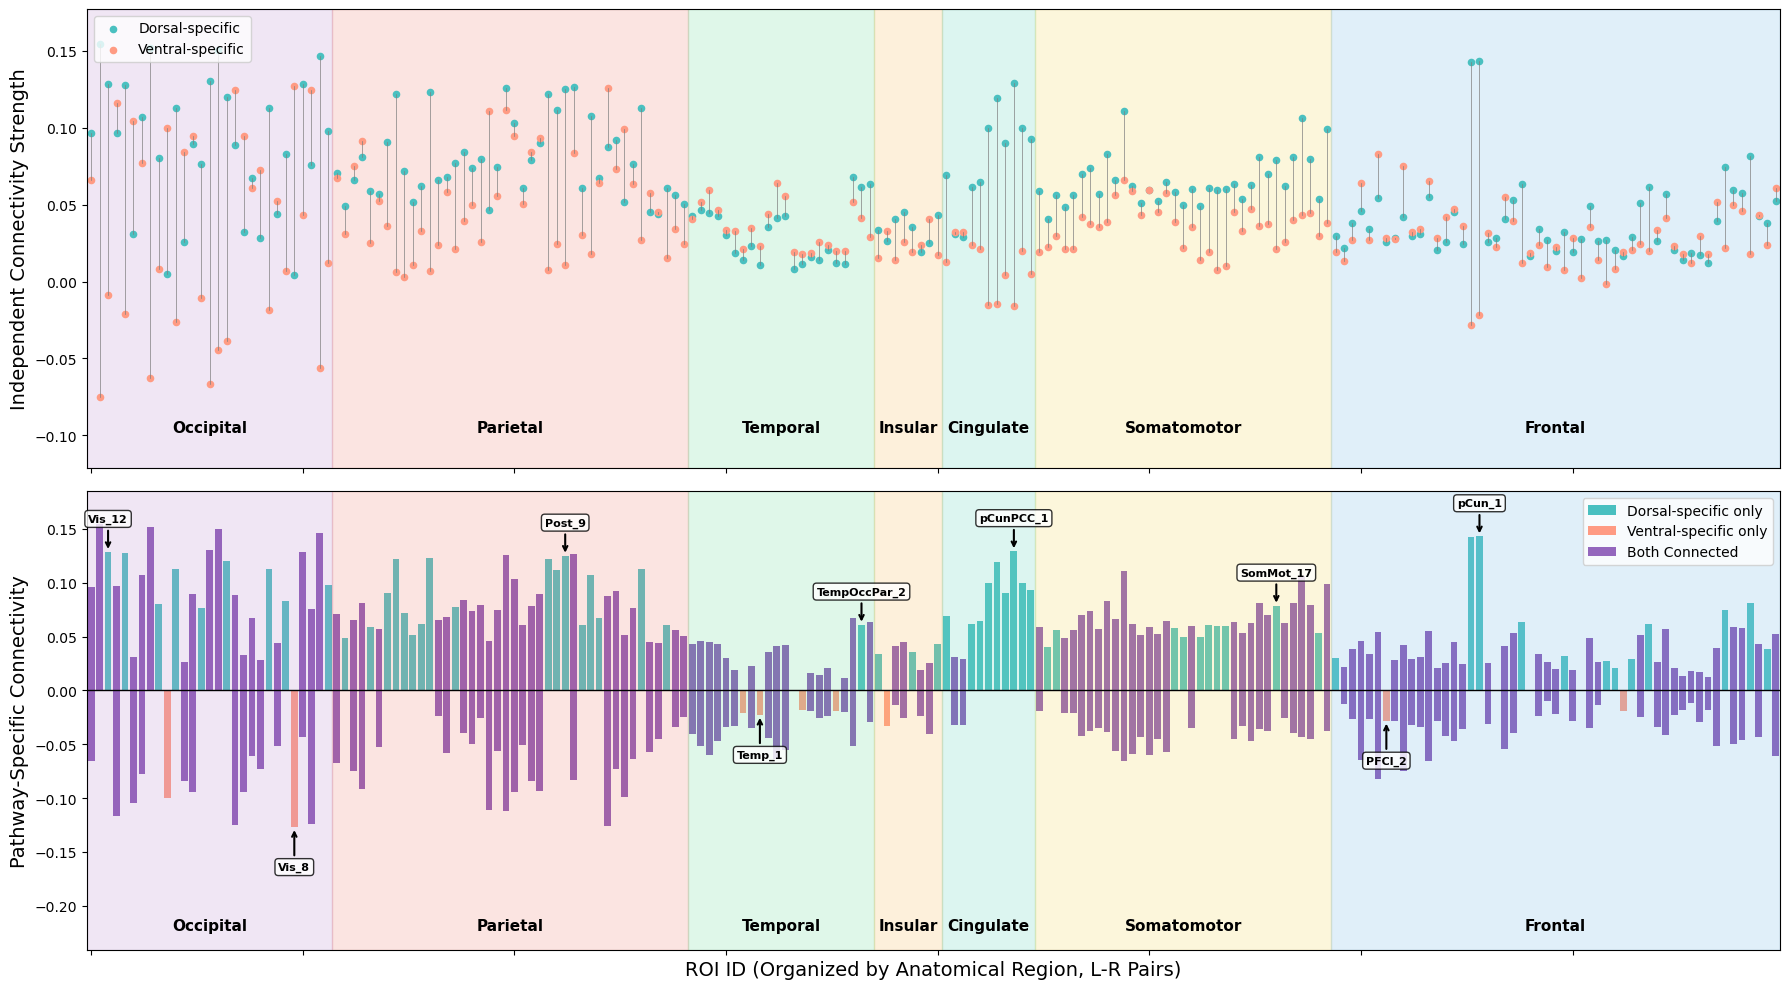


Pathway-Specific ROIs by anatomical lobe:

Occipital Lobe:
  Strongest Dorsal-specific only: Vis_12, Connectivity = 0.129
  Strongest Ventral-specific only: Vis_8, Connectivity = 0.127
  ROIs with both networks significant: 18

Parietal Lobe:
  Strongest Dorsal-specific only: Post_9, Connectivity = 0.125
  No ventral-specific only ROIs in this lobe
  ROIs with both networks significant: 25

Temporal Lobe:
  Strongest Dorsal-specific only: TempOccPar_2, Connectivity = 0.061
  Strongest Ventral-specific only: Temp_1, Connectivity = 0.023
  ROIs with both networks significant: 16

Insular Lobe:
  Strongest Dorsal-specific only: FrOperIns_4, Connectivity = 0.043
  Strongest Ventral-specific only: FrOperIns_2, Connectivity = 0.033
  ROIs with both networks significant: 4

Cingulate Lobe:
  Strongest Dorsal-specific only: pCunPCC_1, Connectivity = 0.129
  No ventral-specific only ROIs in this lobe
  ROIs with both networks significant: 2

Somatomotor Lobe:
  Strongest Dorsal-specific only: 

In [9]:
# Cell: Partial Correlation Anatomical Organization Visualization (Figures E & F)
# Adapted from standard FC visualization for partial correlation data

import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import re
from matplotlib.patches import Patch

# Define paths
results_dir = '/user_data/csimmon2/git_repos/ptoc/results'
output_dir = f'{results_dir}/partial_correlation_magnitude'

# Load the CSV results from the magnitude analysis (separate networks version)
csv_path = f'{output_dir}/bilateral_partial_correlation_separate_networks_results.csv'

if not os.path.exists(csv_path):
    print(f"Error: Results file not found at {csv_path}")
    print("Please run the connectivity magnitude analysis first.")
else:
    results_df = pd.read_csv(csv_path)
    print(f"Loaded partial correlation data with {len(results_df)} ROIs")
    
    # Prepare ROI data for visualization
    roi_data = {
        'mean_pips': results_df['pIPS_clean_Connectivity'].values,
        'mean_lo': results_df['LO_clean_Connectivity'].values,
        'sig_pips_combined': results_df['pIPS_Combined_Significant'].values,
        'sig_lo_combined': results_df['LO_Combined_Significant'].values,
        'sig_both_combined': results_df['Both_Networks_Significant'].values
    }
    
    # ============================================================================
    # Helper Functions
    # ============================================================================
    
    def map_to_anatomical_lobe(roi_name):
        """Map ROI names to anatomical lobes"""
        if isinstance(roi_name, bytes):
            roi_name = roi_name.decode('utf-8')
        
        if 'Wang_pIPS' in roi_name:
            return 'Parietal'
        elif 'Wang_LO' in roi_name:
            return 'Temporal'
        
        if 'Vis' in roi_name:
            return 'Occipital'
        elif 'SomMot' in roi_name:
            return 'Somatomotor'
        elif 'DorsAttn' in roi_name:
            if 'Par' in roi_name or 'IPL' in roi_name or 'IPS' in roi_name:
                return 'Parietal'
            elif 'Temp' in roi_name or 'MT' in roi_name:
                return 'Temporal'
            else:
                return 'Parietal'
        elif 'SalVentAttn' in roi_name:
            if 'Ins' in roi_name:
                return 'Insular'
            elif 'Cing' in roi_name or 'ACC' in roi_name:
                return 'Cingulate'
            elif 'Temp' in roi_name:
                return 'Temporal'
            elif 'Par' in roi_name:
                return 'Parietal'
            else:
                return 'Frontal'
        elif 'Limbic' in roi_name:
            if 'Temp' in roi_name:
                return 'Temporal'
            else:
                return 'Frontal'
        elif 'Cont' in roi_name:
            if 'Par' in roi_name or 'IPL' in roi_name or 'IPS' in roi_name:
                return 'Parietal'
            elif 'Temp' in roi_name or 'MT' in roi_name:
                return 'Temporal'
            elif 'Cing' in roi_name:
                return 'Cingulate'
            else:
                return 'Frontal'
        elif 'Default' in roi_name:
            if 'Par' in roi_name:
                return 'Parietal'
            elif 'Temp' in roi_name:
                return 'Temporal'
            elif 'PCC' in roi_name or 'Cing' in roi_name:
                return 'Cingulate'
            else:
                return 'Frontal'
        else:
            return 'Other'
    
    def clean_roi_name(roi_name):
        """Clean up ROI names for better labeling"""
        if isinstance(roi_name, bytes):
            roi_name = roi_name.decode('utf-8')
        
        if 'Wang_' in roi_name:
            return roi_name.replace('Wang_', '')
        
        cleaned = roi_name.replace('7Networks_', '')
        
        parts = cleaned.split('_')
        if len(parts) > 2:
            return parts[-2] + '_' + parts[-1]
        elif len(parts) > 1:
            return parts[-1]
        else:
            return cleaned
    
    def get_hemisphere_and_region(roi_name):
        """Determine hemisphere and base region for organizing pairs"""
        if isinstance(roi_name, bytes):
            roi_name = roi_name.decode('utf-8')
        
        if 'LH' in roi_name:
            hemisphere = 'L'
        elif 'RH' in roi_name:
            hemisphere = 'R'
        else:
            if 'Wang_pIPS' in roi_name or 'Wang_LO' in roi_name:
                hemisphere = 'X'
            else:
                hemisphere = 'X'
        
        cleaned = roi_name.replace('7Networks_', '')
        cleaned = cleaned.replace('LH_', '').replace('RH_', '')
        
        if 'Wang_' in cleaned:
            base_region = cleaned.replace('Wang_', '')
        else:
            base_region = re.sub(r'_\d+$', '', cleaned)
        
        return hemisphere, base_region
    
    # ============================================================================
    # Main Visualization
    # ============================================================================
    
    print("\nCreating anatomical organization visualization...")
    
    # Add anatomical lobe and hemisphere information
    results_df['Anatomical_Lobe'] = results_df['ROI_Name'].apply(map_to_anatomical_lobe)
    results_df['Clean_Name'] = results_df['ROI_Name'].apply(clean_roi_name)
    
    hemisphere_region = results_df['ROI_Name'].apply(get_hemisphere_and_region)
    results_df['Hemisphere'] = [h for h, r in hemisphere_region]
    results_df['Base_Region'] = [r for h, r in hemisphere_region]
    
    # Define lobe order - posterior to anterior
    lobe_order = [
        'Occipital',
        'Parietal',
        'Temporal',
        'Insular',
        'Cingulate',
        'Somatomotor',
        'Frontal',
        'Other'
    ]
    
    # Create categorical sorting
    lobe_cat = pd.Categorical(results_df['Anatomical_Lobe'], categories=lobe_order, ordered=True)
    results_df['Lobe_Sorted'] = lobe_cat
    
    # Define color palette
    lobe_colors = {
        'Frontal': '#3498db',
        'Somatomotor': '#f1c40f',
        'Parietal': '#e74c3c',
        'Temporal': '#2ecc71',
        'Occipital': '#9b59b6',
        'Insular': '#f39c12',
        'Cingulate': '#1abc9c',
        'Other': '#7f8c8d'
    }
    
    # Custom sorting function
    def custom_sort(row):
        lobe_idx = lobe_order.index(row['Anatomical_Lobe']) if row['Anatomical_Lobe'] in lobe_order else 999
        hemi_idx = 0 if row['Hemisphere'] == 'L' else 1 if row['Hemisphere'] == 'R' else 2
        return (lobe_idx, row['Base_Region'], hemi_idx)
    
    # Sort using the custom function
    results_df['sort_key'] = results_df.apply(custom_sort, axis=1)
    results_df_sorted = results_df.sort_values('sort_key')
    
    # Get the new order
    sorted_indices = results_df_sorted.index.values
    
    # Extract reordered data
    mean_pips_clean_sorted = results_df_sorted['pIPS_clean_Connectivity'].values
    mean_lo_clean_sorted = results_df_sorted['LO_clean_Connectivity'].values
    sig_pips_sorted = results_df_sorted['pIPS_Combined_Significant'].values
    sig_lo_sorted = results_df_sorted['LO_Combined_Significant'].values
    sig_both_sorted = results_df_sorted['Both_Networks_Significant'].values
    
    # Categorize ROIs based on which networks are significant
    sig_dorsal_only = sig_pips_sorted & ~sig_lo_sorted
    sig_ventral_only = sig_lo_sorted & ~sig_pips_sorted
    sig_both = sig_both_sorted  # Both networks significant
    
    # Find strongest connections in each lobe for each category
    significant_roi_positions = []
    lobe_sections = []
    
    # Identify sections for each lobe
    current_lobe = None
    start_idx = 0
    
    for i, idx in enumerate(sorted_indices):
        lobe = results_df_sorted.iloc[i]['Anatomical_Lobe']
        if lobe != current_lobe:
            if current_lobe is not None:
                lobe_sections.append((current_lobe, start_idx, i-1))
            current_lobe = lobe
            start_idx = i
    
    # Add the last section
    if current_lobe is not None:
        lobe_sections.append((current_lobe, start_idx, len(sorted_indices)-1))
    
    # Find strongest significant connections in each section
    for lobe, start, end in lobe_sections:
        section_indices = sorted_indices[start:end+1]
        section_pips = mean_pips_clean_sorted[start:end+1]
        section_lo = mean_lo_clean_sorted[start:end+1]
        section_sig_dorsal = sig_dorsal_only[start:end+1]
        section_sig_ventral = sig_ventral_only[start:end+1]
        
        # Find strongest dorsal-specific connection
        dorsal_positions = np.where(section_sig_dorsal)[0]
        if len(dorsal_positions) > 0:
            max_dorsal_idx = dorsal_positions[np.argmax(section_pips[dorsal_positions])]
            significant_roi_positions.append(('dorsal', start + max_dorsal_idx))
        
        # Find strongest ventral-specific connection
        ventral_positions = np.where(section_sig_ventral)[0]
        if len(ventral_positions) > 0:
            max_ventral_idx = ventral_positions[np.argmax(section_lo[ventral_positions])]
            significant_roi_positions.append(('ventral', start + max_ventral_idx))
    
    # Create the visualization
    plt.figure(figsize=(18, 10))
    
    # Top subplot - connectivity profiles with lollipop plot
    ax1 = plt.subplot(2, 1, 1)
    x = np.arange(len(mean_pips_clean_sorted))
    
    # Get y-limits for label positioning
    y_min = min(min(mean_pips_clean_sorted), min(mean_lo_clean_sorted))
    y_max = max(max(mean_pips_clean_sorted), max(mean_lo_clean_sorted))
    y_range = y_max - y_min
    
    # Plot background colors for lobes
    for lobe, start, end in lobe_sections:
        plt.axvspan(start - 0.5, end + 0.5, alpha=0.15, color=lobe_colors[lobe])
        label_y = y_min - 0.1 * y_range
        plt.text((start + end) / 2, label_y, lobe, ha='center', fontsize=11, fontweight='bold')
    
    # Lollipop plot - vertical lines
    for i in range(len(x)):
        plt.plot([x[i], x[i]], [mean_pips_clean_sorted[i], mean_lo_clean_sorted[i]], 
                color='gray', linestyle='-', linewidth=0.5)
    
    # Plot the points
    plt.scatter(x, mean_pips_clean_sorted, color='#4ac0c0', s=20, label='Dorsal-specific')
    plt.scatter(x, mean_lo_clean_sorted, color='#ff9b83', s=20, label='Ventral-specific')
    
    # Set y-axis limits
    plt.ylim(y_min - 0.2 * y_range, y_max + 0.1 * y_range)
    
    # Remove x-axis tick labels
    plt.tick_params(axis='x', which='both', bottom=True, top=False, labelbottom=False)
    plt.ylabel('Independent Connectivity Strength', fontsize=14)
    plt.legend(loc='upper left')
    plt.xlim(-0.5, len(mean_pips_clean_sorted) - 0.5)
    
    # Bottom subplot - pathway-specific connectivity
    ax2 = plt.subplot(2, 1, 2)
    
    # Check if there are any non-significant ROIs
    n_nonsig = np.sum(sig_both)
    n_dorsal_only = np.sum(sig_dorsal_only)
    n_ventral_only = np.sum(sig_ventral_only)
    
    print(f"\nROI Significance Breakdown:")
    print(f"  Dorsal-specific only: {n_dorsal_only}")
    print(f"  Ventral-specific only: {n_ventral_only}")
    print(f"  Both networks (non-sig difference): {n_nonsig}")
    print(f"  Total: {len(sorted_indices)}")
    
    # Create bar data
    x_positions = []
    bar_heights_list = []
    bar_colors_list = []
    bar_widths_list = []
    
    for i in range(len(sorted_indices)):
        if sig_both[i]:
            # Non-significant difference → plot both as purple bars
            # Dorsal (positive)
            x_positions.append(i)
            bar_heights_list.append(mean_pips_clean_sorted[i])
            bar_colors_list.append('#9467bd')
            bar_widths_list.append(0.8)
            # Ventral (negative)
            x_positions.append(i)
            bar_heights_list.append(-mean_lo_clean_sorted[i])
            bar_colors_list.append('#9467bd')
            bar_widths_list.append(0.8)
        elif sig_dorsal_only[i]:
            # Dorsal-specific (dorsal > ventral significantly)
            x_positions.append(i)
            bar_heights_list.append(mean_pips_clean_sorted[i])
            bar_colors_list.append('#4ac0c0')
            bar_widths_list.append(0.8)
        elif sig_ventral_only[i]:
            # Ventral-specific (ventral > dorsal significantly)
            x_positions.append(i)
            bar_heights_list.append(-mean_lo_clean_sorted[i])
            bar_colors_list.append('#ff9b83')
            bar_widths_list.append(0.8)
    
    # Create bars with specified widths
    bars = plt.bar(x_positions, bar_heights_list, width=bar_widths_list, color=bar_colors_list)
    
    # Apply different transparency levels
    for i, bar in enumerate(bars):
        if bar_colors_list[i] == '#9467bd':  # Purple
            bar.set_alpha(1.0)  # Fully opaque to avoid overlap artifacts
        elif bar_colors_list[i] in ['#4ac0c0', '#ff9b83']:  # Teal or Peach
            bar.set_alpha(0.9)
        else:  # lightgray
            bar.set_alpha(0.7)
    
    plt.axhline(y=0, color='black', linestyle='-', linewidth=1)
    
    # Create legend
    legend_elements = [
        Patch(facecolor='#4ac0c0', label='Dorsal-specific only'),
        Patch(facecolor='#ff9b83', label='Ventral-specific only'),
        Patch(facecolor='#9467bd', label='Both Connected')
    ]
    plt.legend(handles=legend_elements, loc='upper right')
    
    # Add background colors for lobes
    for lobe, start, end in lobe_sections:
        plt.axvspan(start - 0.5, end + 0.5, alpha=0.15, color=lobe_colors[lobe])
    
    # Remove x-axis tick labels
    plt.tick_params(axis='x', which='both', bottom=True, top=False, labelbottom=False)
    
    # Label strongest significant ROIs in each lobe (except Insular)
    for network_type, position in significant_roi_positions:
        orig_idx = sorted_indices[position]
        roi_name = results_df.loc[orig_idx, 'Clean_Name']
        roi_lobe = results_df.loc[orig_idx, 'Anatomical_Lobe']
        
        # Determine bar height based on category
        if sig_both[position]:
            # For both networks, label the dorsal (positive) bar
            bar_height = mean_pips_clean_sorted[position]
        elif sig_dorsal_only[position]:
            bar_height = mean_pips_clean_sorted[position]
        elif sig_ventral_only[position]:
            bar_height = -mean_lo_clean_sorted[position]
        else:
            bar_height = 0
        
        # Only label if has meaningful height and not in Insular lobe
        if abs(bar_height) > 0.01 and roi_lobe != 'Insular':
            plt.annotate(f'{roi_name}',
                        xy=(position, bar_height),
                        xytext=(0, 20 if bar_height >= 0 else -25),
                        textcoords='offset points',
                        ha='center',
                        va='bottom' if bar_height >= 0 else 'top',
                        fontsize=8,
                        fontweight='bold',
                        bbox=dict(boxstyle='round,pad=0.3', fc='white', alpha=0.8),
                        arrowprops=dict(arrowstyle='->', lw=1.5))
    
    plt.ylabel('Pathway-Specific Connectivity', fontsize=14)
    plt.xlabel('ROI ID (Organized by Anatomical Region, L-R Pairs)', fontsize=14)
    plt.xlim(-0.5, len(mean_pips_clean_sorted) - 0.5)
    
    # Set y-axis limits based on data range
    y_max = max(abs(min(bar_heights_list)), abs(max(bar_heights_list)))
    plt.ylim(-y_max * 1.2, y_max * 1.2)
    
    # Get current y-limits for proper label positioning
    current_ylim = plt.ylim()
    y_range_bottom = current_ylim[1] - current_ylim[0]
    
    # Add lobe labels at the bottom
    for lobe, start, end in lobe_sections:
        label_y = current_ylim[0] - 0.1 * y_range_bottom
        plt.text((start + end) / 2, label_y, lobe, ha='center', fontsize=11, fontweight='bold')
    
    # Adjust y-limits to accommodate labels
    plt.ylim(current_ylim[0] - 0.15 * y_range_bottom, current_ylim[1])
    
    plt.tight_layout()
    plt.show()
    
    # Print significant ROIs by lobe
    print(f"\nPathway-Specific ROIs by anatomical lobe:")
    for lobe, start, end in lobe_sections:
        section_indices = sorted_indices[start:end+1]
        section_df = results_df.loc[section_indices]
        
        sig_dorsal_group = section_df[section_df['pIPS_Combined_Significant'] & ~section_df['LO_Combined_Significant']]
        sig_ventral_group = section_df[section_df['LO_Combined_Significant'] & ~section_df['pIPS_Combined_Significant']]
        sig_both_group = section_df[section_df['Both_Networks_Significant']]
        
        if len(sig_dorsal_group) > 0 or len(sig_ventral_group) > 0 or len(sig_both_group) > 0:
            print(f"\n{lobe} Lobe:")
            
            # Strongest dorsal-specific connection
            if len(sig_dorsal_group) > 0:
                peak_row = sig_dorsal_group.loc[sig_dorsal_group['pIPS_clean_Connectivity'].idxmax()]
                print(f"  Strongest Dorsal-specific only: {peak_row['Clean_Name']}, " +
                      f"Connectivity = {peak_row['pIPS_clean_Connectivity']:.3f}")
            else:
                print("  No dorsal-specific only ROIs in this lobe")
            
            # Strongest ventral-specific connection
            if len(sig_ventral_group) > 0:
                peak_row = sig_ventral_group.loc[sig_ventral_group['LO_clean_Connectivity'].idxmax()]
                print(f"  Strongest Ventral-specific only: {peak_row['Clean_Name']}, " +
                      f"Connectivity = {peak_row['LO_clean_Connectivity']:.3f}")
            else:
                print("  No ventral-specific only ROIs in this lobe")
            
            # ROIs with both networks
            if len(sig_both_group) > 0:
                print(f"  ROIs with both networks significant: {len(sig_both_group)}")
    
    print("\nVisualization complete!")

Loaded partial correlation data with 200 ROIs

Creating pathway-specific connectivity visualization...


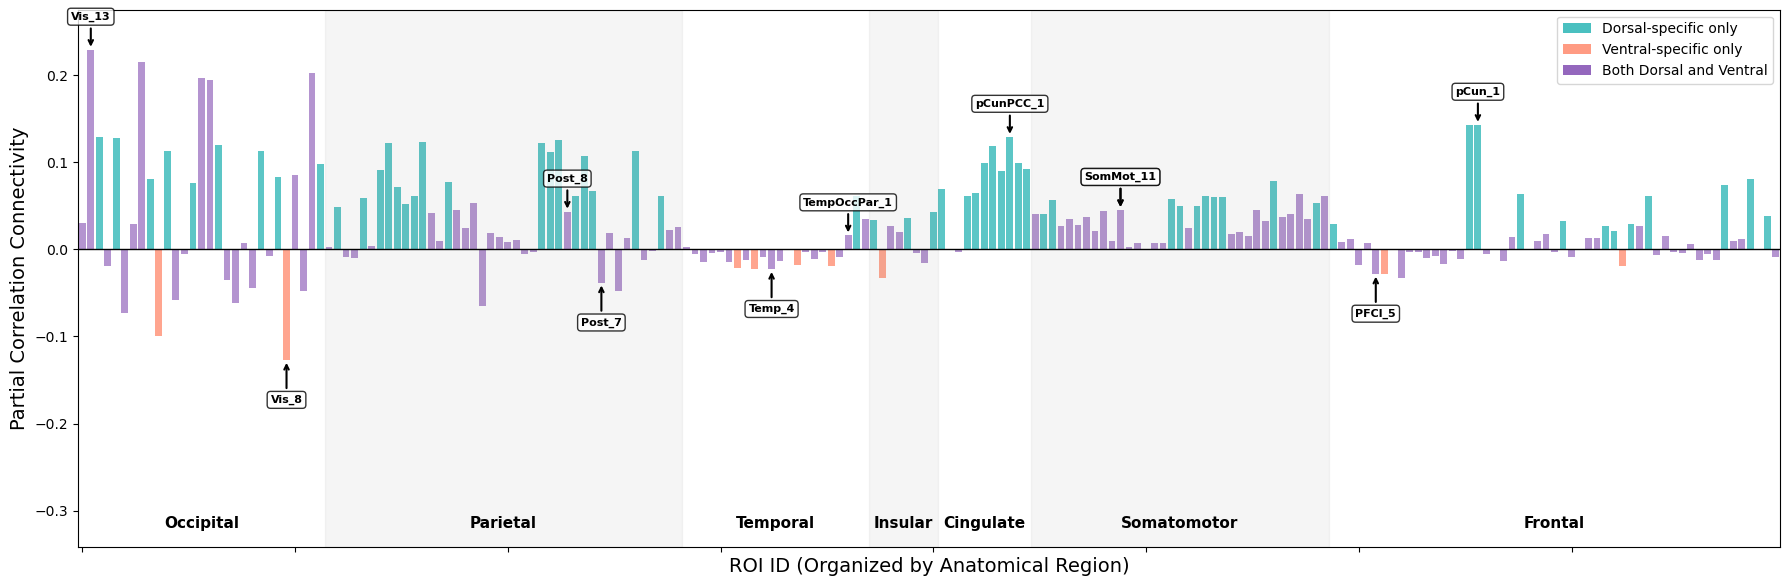


ROI Significance Breakdown:
  Dorsal-specific only: 61
  Ventral-specific only: 9
  Both networks significant: 126
  Non-significant: 4
  Total: 200

Visualization complete!


In [10]:
# Partial Correlation Pathway-Specific Connectivity Visualization (Bottom Panel Only)
# With alternating pale gray/white backgrounds instead of colored lobe backgrounds

import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import re
from matplotlib.patches import Patch

# Define paths
results_dir = '/user_data/csimmon2/git_repos/ptoc/results'
output_dir = f'{results_dir}/partial_correlation_magnitude'

# Load the CSV results from the magnitude analysis
csv_path = f'{output_dir}/bilateral_partial_correlation_separate_networks_results.csv'

if not os.path.exists(csv_path):
    print(f"Error: Results file not found at {csv_path}")
    print("Please run the connectivity magnitude analysis first.")
else:
    results_df = pd.read_csv(csv_path)
    print(f"Loaded partial correlation data with {len(results_df)} ROIs")
    
    # ============================================================================
    # Helper Functions
    # ============================================================================
    
    def map_to_anatomical_lobe(roi_name):
        """Map ROI names to anatomical lobes"""
        if isinstance(roi_name, bytes):
            roi_name = roi_name.decode('utf-8')
        
        if 'Wang_pIPS' in roi_name:
            return 'Parietal'
        elif 'Wang_LO' in roi_name:
            return 'Temporal'
        
        if 'Vis' in roi_name:
            return 'Occipital'
        elif 'SomMot' in roi_name:
            return 'Somatomotor'
        elif 'DorsAttn' in roi_name:
            if 'Par' in roi_name or 'IPL' in roi_name or 'IPS' in roi_name:
                return 'Parietal'
            elif 'Temp' in roi_name or 'MT' in roi_name:
                return 'Temporal'
            else:
                return 'Parietal'
        elif 'SalVentAttn' in roi_name:
            if 'Ins' in roi_name:
                return 'Insular'
            elif 'Cing' in roi_name or 'ACC' in roi_name:
                return 'Cingulate'
            elif 'Temp' in roi_name:
                return 'Temporal'
            elif 'Par' in roi_name:
                return 'Parietal'
            else:
                return 'Frontal'
        elif 'Limbic' in roi_name:
            if 'Temp' in roi_name:
                return 'Temporal'
            else:
                return 'Frontal'
        elif 'Cont' in roi_name:
            if 'Par' in roi_name or 'IPL' in roi_name or 'IPS' in roi_name:
                return 'Parietal'
            elif 'Temp' in roi_name or 'MT' in roi_name:
                return 'Temporal'
            elif 'Cing' in roi_name:
                return 'Cingulate'
            else:
                return 'Frontal'
        elif 'Default' in roi_name:
            if 'Par' in roi_name:
                return 'Parietal'
            elif 'Temp' in roi_name:
                return 'Temporal'
            elif 'PCC' in roi_name or 'Cing' in roi_name:
                return 'Cingulate'
            else:
                return 'Frontal'
        else:
            return 'Other'
    
    def clean_roi_name(roi_name):
        """Clean up ROI names for better labeling"""
        if isinstance(roi_name, bytes):
            roi_name = roi_name.decode('utf-8')
        
        if 'Wang_' in roi_name:
            return roi_name.replace('Wang_', '')
        
        cleaned = roi_name.replace('7Networks_', '')
        
        parts = cleaned.split('_')
        if len(parts) > 2:
            return parts[-2] + '_' + parts[-1]
        elif len(parts) > 1:
            return parts[-1]
        else:
            return cleaned
    
    def get_hemisphere_and_region(roi_name):
        """Determine hemisphere and base region for organizing pairs"""
        if isinstance(roi_name, bytes):
            roi_name = roi_name.decode('utf-8')
        
        if 'LH' in roi_name:
            hemisphere = 'L'
        elif 'RH' in roi_name:
            hemisphere = 'R'
        else:
            if 'Wang_pIPS' in roi_name or 'Wang_LO' in roi_name:
                hemisphere = 'X'
            else:
                hemisphere = 'X'
        
        cleaned = roi_name.replace('7Networks_', '')
        cleaned = cleaned.replace('LH_', '').replace('RH_', '')
        
        if 'Wang_' in cleaned:
            base_region = cleaned.replace('Wang_', '')
        else:
            base_region = re.sub(r'_\d+$', '', cleaned)
        
        return hemisphere, base_region
    
    # ============================================================================
    # Main Visualization
    # ============================================================================
    
    print("\nCreating pathway-specific connectivity visualization...")
    
    # Add anatomical lobe and hemisphere information
    results_df['Anatomical_Lobe'] = results_df['ROI_Name'].apply(map_to_anatomical_lobe)
    results_df['Clean_Name'] = results_df['ROI_Name'].apply(clean_roi_name)
    
    hemisphere_region = results_df['ROI_Name'].apply(get_hemisphere_and_region)
    results_df['Hemisphere'] = [h for h, r in hemisphere_region]
    results_df['Base_Region'] = [r for h, r in hemisphere_region]
    
    # Define lobe order - posterior to anterior
    lobe_order = [
        'Occipital',
        'Parietal',
        'Temporal',
        'Insular',
        'Cingulate',
        'Somatomotor',
        'Frontal',
        'Other'
    ]
    
    # Custom sorting function
    def custom_sort(row):
        lobe_idx = lobe_order.index(row['Anatomical_Lobe']) if row['Anatomical_Lobe'] in lobe_order else 999
        hemi_idx = 0 if row['Hemisphere'] == 'L' else 1 if row['Hemisphere'] == 'R' else 2
        return (lobe_idx, row['Base_Region'], hemi_idx)
    
    # Sort using the custom function
    results_df['sort_key'] = results_df.apply(custom_sort, axis=1)
    results_df_sorted = results_df.sort_values('sort_key')
    
    # Get the new order
    sorted_indices = results_df_sorted.index.values
    
    # Extract reordered data
    mean_pips_clean_sorted = results_df_sorted['pIPS_clean_Connectivity'].values
    mean_lo_clean_sorted = results_df_sorted['LO_clean_Connectivity'].values
    sig_pips_sorted = results_df_sorted['pIPS_Combined_Significant'].values
    sig_lo_sorted = results_df_sorted['LO_Combined_Significant'].values
    sig_both_sorted = results_df_sorted['Both_Networks_Significant'].values
    
    # Find sections for each lobe
    lobe_sections = []
    current_lobe = None
    start_idx = 0
    
    for i, idx in enumerate(sorted_indices):
        lobe = results_df_sorted.iloc[i]['Anatomical_Lobe']
        if lobe != current_lobe:
            if current_lobe is not None:
                lobe_sections.append((current_lobe, start_idx, i-1))
            current_lobe = lobe
            start_idx = i
    
    # Add the last section
    if current_lobe is not None:
        lobe_sections.append((current_lobe, start_idx, len(sorted_indices)-1))
    
    # Find strongest connections in each lobe for each network
    significant_roi_positions = []
    for lobe, start, end in lobe_sections:
        section_pips = mean_pips_clean_sorted[start:end+1]
        section_lo = mean_lo_clean_sorted[start:end+1]
        section_sig_pips = sig_pips_sorted[start:end+1]
        section_sig_lo = sig_lo_sorted[start:end+1]
        
        # Find strongest dorsal connection
        sig_pips_positions = np.where(section_sig_pips)[0]
        if len(sig_pips_positions) > 0:
            max_pips_idx = sig_pips_positions[np.argmax(section_pips[sig_pips_positions])]
            significant_roi_positions.append(('pips', start + max_pips_idx))
        
        # Find strongest ventral connection
        sig_lo_positions = np.where(section_sig_lo)[0]
        if len(sig_lo_positions) > 0:
            max_lo_idx = sig_lo_positions[np.argmax(section_lo[sig_lo_positions])]
            significant_roi_positions.append(('lo', start + max_lo_idx))
    
    # Create the visualization - bottom panel only
    plt.figure(figsize=(18, 6))
    
    # Create bar heights and colors based on significance patterns
    bar_heights = np.zeros(len(sorted_indices))
    bar_colors = []
    
    for i in range(len(sorted_indices)):
        if sig_both_sorted[i]:
            # Both networks significant → show difference, color purple
            bar_heights[i] = mean_pips_clean_sorted[i] - mean_lo_clean_sorted[i]
            bar_colors.append('#9467bd')  # Purple for overlap
        elif sig_pips_sorted[i]:
            # Only dorsal significant → show dorsal strength as positive
            bar_heights[i] = mean_pips_clean_sorted[i]
            bar_colors.append('#4ac0c0')  # Teal for dorsal-only
        elif sig_lo_sorted[i]:
            # Only ventral significant → show ventral strength as negative
            bar_heights[i] = -mean_lo_clean_sorted[i]
            bar_colors.append('#ff9b83')  # Peach for ventral-only
        else:
            # Non-significant
            bar_heights[i] = 0
            bar_colors.append('lightgray')
    
    x = np.arange(len(bar_heights))
    
    # Create bars with slight transparency
    bars = plt.bar(x, bar_heights, color=bar_colors)
    
    # Apply different transparency levels
    for i, bar in enumerate(bars):
        if bar_colors[i] == '#9467bd':  # Purple
            bar.set_alpha(0.7)
        elif bar_colors[i] in ['#4ac0c0', '#ff9b83']:  # Teal or Peach
            bar.set_alpha(0.9)
        else:  # lightgray
            bar.set_alpha(0.7)
    
    # Add alternating pale gray backgrounds for each lobe section
    for idx, (lobe, start, end) in enumerate(lobe_sections):
        if idx % 2 == 0:
            # White background (no action needed as it's default)
            pass
        else:
            # Very pale gray background
            plt.axvspan(start - 0.5, end + 0.5, alpha=0.08, color='gray')
    
    plt.axhline(y=0, color='black', linestyle='-', linewidth=1)
    
    # Create legend
    legend_elements = [
        Patch(facecolor='#4ac0c0', label='Dorsal-specific only'),
        Patch(facecolor='#ff9b83', label='Ventral-specific only'),
        Patch(facecolor='#9467bd', label='Both Dorsal and Ventral')
    ]
    plt.legend(handles=legend_elements, loc='upper right')
    
    # Remove x-axis tick labels
    plt.tick_params(axis='x', which='both', bottom=True, top=False, labelbottom=False)
    
    # Label strongest significant ROIs in each lobe (except Insular)
    for network_type, position in significant_roi_positions:
        orig_idx = sorted_indices[position]
        roi_name = results_df.loc[orig_idx, 'Clean_Name']
        roi_lobe = results_df.loc[orig_idx, 'Anatomical_Lobe']
        bar_height = bar_heights[position]
        
        # Only label if has meaningful height and not in Insular lobe
        if abs(bar_height) > 0.01 and roi_lobe != 'Insular':
            plt.annotate(f'{roi_name}',
                        xy=(position, bar_height),
                        xytext=(0, 20 if bar_height >= 0 else -25),
                        textcoords='offset points',
                        ha='center',
                        va='bottom' if bar_height >= 0 else 'top',
                        fontsize=8,
                        fontweight='bold',
                        bbox=dict(boxstyle='round,pad=0.3', fc='white', alpha=0.8),
                        arrowprops=dict(arrowstyle='->', lw=1.5))
    
    plt.ylabel('Partial Correlation Connectivity', fontsize=14)
    plt.xlabel('ROI ID (Organized by Anatomical Region)', fontsize=14)
    plt.xlim(-0.5, len(bar_heights) - 0.5)
    
    # Set y-axis limits based on data range
    y_max = max(abs(np.min(bar_heights)), abs(np.max(bar_heights)))
    plt.ylim(-y_max * 1.2, y_max * 1.2)
    
    # Get current y-limits for proper label positioning
    current_ylim = plt.ylim()
    y_range_bottom = current_ylim[1] - current_ylim[0]
    
    # Add lobe labels at the bottom
    for lobe, start, end in lobe_sections:
        label_y = current_ylim[0] - 0.08 * y_range_bottom
        plt.text((start + end) / 2, label_y, lobe, ha='center', fontsize=11, fontweight='bold')
    
    # Adjust y-limits to accommodate labels
    plt.ylim(current_ylim[0] - 0.12 * y_range_bottom, current_ylim[1])
    
    plt.tight_layout()
    plt.show()
    
    # Print summary statistics
    print(f"\nROI Significance Breakdown:")
    print(f"  Dorsal-specific only: {np.sum(sig_pips_sorted & ~sig_lo_sorted)}")
    print(f"  Ventral-specific only: {np.sum(sig_lo_sorted & ~sig_pips_sorted)}")
    print(f"  Both networks significant: {np.sum(sig_both_sorted)}")
    print(f"  Non-significant: {np.sum(~sig_pips_sorted & ~sig_lo_sorted)}")
    print(f"  Total: {len(sorted_indices)}")
    
    print("\nVisualization complete!")

Loaded partial correlation data with 200 ROIs

Creating pathway-specific connectivity visualization...

Applying correction: Setting all negative correlation values to 0.


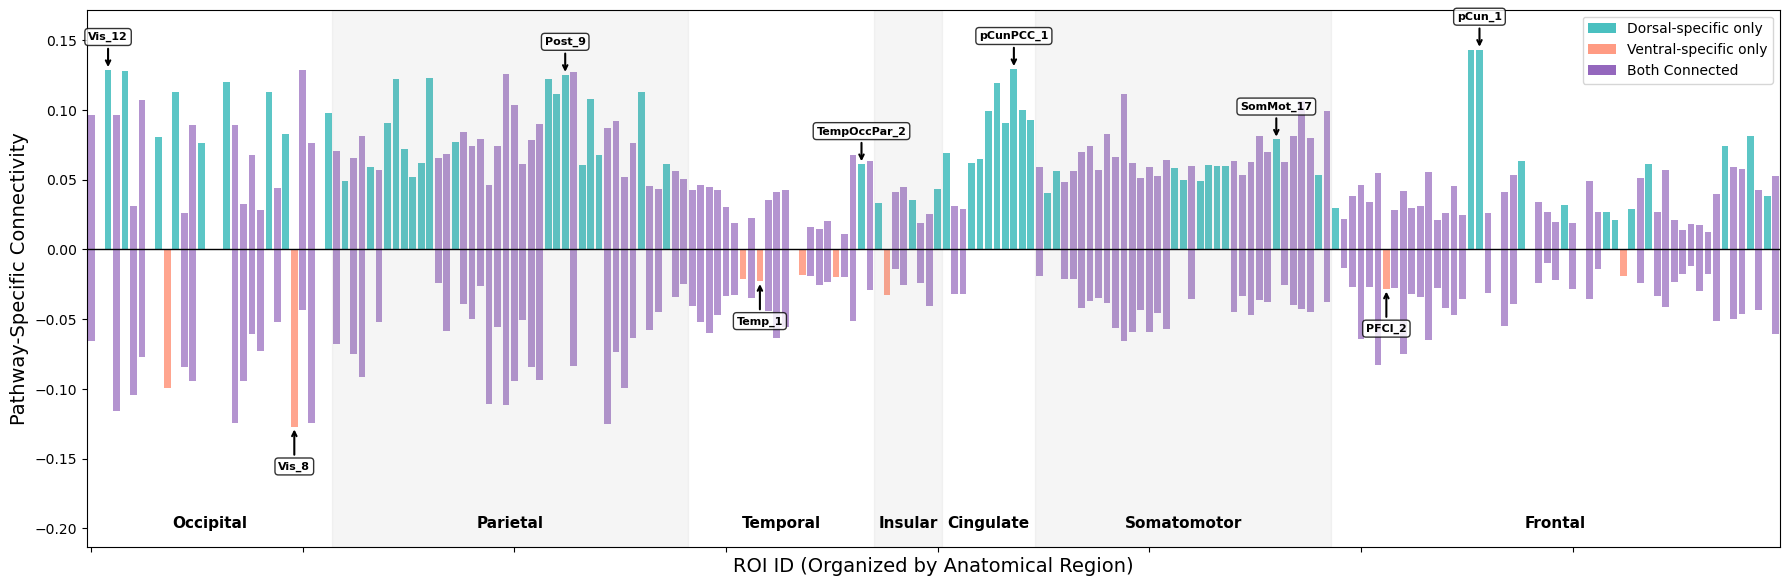


ROI Significance Breakdown:
  Dorsal-specific only: 61
  Ventral-specific only: 9
  Both networks (non-sig difference): 121
  Total significant ROIs: 191

Visualization complete!


In [14]:
# Partial Correlation Pathway-Specific Connectivity Visualization (Bottom Panel Only)
# With alternating pale gray/white backgrounds and bidirectional purple bars

import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import re
from matplotlib.patches import Patch

# Define paths
results_dir = '/user_data/csimmon2/git_repos/ptoc/results'
output_dir = f'{results_dir}/partial_correlation_magnitude'

# Load the CSV results from the magnitude analysis
csv_path = f'{output_dir}/bilateral_partial_correlation_separate_networks_results.csv'

if not os.path.exists(csv_path):
    print(f"Error: Results file not found at {csv_path}")
    print("Please run the connectivity magnitude analysis first.")
else:
    results_df = pd.read_csv(csv_path)
    print(f"Loaded partial correlation data with {len(results_df)} ROIs")
    
    # ============================================================================
    # Helper Functions
    # ============================================================================
    
    def map_to_anatomical_lobe(roi_name):
        """Map ROI names to anatomical lobes"""
        if isinstance(roi_name, bytes):
            roi_name = roi_name.decode('utf-8')
        
        if 'Wang_pIPS' in roi_name:
            return 'Parietal'
        elif 'Wang_LO' in roi_name:
            return 'Temporal'
        
        if 'Vis' in roi_name:
            return 'Occipital'
        elif 'SomMot' in roi_name:
            return 'Somatomotor'
        elif 'DorsAttn' in roi_name:
            if 'Par' in roi_name or 'IPL' in roi_name or 'IPS' in roi_name:
                return 'Parietal'
            elif 'Temp' in roi_name or 'MT' in roi_name:
                return 'Temporal'
            else:
                return 'Parietal'
        elif 'SalVentAttn' in roi_name:
            if 'Ins' in roi_name:
                return 'Insular'
            elif 'Cing' in roi_name or 'ACC' in roi_name:
                return 'Cingulate'
            elif 'Temp' in roi_name:
                return 'Temporal'
            elif 'Par' in roi_name:
                return 'Parietal'
            else:
                return 'Frontal'
        elif 'Limbic' in roi_name:
            if 'Temp' in roi_name:
                return 'Temporal'
            else:
                return 'Frontal'
        elif 'Cont' in roi_name:
            if 'Par' in roi_name or 'IPL' in roi_name or 'IPS' in roi_name:
                return 'Parietal'
            elif 'Temp' in roi_name or 'MT' in roi_name:
                return 'Temporal'
            elif 'Cing' in roi_name:
                return 'Cingulate'
            else:
                return 'Frontal'
        elif 'Default' in roi_name:
            if 'Par' in roi_name:
                return 'Parietal'
            elif 'Temp' in roi_name:
                return 'Temporal'
            elif 'PCC' in roi_name or 'Cing' in roi_name:
                return 'Cingulate'
            else:
                return 'Frontal'
        else:
            return 'Other'
    
    def clean_roi_name(roi_name):
        """Clean up ROI names for better labeling"""
        if isinstance(roi_name, bytes):
            roi_name = roi_name.decode('utf-8')
        
        if 'Wang_' in roi_name:
            return roi_name.replace('Wang_', '')
        
        cleaned = roi_name.replace('7Networks_', '')
        
        parts = cleaned.split('_')
        if len(parts) > 2:
            return parts[-2] + '_' + parts[-1]
        elif len(parts) > 1:
            return parts[-1]
        else:
            return cleaned
    
    def get_hemisphere_and_region(roi_name):
        """Determine hemisphere and base region for organizing pairs"""
        if isinstance(roi_name, bytes):
            roi_name = roi_name.decode('utf-8')
        
        if 'LH' in roi_name:
            hemisphere = 'L'
        elif 'RH' in roi_name:
            hemisphere = 'R'
        else:
            if 'Wang_pIPS' in roi_name or 'Wang_LO' in roi_name:
                hemisphere = 'X'
            else:
                hemisphere = 'X'
        
        cleaned = roi_name.replace('7Networks_', '')
        cleaned = cleaned.replace('LH_', '').replace('RH_', '')
        
        if 'Wang_' in cleaned:
            base_region = cleaned.replace('Wang_', '')
        else:
            base_region = re.sub(r'_\d+$', '', cleaned)
        
        return hemisphere, base_region
    
    # ============================================================================
    # Main Visualization
    # ============================================================================
    
    print("\nCreating pathway-specific connectivity visualization...")
    
    # Add anatomical lobe and hemisphere information
    results_df['Anatomical_Lobe'] = results_df['ROI_Name'].apply(map_to_anatomical_lobe)
    results_df['Clean_Name'] = results_df['ROI_Name'].apply(clean_roi_name)
    
    hemisphere_region = results_df['ROI_Name'].apply(get_hemisphere_and_region)
    results_df['Hemisphere'] = [h for h, r in hemisphere_region]
    results_df['Base_Region'] = [r for h, r in hemisphere_region]
    
    # Define lobe order - posterior to anterior
    lobe_order = [
        'Occipital',
        'Parietal',
        'Temporal',
        'Insular',
        'Cingulate',
        'Somatomotor',
        'Frontal',
        'Other'
    ]
    
    # Custom sorting function
    def custom_sort(row):
        lobe_idx = lobe_order.index(row['Anatomical_Lobe']) if row['Anatomical_Lobe'] in lobe_order else 999
        hemi_idx = 0 if row['Hemisphere'] == 'L' else 1 if row['Hemisphere'] == 'R' else 2
        return (lobe_idx, row['Base_Region'], hemi_idx)
    
    # Sort using the custom function
    results_df['sort_key'] = results_df.apply(custom_sort, axis=1)
    results_df_sorted = results_df.sort_values('sort_key')
    
    # Get the new order
    sorted_indices = results_df_sorted.index.values
    
    # Corrected code
    # Extract the raw connectivity values from the sorted DataFrame
    pips_connectivity = results_df_sorted['pIPS_clean_Connectivity'].values
    lo_connectivity = results_df_sorted['LO_clean_Connectivity'].values

    # --- CORRECTION APPLIED HERE ---
    # According to the lab's methodology, treat negative correlations as meaningless by setting them to zero.
    print("\nApplying correction: Setting all negative correlation values to 0.")
    mean_pips_clean_sorted = np.maximum(0, pips_connectivity)
    mean_lo_clean_sorted = np.maximum(0, lo_connectivity)
    
    # Extract reordered data
    #mean_pips_clean_sorted = results_df_sorted['pIPS_clean_Connectivity'].values
    #mean_lo_clean_sorted = results_df_sorted['LO_clean_Connectivity'].values
    sig_pips_sorted = results_df_sorted['pIPS_Combined_Significant'].values
    sig_lo_sorted = results_df_sorted['LO_Combined_Significant'].values
    sig_both_sorted = results_df_sorted['Both_Networks_Significant'].values
    
    # Categorize ROIs based on which networks are significant
    sig_dorsal_only = sig_pips_sorted & ~sig_lo_sorted
    sig_ventral_only = sig_lo_sorted & ~sig_pips_sorted
    sig_both = sig_both_sorted  # Both networks significant
    
    # Find sections for each lobe
    lobe_sections = []
    current_lobe = None
    start_idx = 0
    
    for i, idx in enumerate(sorted_indices):
        lobe = results_df_sorted.iloc[i]['Anatomical_Lobe']
        if lobe != current_lobe:
            if current_lobe is not None:
                lobe_sections.append((current_lobe, start_idx, i-1))
            current_lobe = lobe
            start_idx = i
    
    # Add the last section
    if current_lobe is not None:
        lobe_sections.append((current_lobe, start_idx, len(sorted_indices)-1))
    
    # Find strongest connections in each lobe for each category
    significant_roi_positions = []
    for lobe, start, end in lobe_sections:
        section_pips = mean_pips_clean_sorted[start:end+1]
        section_lo = mean_lo_clean_sorted[start:end+1]
        section_sig_dorsal = sig_dorsal_only[start:end+1]
        section_sig_ventral = sig_ventral_only[start:end+1]
        
        # Find strongest dorsal-specific connection
        dorsal_positions = np.where(section_sig_dorsal)[0]
        if len(dorsal_positions) > 0:
            max_dorsal_idx = dorsal_positions[np.argmax(section_pips[dorsal_positions])]
            significant_roi_positions.append(('dorsal', start + max_dorsal_idx))
        
        # Find strongest ventral-specific connection
        ventral_positions = np.where(section_sig_ventral)[0]
        if len(ventral_positions) > 0:
            max_ventral_idx = ventral_positions[np.argmax(section_lo[ventral_positions])]
            significant_roi_positions.append(('ventral', start + max_ventral_idx))
    
    # Create the visualization - bottom panel only
    plt.figure(figsize=(18, 6))
    
    # Create bar data with bidirectional purple bars
    x_positions = []
    bar_heights_list = []
    bar_colors_list = []
    bar_widths_list = []
    
    for i in range(len(sorted_indices)):
        if sig_both[i]:
            # Both networks significant → plot both as purple bars
            # Dorsal (positive)
            x_positions.append(i)
            bar_heights_list.append(mean_pips_clean_sorted[i])
            bar_colors_list.append('#9467bd')
            bar_widths_list.append(0.8)
            # Ventral (negative)
            x_positions.append(i)
            bar_heights_list.append(-mean_lo_clean_sorted[i])
            bar_colors_list.append('#9467bd')
            bar_widths_list.append(0.8)
        elif sig_dorsal_only[i]:
            # Dorsal-specific (dorsal > ventral significantly)
            x_positions.append(i)
            bar_heights_list.append(mean_pips_clean_sorted[i])
            bar_colors_list.append('#4ac0c0')
            bar_widths_list.append(0.8)
        elif sig_ventral_only[i]:
            # Ventral-specific (ventral > dorsal significantly)
            x_positions.append(i)
            bar_heights_list.append(-mean_lo_clean_sorted[i])
            bar_colors_list.append('#ff9b83')
            bar_widths_list.append(0.8)
    
    # Create bars with specified widths
    bars = plt.bar(x_positions, bar_heights_list, width=bar_widths_list, color=bar_colors_list)
    
    # Apply different transparency levels
    for i, bar in enumerate(bars):
        if bar_colors_list[i] == '#9467bd':  # Purple
            bar.set_alpha(.7)  # Fully opaque to avoid overlap artifacts
        elif bar_colors_list[i] in ['#4ac0c0', '#ff9b83']:  # Teal or Peach
            bar.set_alpha(0.9)
    
    # Add alternating pale gray backgrounds for each lobe section
    for idx, (lobe, start, end) in enumerate(lobe_sections):
        if idx % 2 == 0:
            # White background (no action needed as it's default)
            pass
        else:
            # Very pale gray background
            plt.axvspan(start - 0.5, end + 0.5, alpha=0.08, color='gray')
    
    plt.axhline(y=0, color='black', linestyle='-', linewidth=1)
    
    # Create legend
    legend_elements = [
        Patch(facecolor='#4ac0c0', label='Dorsal-specific only'),
        Patch(facecolor='#ff9b83', label='Ventral-specific only'),
        Patch(facecolor='#9467bd', label='Both Connected')
    ]
    plt.legend(handles=legend_elements, loc='upper right')
    
    # Remove x-axis tick labels
    plt.tick_params(axis='x', which='both', bottom=True, top=False, labelbottom=False)
    
    # Label strongest significant ROIs in each lobe (except Insular)
    for network_type, position in significant_roi_positions:
        orig_idx = sorted_indices[position]
        roi_name = results_df.loc[orig_idx, 'Clean_Name']
        roi_lobe = results_df.loc[orig_idx, 'Anatomical_Lobe']
        
        # Determine bar height based on category
        if sig_both[position]:
            # For both networks, label the dorsal (positive) bar
            bar_height = mean_pips_clean_sorted[position]
        elif sig_dorsal_only[position]:
            bar_height = mean_pips_clean_sorted[position]
        elif sig_ventral_only[position]:
            bar_height = -mean_lo_clean_sorted[position]
        else:
            bar_height = 0
        
        # Only label if has meaningful height and not in Insular lobe
        if abs(bar_height) > 0.01 and roi_lobe != 'Insular':
            plt.annotate(f'{roi_name}',
                        xy=(position, bar_height),
                        xytext=(0, 20 if bar_height >= 0 else -25),
                        textcoords='offset points',
                        ha='center',
                        va='bottom' if bar_height >= 0 else 'top',
                        fontsize=8,
                        fontweight='bold',
                        bbox=dict(boxstyle='round,pad=0.3', fc='white', alpha=0.8),
                        arrowprops=dict(arrowstyle='->', lw=1.5))
    
    plt.ylabel('Pathway-Specific Connectivity', fontsize=14)
    plt.xlabel('ROI ID (Organized by Anatomical Region)', fontsize=14)
    plt.xlim(-0.5, len(mean_pips_clean_sorted) - 0.5)
    
    # Set y-axis limits based on data range
    y_max = max(abs(min(bar_heights_list)), abs(max(bar_heights_list)))
    plt.ylim(-y_max * 1.2, y_max * 1.2)
    
    # Get current y-limits for proper label positioning
    current_ylim = plt.ylim()
    y_range_bottom = current_ylim[1] - current_ylim[0]
    
    # Add lobe labels at the bottom
    for lobe, start, end in lobe_sections:
        label_y = current_ylim[0] - 0.08 * y_range_bottom
        plt.text((start + end) / 2, label_y, lobe, ha='center', fontsize=11, fontweight='bold')
    
    # Adjust y-limits to accommodate labels
    plt.ylim(current_ylim[0] - 0.12 * y_range_bottom, current_ylim[1])
    
    plt.tight_layout()
    plt.show()
    
    # Print summary statistics
    print(f"\nROI Significance Breakdown:")
    print(f"  Dorsal-specific only: {np.sum(sig_dorsal_only)}")
    print(f"  Ventral-specific only: {np.sum(sig_ventral_only)}")
    print(f"  Both networks (non-sig difference): {np.sum(sig_both)}")
    print(f"  Total significant ROIs: {np.sum(sig_dorsal_only | sig_ventral_only | sig_both)}")
    
    print("\nVisualization complete!")

PARTIAL CORRELATION VISUALIZATION - FISHER Z
Loaded results for 200 ROIs

Significance Breakdown:
  Dorsal-specific only: 61
  Ventral-specific only: 9
  Both networks significant: 121
  Non-significant: 4

DIAGNOSTIC - Negative values in raw data:
  Dorsal negative: 0
  Ventral negative: 17

Setting all negative values to zero
  Dorsal values changed: 0
  Ventral values changed: 17

Significance after excluding negative values:
  Dorsal significant (positive): 187
  Ventral significant (positive): 130

Recategorized significance:
  Dorsal-specific only: 66
  Ventral-specific only: 9
  Both networks significant: 121
  Non-significant: 4

Filtering to 196 ROIs with significant positive correlations

Partial correlation statistics (significant ROIs only):
  Dorsal: mean=0.062, std=0.034
  Ventral: mean=0.037, std=0.029

Sorted 196 significant ROIs by connectivity strength
  Strongest ROI: 7Networks_LH_Vis_13 (r=0.154)



✓ Saved: /user_data/csimmon2/git_repos/ptoc/results/partial_correlation_magnitude/bootstrap_significance_partial_corr_visualization.png


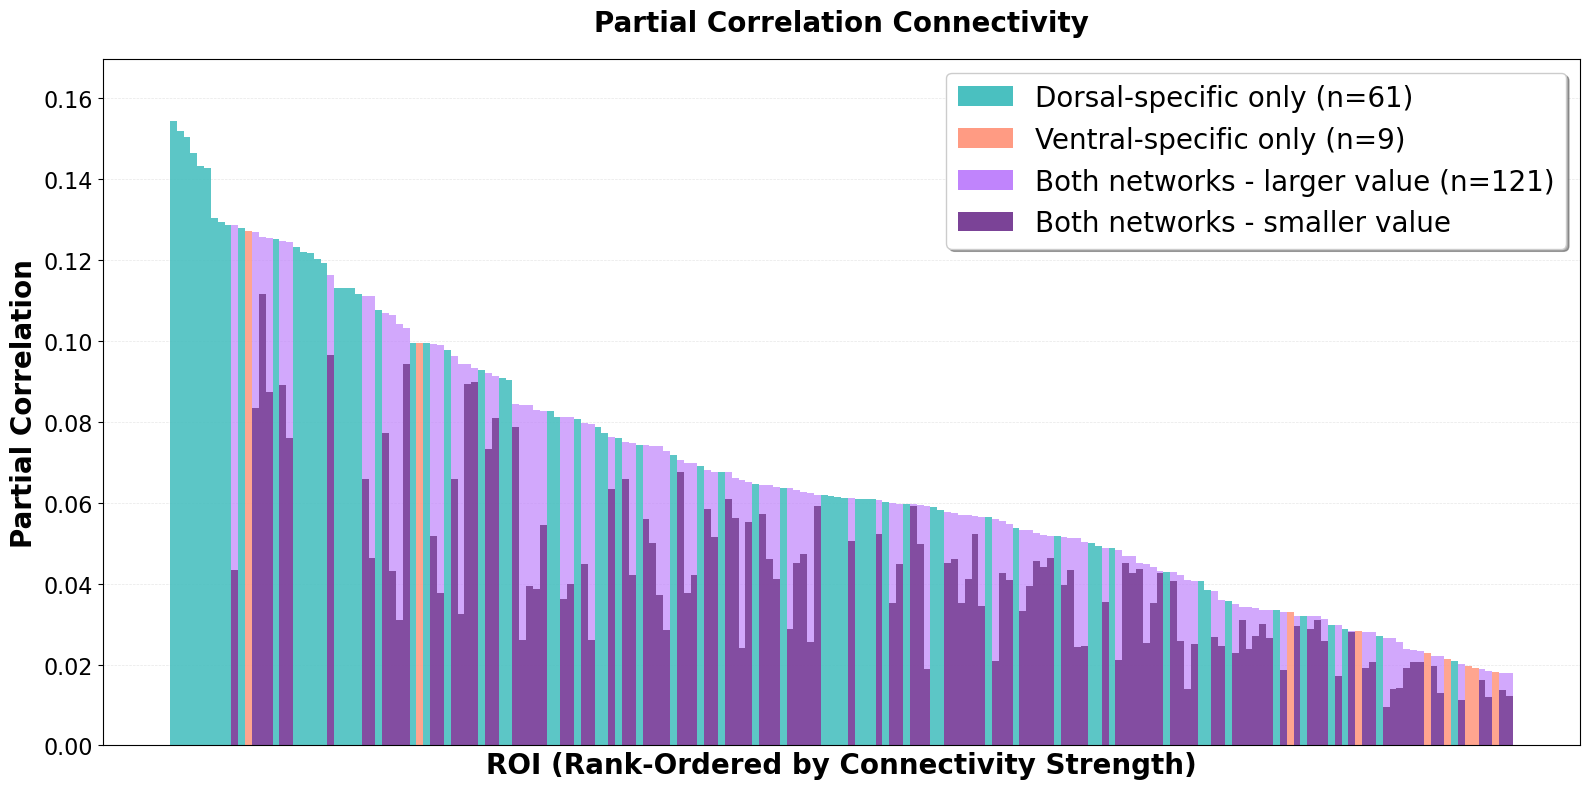


Visualization complete!


In [4]:
#!/usr/bin/env python3
"""
Partial Correlation Visualization - Fisher Z Version
Uses results from the original separate networks analysis
"""

import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.patches import Rectangle

# Define paths
results_dir = '/user_data/csimmon2/git_repos/ptoc/results'
output_dir = f'{results_dir}/partial_correlation_magnitude'

# Load the CSV results from the original separate networks analysis
#csv_path = f'{output_dir}/bilateral_partial_correlation_separate_networks_results.csv'
csv_path = f'{output_dir}/bilateral_partial_correlation_WITH_FDR.csv'

if not os.path.exists(csv_path):
    print(f"Error: Results file not found at {csv_path}")
    print("Please run the separate networks analysis first.")
    exit(1)

print("="*80)
print("PARTIAL CORRELATION VISUALIZATION - FISHER Z")
print("="*80)

# Load results
results_df = pd.read_csv(csv_path)
print(f"Loaded results for {len(results_df)} ROIs")

# Extract connectivity values and significance
pips_connectivity = results_df['pIPS_clean_Connectivity'].values
lo_connectivity = results_df['LO_clean_Connectivity'].values
sig_pips = results_df['pIPS_Combined_Significant'].values
sig_lo = results_df['LO_Combined_Significant'].values
sig_both = results_df['Both_Networks_Significant'].values

# Calculate significance categories
sig_dorsal_only = sig_pips & ~sig_lo
sig_ventral_only = sig_lo & ~sig_pips

# Print summary
print("\nSignificance Breakdown:")
print(f"  Dorsal-specific only: {np.sum(sig_dorsal_only)}")
print(f"  Ventral-specific only: {np.sum(sig_ventral_only)}")
print(f"  Both networks significant: {np.sum(sig_both)}")
print(f"  Non-significant: {np.sum(~sig_pips & ~sig_lo)}")

# DIAGNOSTIC: Check for negative values
n_negative_pips = np.sum(pips_connectivity < 0)
n_negative_lo = np.sum(lo_connectivity < 0)
print(f"\nDIAGNOSTIC - Negative values in raw data:")
print(f"  Dorsal negative: {n_negative_pips}")
print(f"  Ventral negative: {n_negative_lo}")

# Set negative values to zero (exclude negative correlations)
pips_connectivity_clean = np.maximum(pips_connectivity, 0)
lo_connectivity_clean = np.maximum(lo_connectivity, 0)

print(f"\nSetting all negative values to zero")
print(f"  Dorsal values changed: {np.sum(pips_connectivity != pips_connectivity_clean)}")
print(f"  Ventral values changed: {np.sum(lo_connectivity != lo_connectivity_clean)}")

# Recalculate significance categories based on cleaned values
# An ROI is only significant if it's marked significant AND has positive value
sig_pips_clean = sig_pips & (pips_connectivity_clean > 0)
sig_lo_clean = sig_lo & (lo_connectivity_clean > 0)

print(f"\nSignificance after excluding negative values:")
print(f"  Dorsal significant (positive): {np.sum(sig_pips_clean)}")
print(f"  Ventral significant (positive): {np.sum(sig_lo_clean)}")

# Recalculate categories
sig_dorsal_only_clean = sig_pips_clean & ~sig_lo_clean
sig_ventral_only_clean = sig_lo_clean & ~sig_pips_clean
sig_both_clean = sig_pips_clean & sig_lo_clean

print(f"\nRecategorized significance:")
print(f"  Dorsal-specific only: {np.sum(sig_dorsal_only_clean)}")
print(f"  Ventral-specific only: {np.sum(sig_ventral_only_clean)}")
print(f"  Both networks significant: {np.sum(sig_both_clean)}")
print(f"  Non-significant: {np.sum(~sig_pips_clean & ~sig_lo_clean)}")

# Filter to significant ROIs (at least one network with positive correlation)
sig_any_clean = sig_pips_clean | sig_lo_clean
n_sig = np.sum(sig_any_clean)
print(f"\nFiltering to {n_sig} ROIs with significant positive correlations")

# Filter data to significant ROIs with positive correlations only
pips_connectivity_sig = pips_connectivity_clean[sig_any_clean]
lo_connectivity_sig = lo_connectivity_clean[sig_any_clean]
sig_dorsal_only_sig = sig_dorsal_only_clean[sig_any_clean]
sig_ventral_only_sig = sig_ventral_only_clean[sig_any_clean]
sig_both_sig = sig_both_clean[sig_any_clean]
roi_names_sig = results_df['ROI_Name'].values[sig_any_clean]

# Use raw partial correlation values (Fisher z-transformed) from significant ROIs only
print(f"\nPartial correlation statistics (significant ROIs only):")
print(f"  Dorsal: mean={np.mean(pips_connectivity_sig):.3f}, std={np.std(pips_connectivity_sig):.3f}")
print(f"  Ventral: mean={np.mean(lo_connectivity_sig):.3f}, std={np.std(lo_connectivity_sig):.3f}")

# Create sorting index based on maximum absolute partial correlation
max_abs_parcor = np.maximum(np.abs(pips_connectivity_sig), np.abs(lo_connectivity_sig))
sort_idx = np.argsort(max_abs_parcor)[::-1]  # Descending order

# Apply sorting
pips_sorted = pips_connectivity_sig[sort_idx]
lo_sorted = lo_connectivity_sig[sort_idx]
sig_dorsal_only_sorted = sig_dorsal_only_sig[sort_idx]
sig_ventral_only_sorted = sig_ventral_only_sig[sort_idx]
sig_both_sorted = sig_both_sig[sort_idx]
roi_names_sorted = roi_names_sig[sort_idx]

print(f"\nSorted {n_sig} significant ROIs by connectivity strength")
print(f"  Strongest ROI: {roi_names_sorted[0]} (r={max_abs_parcor[sort_idx[0]]:.3f})")

# Create visualization
fig, ax = plt.subplots(figsize=(16, 8))

x = np.arange(len(pips_sorted))
bar_width = 1.0  # Bars touch with no gaps

# Categorize each ROI and create bars
for i in range(len(x)):
    if sig_both_sorted[i]:
        # Both significant - create layered bars (both positive, both going up)
        # Determine which is larger
        pips_abs = np.abs(pips_sorted[i])
        lo_abs = np.abs(lo_sorted[i])
        
        if pips_abs > lo_abs:
            # Dorsal larger - plot dorsal as background, ventral as foreground
            ax.bar(x[i], pips_abs, bar_width, 
                   color='#c084fc', alpha=0.7, edgecolor='none')  # Light purple
            ax.bar(x[i], lo_abs, bar_width, 
                   color='#7b4397', alpha=0.9, edgecolor='none')  # Dark purple - FULL WIDTH
        else:
            # Ventral larger - plot ventral as background, dorsal as foreground
            ax.bar(x[i], lo_abs, bar_width, 
                   color='#c084fc', alpha=0.7, edgecolor='none')  # Light purple
            ax.bar(x[i], pips_abs, bar_width, 
                   color='#7b4397', alpha=0.9, edgecolor='none')  # Dark purple - FULL WIDTH
            
    elif sig_dorsal_only_sorted[i]:
        # Dorsal-specific only
        ax.bar(x[i], np.abs(pips_sorted[i]), bar_width, 
               color='#4ac0c0', alpha=0.9, edgecolor='none')  # Teal
        
    elif sig_ventral_only_sorted[i]:
        # Ventral-specific only
        ax.bar(x[i], np.abs(lo_sorted[i]), bar_width, 
               color='#ff9b83', alpha=0.9, edgecolor='none')  # Coral/peach
    
    else:
        # This shouldn't happen, but plot as gray if it does
        max_val = max(np.abs(pips_sorted[i]), np.abs(lo_sorted[i]))
        ax.bar(x[i], max_val, bar_width, 
               color='lightgray', alpha=0.5, edgecolor='none')
        print(f"WARNING: ROI {i} ({roi_names_sorted[i]}) doesn't match any category!")

# Labels and formatting
ax.set_xlabel('ROI (Rank-Ordered by Connectivity Strength)', fontsize=20, fontweight='bold')
ax.set_ylabel('Partial Correlation', fontsize=20, fontweight='bold')
ax.set_title('Partial Correlation Connectivity', 
             fontsize=20, fontweight='bold', pad=20)

# Remove x-axis ticks
ax.set_xticks([])

# Create custom legend
from matplotlib.patches import Patch
legend_elements = [
    Patch(facecolor='#4ac0c0', label=f'Dorsal-specific only (n={np.sum(sig_dorsal_only)})'),
    Patch(facecolor='#ff9b83', label=f'Ventral-specific only (n={np.sum(sig_ventral_only)})'),
    Patch(facecolor='#c084fc', label=f'Both networks - larger value (n={np.sum(sig_both)})'),
    Patch(facecolor='#7b4397', label='Both networks - smaller value')
]
ax.legend(handles=legend_elements, loc='upper right', frameon=True, 
          fancybox=True, shadow=True, fontsize=20)

# Set y-axis limits with some padding (start at 0 since all values are positive)
y_max = max(np.abs(pips_sorted).max(), np.abs(lo_sorted).max())
ax.set_ylim(0, y_max * 1.1)

# Grid for readability
ax.grid(axis='y', alpha=0.3, linestyle='--', linewidth=0.5)
ax.set_axisbelow(True)
ax.tick_params(axis='y', labelsize=16)

plt.tight_layout()

# Save figure
output_file = f'{output_dir}/bootstrap_significance_partial_corr_visualization.png'
plt.savefig(output_file, dpi=300, bbox_inches='tight')
print(f"\n✓ Saved: {output_file}")

plt.show()

print("\nVisualization complete!")

In [1]:
#!/usr/bin/env python3
"""
Partial Correlation Connectivity Magnitude Analysis - WITH FDR CORRECTION
Tests each network separately against zero with proper multiple comparison correction
"""

import os
import numpy as np
import pandas as pd
import nibabel as nib
from nilearn.maskers import NiftiLabelsMasker
from sklearn.utils import resample
from statsmodels.stats.multitest import multipletests

# Define study paths
study_dir = "/lab_data/behrmannlab/vlad/ptoc"
residual_dir = "/user_data/csimmon2/ptoc_residuals"
sub_info_path = '/user_data/csimmon2/git_repos/ptoc/sub_info.csv'
results_dir = '/user_data/csimmon2/git_repos/ptoc/results'
output_dir = f'{results_dir}/partial_correlation_magnitude'
os.makedirs(output_dir, exist_ok=True)

print(f"\n{'='*80}")
print(f"PARTIAL CORRELATION ANALYSIS - WITH FDR CORRECTION")
print(f"{'='*80}")

# Load merged atlas
merged_atlas_file = f'{results_dir}/schaefer_wang_merged.nii.gz'
merged_labels_file = f'{results_dir}/merged_atlas_labels.npy'

if not os.path.exists(merged_atlas_file) or not os.path.exists(merged_labels_file):
    print("Error: Merged atlas files not found.")
    exit(1)

atlas_img = nib.load(merged_atlas_file)
atlas_labels = np.load(merged_labels_file, allow_pickle=True)

print(f"Loaded merged atlas with {len(atlas_labels)} parcels")

# Load subject info
sub_info = pd.read_csv(sub_info_path)
subjects = sub_info[sub_info['group'] == 'control']['sub'].tolist()

if 'sub-084' in subjects:
    subjects.remove('sub-084')
    print("Excluded sub-084 from analysis")
    
print(f"Found {len(subjects)} control subjects")

# Define ROIs and hemispheres
rois = ['pIPS_clean', 'LO_clean']
hemispheres = ['left', 'right']

# Setup atlas masker
masker = NiftiLabelsMasker(labels_img=atlas_img, standardize=False)

# Load and process subject data
subject_data = []
for sub in subjects:
    sub_conn = {}
    
    for roi in rois:
        combined_data = None
        hemi_count = 0
        
        for hemisphere in hemispheres:
            fc_file = f'{residual_dir}/{sub}/ses-01/derivatives/fc_mni/{sub}_{roi}_{hemisphere}_loc_fc_mni.nii.gz'
            
            if os.path.exists(fc_file):
                try:
                    fc_img = nib.load(fc_file)
                    fc_values = masker.fit_transform(fc_img)[0]
                    
                    if combined_data is None:
                        combined_data = fc_values
                    else:
                        combined_data += fc_values
                    
                    hemi_count += 1
                except Exception as e:
                    print(f"Error processing {fc_file}: {e}")
        
        if hemi_count > 0:
            sub_conn[roi] = combined_data / hemi_count
    
    if len(sub_conn) == len(rois):
        subject_data.append(sub_conn)

n_valid_subjects = len(subject_data)
print(f"Successfully loaded data for {n_valid_subjects} subjects")

if n_valid_subjects < 3:
    print("Not enough valid subjects.")
    exit(1)

# Initialize arrays
n_rois = len(atlas_labels)
pips_clean_fc = np.zeros((n_valid_subjects, n_rois))
lo_clean_fc = np.zeros((n_valid_subjects, n_rois))

# Fill arrays
for i, subj_data in enumerate(subject_data):
    pips_clean_fc[i, :] = subj_data['pIPS_clean']
    lo_clean_fc[i, :] = subj_data['LO_clean']

# Calculate mean connectivity profiles
mean_pips_clean = np.mean(pips_clean_fc, axis=0)
mean_lo_clean = np.mean(lo_clean_fc, axis=0)

# Remove self-connectivity
wang_pips_idx = next((i for i, label in enumerate(atlas_labels) if 'Wang_pIPS' in str(label)), None)
wang_lo_idx = next((i for i, label in enumerate(atlas_labels) if 'Wang_LO' in str(label)), None)

if wang_pips_idx is not None:
    print(f"Excluding Wang_pIPS (index {wang_pips_idx})")
if wang_lo_idx is not None:
    print(f"Excluding Wang_LO (index {wang_lo_idx})")

mask = np.ones(len(atlas_labels), dtype=bool)
if wang_pips_idx is not None:
    mask[wang_pips_idx] = False
if wang_lo_idx is not None:
    mask[wang_lo_idx] = False

# Apply mask
pips_clean_fc_masked = pips_clean_fc[:, mask]
lo_clean_fc_masked = lo_clean_fc[:, mask]
atlas_labels_masked = [label for i, label in enumerate(atlas_labels) if mask[i]]

mean_pips_clean_masked = np.mean(pips_clean_fc_masked, axis=0)
mean_lo_clean_masked = np.mean(lo_clean_fc_masked, axis=0)

n_masked_rois = np.sum(mask)
print(f"Analyzing {n_masked_rois} ROIs after excluding Wang ROIs")

# Bootstrap analysis with p-value calculation and FDR correction
print("\nPerforming bootstrap analysis with FDR correction...")
n_boots = 10000

# Bootstrap for pIPS_clean
print("  Bootstrapping dorsal network...")
boot_pips_vals = np.zeros((n_boots, n_masked_rois))
for i in range(n_boots):
    boot_idx = resample(range(n_valid_subjects), replace=True, n_samples=n_valid_subjects)
    boot_pips_vals[i, :] = np.mean(pips_clean_fc_masked[boot_idx, :], axis=0)

# Calculate p-values for dorsal
pips_pvals = np.zeros(n_masked_rois)
for i in range(n_masked_rois):
    observed = mean_pips_clean_masked[i]
    if observed > 0:
        # Test if significantly greater than 0
        pips_pvals[i] = np.sum(boot_pips_vals[:, i] <= 0) / n_boots
    else:
        # Test if significantly less than 0
        pips_pvals[i] = np.sum(boot_pips_vals[:, i] >= 0) / n_boots
    # Two-tailed
    pips_pvals[i] = min(pips_pvals[i] * 2, 1.0)

# Apply FDR correction to dorsal p-values
pips_reject, pips_pvals_corrected, _, _ = multipletests(pips_pvals, alpha=0.05, method='fdr_bh')
sig_pips_boot = pips_reject

print(f"    Found {np.sum(sig_pips_boot)} ROIs with significant dorsal connectivity (FDR-corrected)")

# Bootstrap for LO_clean
print("  Bootstrapping ventral network...")
boot_lo_vals = np.zeros((n_boots, n_masked_rois))
for i in range(n_boots):
    boot_idx = resample(range(n_valid_subjects), replace=True, n_samples=n_valid_subjects)
    boot_lo_vals[i, :] = np.mean(lo_clean_fc_masked[boot_idx, :], axis=0)

# Calculate p-values for ventral
lo_pvals = np.zeros(n_masked_rois)
for i in range(n_masked_rois):
    observed = mean_lo_clean_masked[i]
    if observed > 0:
        lo_pvals[i] = np.sum(boot_lo_vals[:, i] <= 0) / n_boots
    else:
        lo_pvals[i] = np.sum(boot_lo_vals[:, i] >= 0) / n_boots
    # Two-tailed
    lo_pvals[i] = min(lo_pvals[i] * 2, 1.0)

# Apply FDR correction to ventral p-values
lo_reject, lo_pvals_corrected, _, _ = multipletests(lo_pvals, alpha=0.05, method='fdr_bh')
sig_lo_boot = lo_reject

print(f"    Found {np.sum(sig_lo_boot)} ROIs with significant ventral connectivity (FDR-corrected)")

# LOO Cross-validation
print("\nPerforming Leave-One-Out Cross-Validation...")

# LOO for pIPS_clean
loo_pips_reliability = np.zeros(n_masked_rois)
for left_out in range(n_valid_subjects):
    train_idx = list(range(n_valid_subjects))
    train_idx.remove(left_out)
    train_mean = np.mean(pips_clean_fc_masked[train_idx, :], axis=0)
    test_val = pips_clean_fc_masked[left_out, :]
    loo_pips_reliability += (np.sign(train_mean) == np.sign(test_val)).astype(float)
loo_pips_reliability = loo_pips_reliability / n_valid_subjects

# LOO for LO_clean
loo_lo_reliability = np.zeros(n_masked_rois)
for left_out in range(n_valid_subjects):
    train_idx = list(range(n_valid_subjects))
    train_idx.remove(left_out)
    train_mean = np.mean(lo_clean_fc_masked[train_idx, :], axis=0)
    test_val = lo_clean_fc_masked[left_out, :]
    loo_lo_reliability += (np.sign(train_mean) == np.sign(test_val)).astype(float)
loo_lo_reliability = loo_lo_reliability / n_valid_subjects

loo_threshold = 0.75
sig_pips_loo = loo_pips_reliability >= loo_threshold
sig_lo_loo = loo_lo_reliability >= loo_threshold

print(f"  LOO threshold: {loo_threshold:.3f}")
print(f"  Found {np.sum(sig_pips_loo)} dorsal ROIs with high reliability")
print(f"  Found {np.sum(sig_lo_loo)} ventral ROIs with high reliability")

# Combine significance (must pass BOTH bootstrap FDR AND LOO)
sig_pips_combined = sig_pips_boot & sig_pips_loo
sig_lo_combined = sig_lo_boot & sig_lo_loo

# Only consider "both" if both values are positive
sig_both_combined = sig_pips_combined & sig_lo_combined & (mean_pips_clean_masked > 0) & (mean_lo_clean_masked > 0)

print(f"\nFinal combined significance (Bootstrap FDR + LOO):")
print(f"  Dorsal significant: {np.sum(sig_pips_combined)}")
print(f"  Ventral significant: {np.sum(sig_lo_combined)}")
print(f"  Both networks significant: {np.sum(sig_both_combined)}")

# Helper function
def get_roi_name(roi_id):
    try:
        idx = int(roi_id) - 1
        if 0 <= idx < len(atlas_labels):
            label = atlas_labels[idx]
            if isinstance(label, bytes):
                label = label.decode('utf-8')
            return label
    except:
        pass
    return f"ROI_{roi_id}"

original_indices = np.where(mask)[0]

# Create results DataFrame
results_df = pd.DataFrame({
    'ROI_ID': original_indices + 1,
    'ROI_Name': [get_roi_name(i+1) for i in original_indices],
    'pIPS_clean_Connectivity': mean_pips_clean_masked,
    'LO_clean_Connectivity': mean_lo_clean_masked,
    'pIPS_pvalue': pips_pvals,
    'pIPS_pvalue_corrected': pips_pvals_corrected,
    'LO_pvalue': lo_pvals,
    'LO_pvalue_corrected': lo_pvals_corrected,
    'pIPS_LOO_Reliability': loo_pips_reliability,
    'LO_LOO_Reliability': loo_lo_reliability,
    'pIPS_Bootstrap_Significant_FDR': sig_pips_boot,
    'LO_Bootstrap_Significant_FDR': sig_lo_boot,
    'pIPS_LOO_Significant': sig_pips_loo,
    'LO_LOO_Significant': sig_lo_loo,
    'pIPS_Combined_Significant': sig_pips_combined,
    'LO_Combined_Significant': sig_lo_combined,
    'Both_Networks_Significant': sig_both_combined
})

# Save results
csv_path = f'{output_dir}/bilateral_partial_correlation_WITH_FDR.csv'
results_df.to_csv(csv_path, index=False)
print(f"\n✓ Results saved to {csv_path}")

print("\nAnalysis complete!")


PARTIAL CORRELATION ANALYSIS - WITH FDR CORRECTION
Loaded merged atlas with 202 parcels
Excluded sub-084 from analysis
Found 18 control subjects
Successfully loaded data for 18 subjects
Excluding Wang_pIPS (index 200)
Excluding Wang_LO (index 201)
Analyzing 200 ROIs after excluding Wang ROIs

Performing bootstrap analysis with FDR correction...
  Bootstrapping dorsal network...
    Found 197 ROIs with significant dorsal connectivity (FDR-corrected)
  Bootstrapping ventral network...
    Found 166 ROIs with significant ventral connectivity (FDR-corrected)

Performing Leave-One-Out Cross-Validation...
  LOO threshold: 0.750
  Found 187 dorsal ROIs with high reliability
  Found 135 ventral ROIs with high reliability

Final combined significance (Bootstrap FDR + LOO):
  Dorsal significant: 187
  Ventral significant: 135
  Both networks significant: 121

✓ Results saved to /user_data/csimmon2/git_repos/ptoc/results/partial_correlation_magnitude/bilateral_partial_correlation_WITH_FDR.csv

A

Loaded partial correlation data with 200 ROIs

Creating anatomical organization visualization...


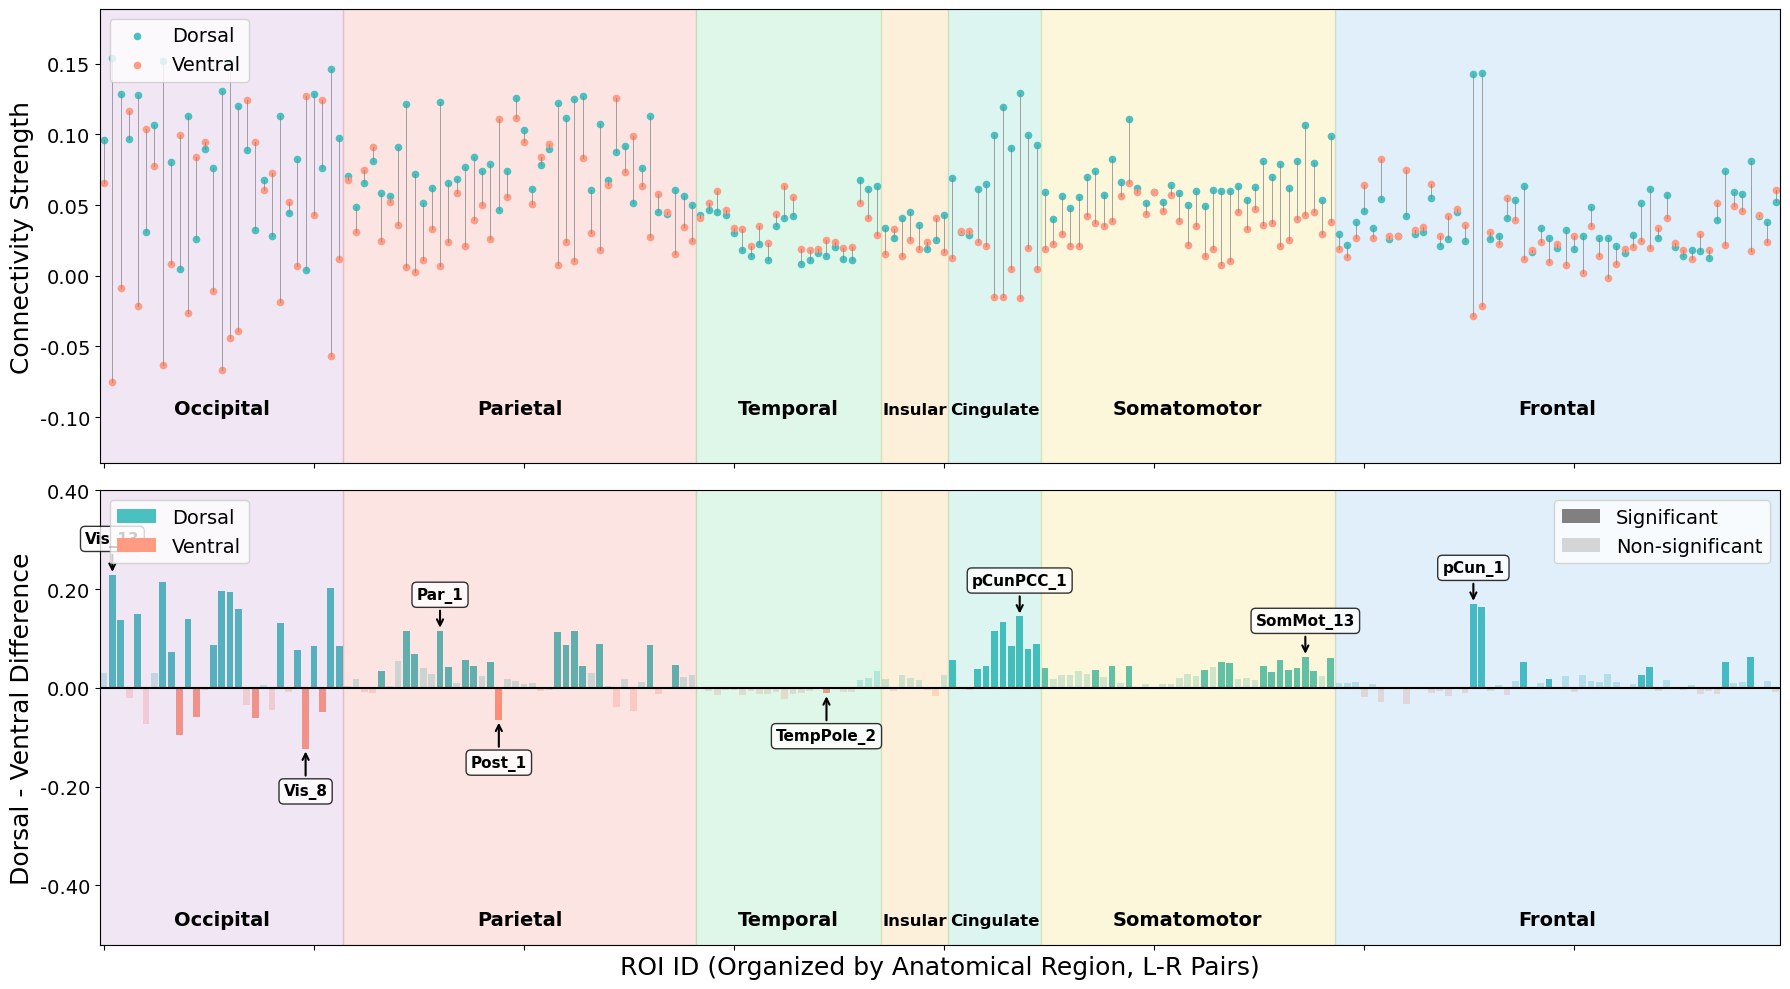

Figure saved to /user_data/csimmon2/git_repos/ptoc/results/partial_correlation_magnitude/partial_correlation_anatomical_organization.png

Summary: 62 dorsal-unique, 7 ventral-unique regions

Partial Correlation significant peak and bottom ROIs by anatomical lobe:

Occipital Lobe:
  Peak (Dorsal > Ventral): Vis_13, Diff = 0.229
  Bottom (Ventral > Dorsal): Vis_8, Diff = -0.123

Parietal Lobe:
  Peak (Dorsal > Ventral): Par_1, Diff = 0.116
  Bottom (Ventral > Dorsal): Post_1, Diff = -0.065

Temporal Lobe:
  No significant dorsal-preferring ROIs in this lobe
  Bottom (Ventral > Dorsal): TempPole_2, Diff = -0.011

Cingulate Lobe:
  Peak (Dorsal > Ventral): pCunPCC_1, Diff = 0.145
  No significant ventral-preferring ROIs in this lobe

Somatomotor Lobe:
  Peak (Dorsal > Ventral): SomMot_13, Diff = 0.063
  No significant ventral-preferring ROIs in this lobe

Frontal Lobe:
  Peak (Dorsal > Ventral): pCun_1, Diff = 0.171
  No significant ventral-preferring ROIs in this lobe

Visualization compl

In [1]:
# Standalone cell for Partial Correlation Anatomical Organization Visualization
# Matches FC/PPI style with colored lobe backgrounds and larger fonts

import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import re
from matplotlib.patches import Patch
from matplotlib.ticker import FormatStrFormatter

# Define paths
results_dir = '/user_data/csimmon2/git_repos/ptoc/results'
output_dir = f'{results_dir}/partial_correlation_magnitude'

# Load the CSV results
csv_path = f'{output_dir}/bilateral_partial_correlation_connectivity_fingerprint_results.csv'

if not os.path.exists(csv_path):
    print(f"Error: Results file not found at {csv_path}")
    print("Please run the connectivity magnitude analysis first.")
else:
    results_df = pd.read_csv(csv_path)
    print(f"Loaded partial correlation data with {len(results_df)} ROIs")
    
    # Prepare ROI data
    roi_data = {
        'mean_pips': results_df['pIPS_clean_Connectivity'].values,
        'mean_lo': results_df['LO_clean_Connectivity'].values,
        'diff_profile': results_df['Difference'].values,
        'ci_lower': results_df['CI_Lower'].values,
        'ci_upper': results_df['CI_Upper'].values,
        'sig_combined': results_df['Combined_Significant'].values
    }
    
    # Helper functions
    def map_to_anatomical_lobe(roi_name):
        if isinstance(roi_name, bytes):
            roi_name = roi_name.decode('utf-8')
        
        if 'Wang_pIPS' in roi_name:
            return 'Parietal'
        elif 'Wang_LO' in roi_name:
            return 'Temporal'
        
        if 'Vis' in roi_name:
            return 'Occipital'
        elif 'SomMot' in roi_name:
            return 'Somatomotor'
        elif 'DorsAttn' in roi_name:
            if 'Par' in roi_name or 'IPL' in roi_name or 'IPS' in roi_name:
                return 'Parietal'
            elif 'Temp' in roi_name or 'MT' in roi_name:
                return 'Temporal'
            else:
                return 'Parietal'
        elif 'SalVentAttn' in roi_name:
            if 'Ins' in roi_name:
                return 'Insular'
            elif 'Cing' in roi_name or 'ACC' in roi_name:
                return 'Cingulate'
            elif 'Temp' in roi_name:
                return 'Temporal'
            elif 'Par' in roi_name:
                return 'Parietal'
            else:
                return 'Frontal'
        elif 'Limbic' in roi_name:
            if 'Temp' in roi_name:
                return 'Temporal'
            else:
                return 'Frontal'
        elif 'Cont' in roi_name:
            if 'Par' in roi_name or 'IPL' in roi_name or 'IPS' in roi_name:
                return 'Parietal'
            elif 'Temp' in roi_name or 'MT' in roi_name:
                return 'Temporal'
            elif 'Cing' in roi_name:
                return 'Cingulate'
            else:
                return 'Frontal'
        elif 'Default' in roi_name:
            if 'Par' in roi_name:
                return 'Parietal'
            elif 'Temp' in roi_name:
                return 'Temporal'
            elif 'PCC' in roi_name or 'Cing' in roi_name:
                return 'Cingulate'
            else:
                return 'Frontal'
        else:
            return 'Other'

    def clean_roi_name(roi_name):
        if isinstance(roi_name, bytes):
            roi_name = roi_name.decode('utf-8')
        
        if 'Wang_' in roi_name:
            return roi_name.replace('Wang_', '')
        
        cleaned = roi_name.replace('7Networks_', '')
        
        parts = cleaned.split('_')
        if len(parts) > 2:
            return parts[-2] + '_' + parts[-1]
        elif len(parts) > 1:
            return parts[-1]
        else:
            return cleaned

    def get_hemisphere_and_region(roi_name):
        if isinstance(roi_name, bytes):
            roi_name = roi_name.decode('utf-8')
        
        if 'LH' in roi_name:
            hemisphere = 'L'
        elif 'RH' in roi_name:
            hemisphere = 'R'
        else:
            hemisphere = 'X'
        
        cleaned = roi_name.replace('7Networks_', '')
        cleaned = cleaned.replace('LH_', '').replace('RH_', '')
        
        if 'Wang_' in cleaned:
            base_region = cleaned.replace('Wang_', '')
        else:
            base_region = re.sub(r'_\d+$', '', cleaned)
        
        return hemisphere, base_region

    print("\nCreating anatomical organization visualization...")
    
    # Add anatomical lobe and hemisphere information
    results_df['Anatomical_Lobe'] = results_df['ROI_Name'].apply(map_to_anatomical_lobe)
    results_df['Clean_Name'] = results_df['ROI_Name'].apply(clean_roi_name)
    
    hemisphere_region = results_df['ROI_Name'].apply(get_hemisphere_and_region)
    results_df['Hemisphere'] = [h for h, r in hemisphere_region]
    results_df['Base_Region'] = [r for h, r in hemisphere_region]
    
    lobe_order = [
        'Occipital',
        'Parietal',
        'Temporal',
        'Insular',
        'Cingulate',
        'Somatomotor',
        'Frontal',
        'Other'
    ]
    
    lobe_cat = pd.Categorical(results_df['Anatomical_Lobe'], categories=lobe_order, ordered=True)
    results_df['Lobe_Sorted'] = lobe_cat
    
    lobe_colors = {
        'Frontal': '#3498db',
        'Somatomotor': '#f1c40f',
        'Parietal': '#e74c3c',
        'Temporal': '#2ecc71',
        'Occipital': '#9b59b6',
        'Insular': '#f39c12',
        'Cingulate': '#1abc9c',
        'Other': '#7f8c8d'
    }
    
    def custom_sort(row):
        lobe_idx = lobe_order.index(row['Anatomical_Lobe']) if row['Anatomical_Lobe'] in lobe_order else 999
        hemi_idx = 0 if row['Hemisphere'] == 'L' else 1 if row['Hemisphere'] == 'R' else 2
        return (lobe_idx, row['Base_Region'], hemi_idx)
    
    results_df['sort_key'] = results_df.apply(custom_sort, axis=1)
    results_df_sorted = results_df.sort_values('sort_key')
    
    sorted_indices = results_df_sorted.index.values
    
    mean_pips_sorted = results_df_sorted['pIPS_clean_Connectivity'].values
    mean_lo_sorted = results_df_sorted['LO_clean_Connectivity'].values
    diff_profile_sorted = results_df_sorted['Difference'].values
    sig_sorted = results_df_sorted['Combined_Significant'].values
    
    significant_roi_positions = []
    lobe_sections = []
    
    current_lobe = None
    start_idx = 0
    
    for i, idx in enumerate(sorted_indices):
        lobe = results_df_sorted.iloc[i]['Anatomical_Lobe']
        if lobe != current_lobe:
            if current_lobe is not None:
                lobe_sections.append((current_lobe, start_idx, i-1))
            current_lobe = lobe
            start_idx = i
    
    if current_lobe is not None:
        lobe_sections.append((current_lobe, start_idx, len(sorted_indices)-1))
    
    for lobe, start, end in lobe_sections:
        section_indices = sorted_indices[start:end+1]
        section_diff = diff_profile_sorted[start:end+1]
        section_sig = sig_sorted[start:end+1]
        
        sig_positions = np.where(section_sig)[0]
        if len(sig_positions) > 0:
            sig_diffs = section_diff[sig_positions]
            
            if np.max(sig_diffs) > 0:
                max_sig_idx = sig_positions[np.argmax(sig_diffs)]
                significant_roi_positions.append(start + max_sig_idx)
            
            if np.min(sig_diffs) < 0:
                min_sig_idx = sig_positions[np.argmin(sig_diffs)]
                significant_roi_positions.append(start + min_sig_idx)
    
    plt.figure(figsize=(18, 10))
    
    # Top subplot
    ax1 = plt.subplot(2, 1, 1)
    ax1.yaxis.set_major_formatter(FormatStrFormatter('%.2f'))
    x = np.arange(len(mean_pips_sorted))
    
    y_min = min(min(mean_pips_sorted), min(mean_lo_sorted))
    y_max = max(max(mean_pips_sorted), max(mean_lo_sorted))
    y_range = y_max - y_min
    
    # Colored lobe backgrounds
    for lobe, start, end in lobe_sections:
        plt.axvspan(start - 0.5, end + 0.5, alpha=0.15, color=lobe_colors[lobe])
        label_y = y_min - 0.1 * y_range
        if lobe == 'Insular':
            lobe_fontsize = 12
        elif lobe == 'Cingulate':
            lobe_fontsize = 12
        else:
            lobe_fontsize = 14
        plt.text((start + end) / 2, label_y, lobe, ha='center', fontsize=lobe_fontsize, fontweight='bold')
    
    for i in range(len(x)):
        plt.plot([x[i], x[i]], [mean_pips_sorted[i], mean_lo_sorted[i]], color='gray', linestyle='-', linewidth=0.5)
    
    plt.scatter(x, mean_pips_sorted, color='#4ac0c0', s=20, label='Dorsal')
    plt.scatter(x, mean_lo_sorted, color='#ff9b83', s=20, label='Ventral')
    
    # Expanded y-axis range for top panel
    plt.ylim(y_min - 0.25 * y_range, y_max + 0.15 * y_range)
    
    plt.tick_params(axis='x', which='both', bottom=True, top=False, labelbottom=False)
    plt.tick_params(axis='both', labelsize=14)
    plt.ylabel('Connectivity Strength', fontsize=18)
    plt.legend(loc='upper left', fontsize=14)
    plt.xlim(-0.5, len(mean_pips_sorted) - 0.5)
    
    # Bottom subplot
    ax2 = plt.subplot(2, 1, 2)
    ax2.yaxis.set_major_formatter(FormatStrFormatter('%.2f'))
    
    base_colors = ['#4ac0c0' if val > 0 else '#ff9b83' for val in diff_profile_sorted]
    bars = plt.bar(x, diff_profile_sorted, color=base_colors)
    
    for i, (bar, is_sig) in enumerate(zip(bars, sig_sorted)):
        if not is_sig:
            bar.set_alpha(0.3)
    
    plt.axhline(y=0, color='black', linestyle='-')
    
    sig_legend_elements = [
        Patch(facecolor='gray', alpha=1.0, label='Significant'),
        Patch(facecolor='gray', alpha=0.3, label='Non-significant')
    ]
    sig_legend = plt.legend(handles=sig_legend_elements, loc='upper right', fontsize=14)
    plt.gca().add_artist(sig_legend)
    
    pref_legend_elements = [
        Patch(facecolor='#4ac0c0', label='Dorsal'),
        Patch(facecolor='#ff9b83', label='Ventral')
    ]
    plt.legend(handles=pref_legend_elements, loc='upper left', fontsize=14)
    
    # Colored lobe backgrounds
    for lobe, start, end in lobe_sections:
        plt.axvspan(start - 0.5, end + 0.5, alpha=0.15, color=lobe_colors[lobe])
    
    plt.tick_params(axis='x', which='both', bottom=True, top=False, labelbottom=False)
    plt.tick_params(axis='both', labelsize=14)
    
    for position in significant_roi_positions:
        orig_idx = sorted_indices[position]
        roi_name = results_df.loc[orig_idx, 'Clean_Name']
        diff_value = diff_profile_sorted[position]
        
        # Skip specific labels
        if 'Vis_29' in roi_name or 'Vis_19' in roi_name:
            continue
        
        plt.annotate(f'{roi_name}',
                    xy=(position, diff_value),
                    xytext=(0, 20 if diff_value >= 0 else -25),
                    textcoords='offset points',
                    ha='center',
                    va='bottom' if diff_value >= 0 else 'top',
                    fontsize=11,
                    fontweight='bold',
                    bbox=dict(boxstyle='round,pad=0.3', fc='white', alpha=0.8),
                    arrowprops=dict(arrowstyle='->', lw=1.5))
    
    plt.ylabel('Dorsal - Ventral Difference', fontsize=18)
    plt.xlabel('ROI ID (Organized by Anatomical Region, L-R Pairs)', fontsize=18)
    plt.xlim(-0.5, len(mean_pips_sorted) - 0.5)
    
    # Expanded y-axis limits for bottom panel
    plt.ylim(-0.4, 0.4)
    
    current_ylim = plt.ylim()
    y_range_bottom = current_ylim[1] - current_ylim[0]
    
    for lobe, start, end in lobe_sections:
        label_y = current_ylim[0] - 0.1 * y_range_bottom
        if lobe == 'Insular':
            lobe_fontsize = 12
        elif lobe == 'Cingulate':
            lobe_fontsize = 12
        else:
            lobe_fontsize = 14
        plt.text((start + end) / 2, label_y, lobe, ha='center', fontsize=lobe_fontsize, fontweight='bold')
    
    plt.ylim(current_ylim[0] - 0.15 * y_range_bottom, current_ylim[1])
    
    plt.tight_layout()
    
    # Save the figure
    fig_path = f'{output_dir}/partial_correlation_anatomical_organization.png'
    plt.savefig(fig_path, dpi=300)
    plt.show()
    print(f"Figure saved to {fig_path}")
    
    # Print summary counts
    sig_df = results_df[results_df['Combined_Significant'] == True]
    dorsal_unique = len(sig_df[sig_df['Difference'] > 0])
    ventral_unique = len(sig_df[sig_df['Difference'] < 0])
    print(f"\nSummary: {dorsal_unique} dorsal-unique, {ventral_unique} ventral-unique regions")
    
    # Print peak and bottom ROIs by lobe
    print(f"\nPartial Correlation significant peak and bottom ROIs by anatomical lobe:")
    for lobe, start, end in lobe_sections:
        section_indices = sorted_indices[start:end+1]
        section_df = results_df.loc[section_indices]
        
        sig_group = section_df[section_df['Combined_Significant']]
        
        if len(sig_group) > 0:
            print(f"\n{lobe} Lobe:")
            
            dorsal_group = sig_group[sig_group['Difference'] > 0]
            if len(dorsal_group) > 0:
                peak_row = dorsal_group.loc[dorsal_group['Difference'].idxmax()]
                print(f"  Peak (Dorsal > Ventral): {peak_row['Clean_Name']}, " +
                      f"Diff = {peak_row['Difference']:.3f}")
            else:
                print("  No significant dorsal-preferring ROIs in this lobe")
            
            ventral_group = sig_group[sig_group['Difference'] < 0]
            if len(ventral_group) > 0:
                bottom_row = ventral_group.loc[ventral_group['Difference'].idxmin()]
                print(f"  Bottom (Ventral > Dorsal): {bottom_row['Clean_Name']}, " +
                      f"Diff = {bottom_row['Difference']:.3f}")
            else:
                print("  No significant ventral-preferring ROIs in this lobe")
    
    print("\nVisualization complete!")

In [2]:
import pandas as pd

# Load the partial correlation results
results_dir = '/user_data/csimmon2/git_repos/ptoc/results'
csv_path = f'{results_dir}/partial_correlation_magnitude/bilateral_partial_correlation_connectivity_fingerprint_results.csv'
df = pd.read_csv(csv_path)

# Filter for significant regions
sig_df = df[df['Combined_Significant'] == True]

# Dorsal-unique: significant AND positive difference (pIPS > LO)
dorsal_unique = sig_df[sig_df['Difference'] > 0][['ROI_Name', 'Difference']].sort_values('Difference', ascending=False)
print(f"DORSAL-UNIQUE ({len(dorsal_unique)} regions):")
print(dorsal_unique.to_string())

# Ventral-unique: significant AND negative difference (LO > pIPS)  
ventral_unique = sig_df[sig_df['Difference'] < 0][['ROI_Name', 'Difference']].sort_values('Difference')
print(f"\nVENTRAL-UNIQUE ({len(ventral_unique)} regions):")
print(ventral_unique.to_string())

DORSAL-UNIQUE (62 regions):
                               ROI_Name  Difference
12                  7Networks_LH_Vis_13    0.229378
13                  7Networks_LH_Vis_14    0.214596
108                  7Networks_RH_Vis_9    0.202822
113                 7Networks_RH_Vis_14    0.196666
112                 7Networks_RH_Vis_13    0.194533
70             7Networks_LH_Cont_pCun_1    0.170736
176            7Networks_RH_Cont_pCun_1    0.164890
111                 7Networks_RH_Vis_12    0.159105
9                   7Networks_LH_Vis_10    0.149003
197      7Networks_RH_Default_pCunPCC_1    0.145071
3                    7Networks_LH_Vis_4    0.139481
11                  7Networks_LH_Vis_12    0.137614
95       7Networks_LH_Default_pCunPCC_1    0.133808
103                  7Networks_RH_Vis_4    0.131784
181          7Networks_RH_Default_Par_1    0.116217
79           7Networks_LH_Default_Par_2    0.115720
96       7Networks_LH_Default_pCunPCC_2    0.114732
142        7Networks_RH_DorsAttn_Pos